In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import nltk, re, pprint
from nltk import word_tokenize


DATA_PATH = os.getcwd() + '\\data_cleaner\\output'

df_C = pd.read_csv (DATA_PATH +'\\C.csv') 
df_Python = pd.read_csv (DATA_PATH +'\\Python.csv') 
df_Javascript = pd.read_csv (DATA_PATH +'\\Javascript.csv') 
df_Go = pd.read_csv (DATA_PATH +'\\Go.csv') 

In [2]:
df_C.head()

,author,text
0,laruence,Hi: I am thinking of make a release(maybe a ta...
1,laruence,thanks
2,torvalds,So we use libgit2 in subsurface as one of the ...
3,torvalds,Apparently patchwork will corrupt author names...
4,LiveOverflow,Describe the bug Crest Ocean has a weird behav...


In [2]:
df_C['tokenized_text'] = df_C['text'].apply(word_tokenize) 
df_C.head()

,author,text,tokenized_text
0,laruence,Hi: I am thinking of make a release(maybe a ta...,"[Hi, :, I, am, thinking, of, make, a, release,..."
1,laruence,thanks,[thanks]
2,torvalds,So we use libgit2 in subsurface as one of the ...,"[So, we, use, libgit2, in, subsurface, as, one..."
3,torvalds,Apparently patchwork will corrupt author names...,"[Apparently, patchwork, will, corrupt, author,..."
4,LiveOverflow,Describe the bug Crest Ocean has a weird behav...,"[Describe, the, bug, Crest, Ocean, has, a, wei..."


In [5]:
df_Go['tokenized_text'] = df_Go['text'].apply(word_tokenize) 
df_Python['tokenized_text'] = df_Python['text'].apply(word_tokenize) 
df_Javascript['tokenized_text'] = df_Javascript['text'].apply(word_tokenize) 

KeyboardInterrupt: 

## Average text length

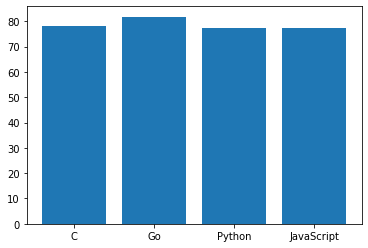

In [12]:
df_C['length'] = df_C['tokenized_text'].apply(len)
df_Go['length'] = df_Go['tokenized_text'].apply(len)
df_Python['length'] = df_Python['tokenized_text'].apply(len)
df_Javascript['length'] = df_Javascript['tokenized_text'].apply(len)


means = [np.mean(df_C['length']), np.mean(df_Go['length']), np.mean(df_Python['length']), np.mean(df_Javascript['length']) ]
widths  = [1, 2, 3, 4 ]
labels =['C', 'Go', 'Python', 'JavaScript']
plt.bar(widths, means, tick_label = labels,
        width = 0.8)
plt.show()

## Average lexical diversity

How diverse is vocabulary of a single entry?

In [14]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

def percentage(count, total):
    return 100 * count / total

In [15]:
df_C['lex_div'] = df_C['text'].apply(lexical_diversity)
df_Go['lex_div'] = df_Go['text'].apply(lexical_diversity)
df_Python['lex_div'] = df_Python['text'].apply(lexical_diversity)
df_Javascript['lex_div'] = df_Javascript['text'].apply(lexical_diversity)

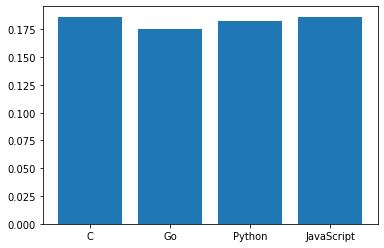

In [16]:
means = [np.mean(df_C['lex_div']), np.mean(df_Go['lex_div']), np.mean(df_Python['lex_div']), np.mean(df_Javascript['lex_div'])]
plt.bar(widths, means, tick_label = labels,
        width = 0.8)
plt.show()

## Total lexical diversity

How all enries are similar to each other?

In [7]:
all_C = ' '.join(df_C['text'])
#all_Go = ' '.join(df_Go['text'])
#all_Python = ' '.join(df_Python['text'])
#all_Javascript = ' '.join(df_Javascript['text'])

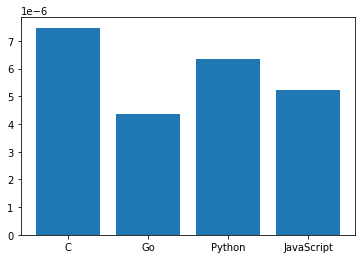

In [18]:
divs = [lexical_diversity(all_C), lexical_diversity(all_Go), lexical_diversity(all_Python), lexical_diversity(all_Javascript)]
plt.bar(widths, divs, tick_label = labels,
        width = 0.8)
plt.show()

## Average word length

In [19]:
def average(words):
    return (sum(len(word) for word in words) / len(words))


In [20]:

df_C['word_length'] = df_C['tokenized_text'].apply(average)
df_Go['word_length'] = df_Go['tokenized_text'].apply(average)
df_Python['word_length'] = df_Python['tokenized_text'].apply(average)
df_Javascript['word_length'] = df_Javascript['tokenized_text'].apply(average)


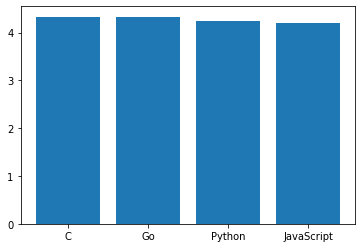

In [22]:
means = [np.mean(df_C['word_length']), np.mean(df_Go['word_length']), np.mean(df_Python['word_length']), np.mean(df_Javascript['word_length'])]
plt.bar(widths, means, tick_label = labels,
        width = 0.8)
plt.show()

## Count of words over 10 characters

In [28]:
def words_over_10(words):
    sum=0
    for word in words:
        if(len(word)>=10):
            sum+=1
    return sum

In [ ]:
df_C['long_words'] = df_C['tokenized_text'].apply(words_over_10)
df_Go['long_words'] = df_Go['tokenized_text'].apply(words_over_10)
df_Python['long_words'] = df_Python['tokenized_text'].apply(words_over_10)
df_Javascript['long_words'] = df_Javascript['tokenized_text'].apply(words_over_10)

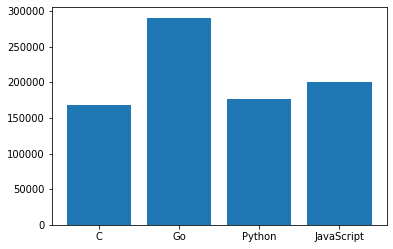

In [30]:
sums = [np.sum(df_C['long_words']), np.sum(df_Go['long_words']), np.sum(df_Python['long_words']), np.sum(df_Javascript['long_words'])]
plt.bar(widths, sums, tick_label = labels,
        width = 0.8)
plt.show()

## Frequency distribution

In [15]:
# for calculating frequency distribution and saving it to file
def freq_dist(all_lang, filename):
    unique_lang = set(word_tokenize(all_lang))
    freq = []
    i=0;
    for word in unique_lang:
        freq.append((all_lang.count(word), word))
        i+=1
        print(str(i) +"/" + str(len(unique_lang)))
    freq_lang = sorted(freq, reverse=True)
    df = pd.DataFrame(freq_lang)
    df.rename(columns={0: "number", 1: "word"}, inplace=True)
    df.to_csv(filename, index=False)

In [ ]:
freq_dist(all_C, "freq_C_v2.csv")

1/136335
2/136335
3/136335
4/136335
5/136335
6/136335
7/136335
8/136335
9/136335
10/136335
11/136335
12/136335
13/136335
14/136335
15/136335
16/136335
17/136335
18/136335
19/136335
20/136335
21/136335
22/136335
23/136335
24/136335
25/136335
26/136335
27/136335
28/136335
29/136335
30/136335
31/136335
32/136335
33/136335
34/136335
35/136335
36/136335
37/136335
38/136335
39/136335
40/136335
41/136335
42/136335
43/136335
44/136335
45/136335
46/136335
47/136335
48/136335
49/136335
50/136335
51/136335
52/136335
53/136335
54/136335
55/136335
56/136335
57/136335
58/136335
59/136335
60/136335
61/136335
62/136335
63/136335
64/136335
65/136335
66/136335
67/136335
68/136335
69/136335
70/136335
71/136335
72/136335
73/136335
74/136335
75/136335
76/136335
77/136335
78/136335
79/136335
80/136335
81/136335
82/136335
83/136335
84/136335
85/136335
86/136335
87/136335
88/136335
89/136335
90/136335
91/136335
92/136335
93/136335
94/136335
95/136335
96/136335
97/136335
98/136335
99/136335
100/136335
101/1363

769/136335
770/136335
771/136335
772/136335
773/136335
774/136335
775/136335
776/136335
777/136335
778/136335
779/136335
780/136335
781/136335
782/136335
783/136335
784/136335
785/136335
786/136335
787/136335
788/136335
789/136335
790/136335
791/136335
792/136335
793/136335
794/136335
795/136335
796/136335
797/136335
798/136335
799/136335
800/136335
801/136335
802/136335
803/136335
804/136335
805/136335
806/136335
807/136335
808/136335
809/136335
810/136335
811/136335
812/136335
813/136335
814/136335
815/136335
816/136335
817/136335
818/136335
819/136335
820/136335
821/136335
822/136335
823/136335
824/136335
825/136335
826/136335
827/136335
828/136335
829/136335
830/136335
831/136335
832/136335
833/136335
834/136335
835/136335
836/136335
837/136335
838/136335
839/136335
840/136335
841/136335
842/136335
843/136335
844/136335
845/136335
846/136335
847/136335
848/136335
849/136335
850/136335
851/136335
852/136335
853/136335
854/136335
855/136335
856/136335
857/136335
858/136335
859/136335

1480/136335
1481/136335
1482/136335
1483/136335
1484/136335
1485/136335
1486/136335
1487/136335
1488/136335
1489/136335
1490/136335
1491/136335
1492/136335
1493/136335
1494/136335
1495/136335
1496/136335
1497/136335
1498/136335
1499/136335
1500/136335
1501/136335
1502/136335
1503/136335
1504/136335
1505/136335
1506/136335
1507/136335
1508/136335
1509/136335
1510/136335
1511/136335
1512/136335
1513/136335
1514/136335
1515/136335
1516/136335
1517/136335
1518/136335
1519/136335
1520/136335
1521/136335
1522/136335
1523/136335
1524/136335
1525/136335
1526/136335
1527/136335
1528/136335
1529/136335
1530/136335
1531/136335
1532/136335
1533/136335
1534/136335
1535/136335
1536/136335
1537/136335
1538/136335
1539/136335
1540/136335
1541/136335
1542/136335
1543/136335
1544/136335
1545/136335
1546/136335
1547/136335
1548/136335
1549/136335
1550/136335
1551/136335
1552/136335
1553/136335
1554/136335
1555/136335
1556/136335
1557/136335
1558/136335
1559/136335
1560/136335
1561/136335
1562/136335
1563

2167/136335
2168/136335
2169/136335
2170/136335
2171/136335
2172/136335
2173/136335
2174/136335
2175/136335
2176/136335
2177/136335
2178/136335
2179/136335
2180/136335
2181/136335
2182/136335
2183/136335
2184/136335
2185/136335
2186/136335
2187/136335
2188/136335
2189/136335
2190/136335
2191/136335
2192/136335
2193/136335
2194/136335
2195/136335
2196/136335
2197/136335
2198/136335
2199/136335
2200/136335
2201/136335
2202/136335
2203/136335
2204/136335
2205/136335
2206/136335
2207/136335
2208/136335
2209/136335
2210/136335
2211/136335
2212/136335
2213/136335
2214/136335
2215/136335
2216/136335
2217/136335
2218/136335
2219/136335
2220/136335
2221/136335
2222/136335
2223/136335
2224/136335
2225/136335
2226/136335
2227/136335
2228/136335
2229/136335
2230/136335
2231/136335
2232/136335
2233/136335
2234/136335
2235/136335
2236/136335
2237/136335
2238/136335
2239/136335
2240/136335
2241/136335
2242/136335
2243/136335
2244/136335
2245/136335
2246/136335
2247/136335
2248/136335
2249/136335
2250

2863/136335
2864/136335
2865/136335
2866/136335
2867/136335
2868/136335
2869/136335
2870/136335
2871/136335
2872/136335
2873/136335
2874/136335
2875/136335
2876/136335
2877/136335
2878/136335
2879/136335
2880/136335
2881/136335
2882/136335
2883/136335
2884/136335
2885/136335
2886/136335
2887/136335
2888/136335
2889/136335
2890/136335
2891/136335
2892/136335
2893/136335
2894/136335
2895/136335
2896/136335
2897/136335
2898/136335
2899/136335
2900/136335
2901/136335
2902/136335
2903/136335
2904/136335
2905/136335
2906/136335
2907/136335
2908/136335
2909/136335
2910/136335
2911/136335
2912/136335
2913/136335
2914/136335
2915/136335
2916/136335
2917/136335
2918/136335
2919/136335
2920/136335
2921/136335
2922/136335
2923/136335
2924/136335
2925/136335
2926/136335
2927/136335
2928/136335
2929/136335
2930/136335
2931/136335
2932/136335
2933/136335
2934/136335
2935/136335
2936/136335
2937/136335
2938/136335
2939/136335
2940/136335
2941/136335
2942/136335
2943/136335
2944/136335
2945/136335
2946

3554/136335
3555/136335
3556/136335
3557/136335
3558/136335
3559/136335
3560/136335
3561/136335
3562/136335
3563/136335
3564/136335
3565/136335
3566/136335
3567/136335
3568/136335
3569/136335
3570/136335
3571/136335
3572/136335
3573/136335
3574/136335
3575/136335
3576/136335
3577/136335
3578/136335
3579/136335
3580/136335
3581/136335
3582/136335
3583/136335
3584/136335
3585/136335
3586/136335
3587/136335
3588/136335
3589/136335
3590/136335
3591/136335
3592/136335
3593/136335
3594/136335
3595/136335
3596/136335
3597/136335
3598/136335
3599/136335
3600/136335
3601/136335
3602/136335
3603/136335
3604/136335
3605/136335
3606/136335
3607/136335
3608/136335
3609/136335
3610/136335
3611/136335
3612/136335
3613/136335
3614/136335
3615/136335
3616/136335
3617/136335
3618/136335
3619/136335
3620/136335
3621/136335
3622/136335
3623/136335
3624/136335
3625/136335
3626/136335
3627/136335
3628/136335
3629/136335
3630/136335
3631/136335
3632/136335
3633/136335
3634/136335
3635/136335
3636/136335
3637

4239/136335
4240/136335
4241/136335
4242/136335
4243/136335
4244/136335
4245/136335
4246/136335
4247/136335
4248/136335
4249/136335
4250/136335
4251/136335
4252/136335
4253/136335
4254/136335
4255/136335
4256/136335
4257/136335
4258/136335
4259/136335
4260/136335
4261/136335
4262/136335
4263/136335
4264/136335
4265/136335
4266/136335
4267/136335
4268/136335
4269/136335
4270/136335
4271/136335
4272/136335
4273/136335
4274/136335
4275/136335
4276/136335
4277/136335
4278/136335
4279/136335
4280/136335
4281/136335
4282/136335
4283/136335
4284/136335
4285/136335
4286/136335
4287/136335
4288/136335
4289/136335
4290/136335
4291/136335
4292/136335
4293/136335
4294/136335
4295/136335
4296/136335
4297/136335
4298/136335
4299/136335
4300/136335
4301/136335
4302/136335
4303/136335
4304/136335
4305/136335
4306/136335
4307/136335
4308/136335
4309/136335
4310/136335
4311/136335
4312/136335
4313/136335
4314/136335
4315/136335
4316/136335
4317/136335
4318/136335
4319/136335
4320/136335
4321/136335
4322

4925/136335
4926/136335
4927/136335
4928/136335
4929/136335
4930/136335
4931/136335
4932/136335
4933/136335
4934/136335
4935/136335
4936/136335
4937/136335
4938/136335
4939/136335
4940/136335
4941/136335
4942/136335
4943/136335
4944/136335
4945/136335
4946/136335
4947/136335
4948/136335
4949/136335
4950/136335
4951/136335
4952/136335
4953/136335
4954/136335
4955/136335
4956/136335
4957/136335
4958/136335
4959/136335
4960/136335
4961/136335
4962/136335
4963/136335
4964/136335
4965/136335
4966/136335
4967/136335
4968/136335
4969/136335
4970/136335
4971/136335
4972/136335
4973/136335
4974/136335
4975/136335
4976/136335
4977/136335
4978/136335
4979/136335
4980/136335
4981/136335
4982/136335
4983/136335
4984/136335
4985/136335
4986/136335
4987/136335
4988/136335
4989/136335
4990/136335
4991/136335
4992/136335
4993/136335
4994/136335
4995/136335
4996/136335
4997/136335
4998/136335
4999/136335
5000/136335
5001/136335
5002/136335
5003/136335
5004/136335
5005/136335
5006/136335
5007/136335
5008

5615/136335
5616/136335
5617/136335
5618/136335
5619/136335
5620/136335
5621/136335
5622/136335
5623/136335
5624/136335
5625/136335
5626/136335
5627/136335
5628/136335
5629/136335
5630/136335
5631/136335
5632/136335
5633/136335
5634/136335
5635/136335
5636/136335
5637/136335
5638/136335
5639/136335
5640/136335
5641/136335
5642/136335
5643/136335
5644/136335
5645/136335
5646/136335
5647/136335
5648/136335
5649/136335
5650/136335
5651/136335
5652/136335
5653/136335
5654/136335
5655/136335
5656/136335
5657/136335
5658/136335
5659/136335
5660/136335
5661/136335
5662/136335
5663/136335
5664/136335
5665/136335
5666/136335
5667/136335
5668/136335
5669/136335
5670/136335
5671/136335
5672/136335
5673/136335
5674/136335
5675/136335
5676/136335
5677/136335
5678/136335
5679/136335
5680/136335
5681/136335
5682/136335
5683/136335
5684/136335
5685/136335
5686/136335
5687/136335
5688/136335
5689/136335
5690/136335
5691/136335
5692/136335
5693/136335
5694/136335
5695/136335
5696/136335
5697/136335
5698

6308/136335
6309/136335
6310/136335
6311/136335
6312/136335
6313/136335
6314/136335
6315/136335
6316/136335
6317/136335
6318/136335
6319/136335
6320/136335
6321/136335
6322/136335
6323/136335
6324/136335
6325/136335
6326/136335
6327/136335
6328/136335
6329/136335
6330/136335
6331/136335
6332/136335
6333/136335
6334/136335
6335/136335
6336/136335
6337/136335
6338/136335
6339/136335
6340/136335
6341/136335
6342/136335
6343/136335
6344/136335
6345/136335
6346/136335
6347/136335
6348/136335
6349/136335
6350/136335
6351/136335
6352/136335
6353/136335
6354/136335
6355/136335
6356/136335
6357/136335
6358/136335
6359/136335
6360/136335
6361/136335
6362/136335
6363/136335
6364/136335
6365/136335
6366/136335
6367/136335
6368/136335
6369/136335
6370/136335
6371/136335
6372/136335
6373/136335
6374/136335
6375/136335
6376/136335
6377/136335
6378/136335
6379/136335
6380/136335
6381/136335
6382/136335
6383/136335
6384/136335
6385/136335
6386/136335
6387/136335
6388/136335
6389/136335
6390/136335
6391

6997/136335
6998/136335
6999/136335
7000/136335
7001/136335
7002/136335
7003/136335
7004/136335
7005/136335
7006/136335
7007/136335
7008/136335
7009/136335
7010/136335
7011/136335
7012/136335
7013/136335
7014/136335
7015/136335
7016/136335
7017/136335
7018/136335
7019/136335
7020/136335
7021/136335
7022/136335
7023/136335
7024/136335
7025/136335
7026/136335
7027/136335
7028/136335
7029/136335
7030/136335
7031/136335
7032/136335
7033/136335
7034/136335
7035/136335
7036/136335
7037/136335
7038/136335
7039/136335
7040/136335
7041/136335
7042/136335
7043/136335
7044/136335
7045/136335
7046/136335
7047/136335
7048/136335
7049/136335
7050/136335
7051/136335
7052/136335
7053/136335
7054/136335
7055/136335
7056/136335
7057/136335
7058/136335
7059/136335
7060/136335
7061/136335
7062/136335
7063/136335
7064/136335
7065/136335
7066/136335
7067/136335
7068/136335
7069/136335
7070/136335
7071/136335
7072/136335
7073/136335
7074/136335
7075/136335
7076/136335
7077/136335
7078/136335
7079/136335
7080

7684/136335
7685/136335
7686/136335
7687/136335
7688/136335
7689/136335
7690/136335
7691/136335
7692/136335
7693/136335
7694/136335
7695/136335
7696/136335
7697/136335
7698/136335
7699/136335
7700/136335
7701/136335
7702/136335
7703/136335
7704/136335
7705/136335
7706/136335
7707/136335
7708/136335
7709/136335
7710/136335
7711/136335
7712/136335
7713/136335
7714/136335
7715/136335
7716/136335
7717/136335
7718/136335
7719/136335
7720/136335
7721/136335
7722/136335
7723/136335
7724/136335
7725/136335
7726/136335
7727/136335
7728/136335
7729/136335
7730/136335
7731/136335
7732/136335
7733/136335
7734/136335
7735/136335
7736/136335
7737/136335
7738/136335
7739/136335
7740/136335
7741/136335
7742/136335
7743/136335
7744/136335
7745/136335
7746/136335
7747/136335
7748/136335
7749/136335
7750/136335
7751/136335
7752/136335
7753/136335
7754/136335
7755/136335
7756/136335
7757/136335
7758/136335
7759/136335
7760/136335
7761/136335
7762/136335
7763/136335
7764/136335
7765/136335
7766/136335
7767

8369/136335
8370/136335
8371/136335
8372/136335
8373/136335
8374/136335
8375/136335
8376/136335
8377/136335
8378/136335
8379/136335
8380/136335
8381/136335
8382/136335
8383/136335
8384/136335
8385/136335
8386/136335
8387/136335
8388/136335
8389/136335
8390/136335
8391/136335
8392/136335
8393/136335
8394/136335
8395/136335
8396/136335
8397/136335
8398/136335
8399/136335
8400/136335
8401/136335
8402/136335
8403/136335
8404/136335
8405/136335
8406/136335
8407/136335
8408/136335
8409/136335
8410/136335
8411/136335
8412/136335
8413/136335
8414/136335
8415/136335
8416/136335
8417/136335
8418/136335
8419/136335
8420/136335
8421/136335
8422/136335
8423/136335
8424/136335
8425/136335
8426/136335
8427/136335
8428/136335
8429/136335
8430/136335
8431/136335
8432/136335
8433/136335
8434/136335
8435/136335
8436/136335
8437/136335
8438/136335
8439/136335
8440/136335
8441/136335
8442/136335
8443/136335
8444/136335
8445/136335
8446/136335
8447/136335
8448/136335
8449/136335
8450/136335
8451/136335
8452

9066/136335
9067/136335
9068/136335
9069/136335
9070/136335
9071/136335
9072/136335
9073/136335
9074/136335
9075/136335
9076/136335
9077/136335
9078/136335
9079/136335
9080/136335
9081/136335
9082/136335
9083/136335
9084/136335
9085/136335
9086/136335
9087/136335
9088/136335
9089/136335
9090/136335
9091/136335
9092/136335
9093/136335
9094/136335
9095/136335
9096/136335
9097/136335
9098/136335
9099/136335
9100/136335
9101/136335
9102/136335
9103/136335
9104/136335
9105/136335
9106/136335
9107/136335
9108/136335
9109/136335
9110/136335
9111/136335
9112/136335
9113/136335
9114/136335
9115/136335
9116/136335
9117/136335
9118/136335
9119/136335
9120/136335
9121/136335
9122/136335
9123/136335
9124/136335
9125/136335
9126/136335
9127/136335
9128/136335
9129/136335
9130/136335
9131/136335
9132/136335
9133/136335
9134/136335
9135/136335
9136/136335
9137/136335
9138/136335
9139/136335
9140/136335
9141/136335
9142/136335
9143/136335
9144/136335
9145/136335
9146/136335
9147/136335
9148/136335
9149

9759/136335
9760/136335
9761/136335
9762/136335
9763/136335
9764/136335
9765/136335
9766/136335
9767/136335
9768/136335
9769/136335
9770/136335
9771/136335
9772/136335
9773/136335
9774/136335
9775/136335
9776/136335
9777/136335
9778/136335
9779/136335
9780/136335
9781/136335
9782/136335
9783/136335
9784/136335
9785/136335
9786/136335
9787/136335
9788/136335
9789/136335
9790/136335
9791/136335
9792/136335
9793/136335
9794/136335
9795/136335
9796/136335
9797/136335
9798/136335
9799/136335
9800/136335
9801/136335
9802/136335
9803/136335
9804/136335
9805/136335
9806/136335
9807/136335
9808/136335
9809/136335
9810/136335
9811/136335
9812/136335
9813/136335
9814/136335
9815/136335
9816/136335
9817/136335
9818/136335
9819/136335
9820/136335
9821/136335
9822/136335
9823/136335
9824/136335
9825/136335
9826/136335
9827/136335
9828/136335
9829/136335
9830/136335
9831/136335
9832/136335
9833/136335
9834/136335
9835/136335
9836/136335
9837/136335
9838/136335
9839/136335
9840/136335
9841/136335
9842

10420/136335
10421/136335
10422/136335
10423/136335
10424/136335
10425/136335
10426/136335
10427/136335
10428/136335
10429/136335
10430/136335
10431/136335
10432/136335
10433/136335
10434/136335
10435/136335
10436/136335
10437/136335
10438/136335
10439/136335
10440/136335
10441/136335
10442/136335
10443/136335
10444/136335
10445/136335
10446/136335
10447/136335
10448/136335
10449/136335
10450/136335
10451/136335
10452/136335
10453/136335
10454/136335
10455/136335
10456/136335
10457/136335
10458/136335
10459/136335
10460/136335
10461/136335
10462/136335
10463/136335
10464/136335
10465/136335
10466/136335
10467/136335
10468/136335
10469/136335
10470/136335
10471/136335
10472/136335
10473/136335
10474/136335
10475/136335
10476/136335
10477/136335
10478/136335
10479/136335
10480/136335
10481/136335
10482/136335
10483/136335
10484/136335
10485/136335
10486/136335
10487/136335
10488/136335
10489/136335
10490/136335
10491/136335
10492/136335
10493/136335
10494/136335
10495/136335
10496/136335

11054/136335
11055/136335
11056/136335
11057/136335
11058/136335
11059/136335
11060/136335
11061/136335
11062/136335
11063/136335
11064/136335
11065/136335
11066/136335
11067/136335
11068/136335
11069/136335
11070/136335
11071/136335
11072/136335
11073/136335
11074/136335
11075/136335
11076/136335
11077/136335
11078/136335
11079/136335
11080/136335
11081/136335
11082/136335
11083/136335
11084/136335
11085/136335
11086/136335
11087/136335
11088/136335
11089/136335
11090/136335
11091/136335
11092/136335
11093/136335
11094/136335
11095/136335
11096/136335
11097/136335
11098/136335
11099/136335
11100/136335
11101/136335
11102/136335
11103/136335
11104/136335
11105/136335
11106/136335
11107/136335
11108/136335
11109/136335
11110/136335
11111/136335
11112/136335
11113/136335
11114/136335
11115/136335
11116/136335
11117/136335
11118/136335
11119/136335
11120/136335
11121/136335
11122/136335
11123/136335
11124/136335
11125/136335
11126/136335
11127/136335
11128/136335
11129/136335
11130/136335

11685/136335
11686/136335
11687/136335
11688/136335
11689/136335
11690/136335
11691/136335
11692/136335
11693/136335
11694/136335
11695/136335
11696/136335
11697/136335
11698/136335
11699/136335
11700/136335
11701/136335
11702/136335
11703/136335
11704/136335
11705/136335
11706/136335
11707/136335
11708/136335
11709/136335
11710/136335
11711/136335
11712/136335
11713/136335
11714/136335
11715/136335
11716/136335
11717/136335
11718/136335
11719/136335
11720/136335
11721/136335
11722/136335
11723/136335
11724/136335
11725/136335
11726/136335
11727/136335
11728/136335
11729/136335
11730/136335
11731/136335
11732/136335
11733/136335
11734/136335
11735/136335
11736/136335
11737/136335
11738/136335
11739/136335
11740/136335
11741/136335
11742/136335
11743/136335
11744/136335
11745/136335
11746/136335
11747/136335
11748/136335
11749/136335
11750/136335
11751/136335
11752/136335
11753/136335
11754/136335
11755/136335
11756/136335
11757/136335
11758/136335
11759/136335
11760/136335
11761/136335

12324/136335
12325/136335
12326/136335
12327/136335
12328/136335
12329/136335
12330/136335
12331/136335
12332/136335
12333/136335
12334/136335
12335/136335
12336/136335
12337/136335
12338/136335
12339/136335
12340/136335
12341/136335
12342/136335
12343/136335
12344/136335
12345/136335
12346/136335
12347/136335
12348/136335
12349/136335
12350/136335
12351/136335
12352/136335
12353/136335
12354/136335
12355/136335
12356/136335
12357/136335
12358/136335
12359/136335
12360/136335
12361/136335
12362/136335
12363/136335
12364/136335
12365/136335
12366/136335
12367/136335
12368/136335
12369/136335
12370/136335
12371/136335
12372/136335
12373/136335
12374/136335
12375/136335
12376/136335
12377/136335
12378/136335
12379/136335
12380/136335
12381/136335
12382/136335
12383/136335
12384/136335
12385/136335
12386/136335
12387/136335
12388/136335
12389/136335
12390/136335
12391/136335
12392/136335
12393/136335
12394/136335
12395/136335
12396/136335
12397/136335
12398/136335
12399/136335
12400/136335

12967/136335
12968/136335
12969/136335
12970/136335
12971/136335
12972/136335
12973/136335
12974/136335
12975/136335
12976/136335
12977/136335
12978/136335
12979/136335
12980/136335
12981/136335
12982/136335
12983/136335
12984/136335
12985/136335
12986/136335
12987/136335
12988/136335
12989/136335
12990/136335
12991/136335
12992/136335
12993/136335
12994/136335
12995/136335
12996/136335
12997/136335
12998/136335
12999/136335
13000/136335
13001/136335
13002/136335
13003/136335
13004/136335
13005/136335
13006/136335
13007/136335
13008/136335
13009/136335
13010/136335
13011/136335
13012/136335
13013/136335
13014/136335
13015/136335
13016/136335
13017/136335
13018/136335
13019/136335
13020/136335
13021/136335
13022/136335
13023/136335
13024/136335
13025/136335
13026/136335
13027/136335
13028/136335
13029/136335
13030/136335
13031/136335
13032/136335
13033/136335
13034/136335
13035/136335
13036/136335
13037/136335
13038/136335
13039/136335
13040/136335
13041/136335
13042/136335
13043/136335

13601/136335
13602/136335
13603/136335
13604/136335
13605/136335
13606/136335
13607/136335
13608/136335
13609/136335
13610/136335
13611/136335
13612/136335
13613/136335
13614/136335
13615/136335
13616/136335
13617/136335
13618/136335
13619/136335
13620/136335
13621/136335
13622/136335
13623/136335
13624/136335
13625/136335
13626/136335
13627/136335
13628/136335
13629/136335
13630/136335
13631/136335
13632/136335
13633/136335
13634/136335
13635/136335
13636/136335
13637/136335
13638/136335
13639/136335
13640/136335
13641/136335
13642/136335
13643/136335
13644/136335
13645/136335
13646/136335
13647/136335
13648/136335
13649/136335
13650/136335
13651/136335
13652/136335
13653/136335
13654/136335
13655/136335
13656/136335
13657/136335
13658/136335
13659/136335
13660/136335
13661/136335
13662/136335
13663/136335
13664/136335
13665/136335
13666/136335
13667/136335
13668/136335
13669/136335
13670/136335
13671/136335
13672/136335
13673/136335
13674/136335
13675/136335
13676/136335
13677/136335

14235/136335
14236/136335
14237/136335
14238/136335
14239/136335
14240/136335
14241/136335
14242/136335
14243/136335
14244/136335
14245/136335
14246/136335
14247/136335
14248/136335
14249/136335
14250/136335
14251/136335
14252/136335
14253/136335
14254/136335
14255/136335
14256/136335
14257/136335
14258/136335
14259/136335
14260/136335
14261/136335
14262/136335
14263/136335
14264/136335
14265/136335
14266/136335
14267/136335
14268/136335
14269/136335
14270/136335
14271/136335
14272/136335
14273/136335
14274/136335
14275/136335
14276/136335
14277/136335
14278/136335
14279/136335
14280/136335
14281/136335
14282/136335
14283/136335
14284/136335
14285/136335
14286/136335
14287/136335
14288/136335
14289/136335
14290/136335
14291/136335
14292/136335
14293/136335
14294/136335
14295/136335
14296/136335
14297/136335
14298/136335
14299/136335
14300/136335
14301/136335
14302/136335
14303/136335
14304/136335
14305/136335
14306/136335
14307/136335
14308/136335
14309/136335
14310/136335
14311/136335

14871/136335
14872/136335
14873/136335
14874/136335
14875/136335
14876/136335
14877/136335
14878/136335
14879/136335
14880/136335
14881/136335
14882/136335
14883/136335
14884/136335
14885/136335
14886/136335
14887/136335
14888/136335
14889/136335
14890/136335
14891/136335
14892/136335
14893/136335
14894/136335
14895/136335
14896/136335
14897/136335
14898/136335
14899/136335
14900/136335
14901/136335
14902/136335
14903/136335
14904/136335
14905/136335
14906/136335
14907/136335
14908/136335
14909/136335
14910/136335
14911/136335
14912/136335
14913/136335
14914/136335
14915/136335
14916/136335
14917/136335
14918/136335
14919/136335
14920/136335
14921/136335
14922/136335
14923/136335
14924/136335
14925/136335
14926/136335
14927/136335
14928/136335
14929/136335
14930/136335
14931/136335
14932/136335
14933/136335
14934/136335
14935/136335
14936/136335
14937/136335
14938/136335
14939/136335
14940/136335
14941/136335
14942/136335
14943/136335
14944/136335
14945/136335
14946/136335
14947/136335

15505/136335
15506/136335
15507/136335
15508/136335
15509/136335
15510/136335
15511/136335
15512/136335
15513/136335
15514/136335
15515/136335
15516/136335
15517/136335
15518/136335
15519/136335
15520/136335
15521/136335
15522/136335
15523/136335
15524/136335
15525/136335
15526/136335
15527/136335
15528/136335
15529/136335
15530/136335
15531/136335
15532/136335
15533/136335
15534/136335
15535/136335
15536/136335
15537/136335
15538/136335
15539/136335
15540/136335
15541/136335
15542/136335
15543/136335
15544/136335
15545/136335
15546/136335
15547/136335
15548/136335
15549/136335
15550/136335
15551/136335
15552/136335
15553/136335
15554/136335
15555/136335
15556/136335
15557/136335
15558/136335
15559/136335
15560/136335
15561/136335
15562/136335
15563/136335
15564/136335
15565/136335
15566/136335
15567/136335
15568/136335
15569/136335
15570/136335
15571/136335
15572/136335
15573/136335
15574/136335
15575/136335
15576/136335
15577/136335
15578/136335
15579/136335
15580/136335
15581/136335

16149/136335
16150/136335
16151/136335
16152/136335
16153/136335
16154/136335
16155/136335
16156/136335
16157/136335
16158/136335
16159/136335
16160/136335
16161/136335
16162/136335
16163/136335
16164/136335
16165/136335
16166/136335
16167/136335
16168/136335
16169/136335
16170/136335
16171/136335
16172/136335
16173/136335
16174/136335
16175/136335
16176/136335
16177/136335
16178/136335
16179/136335
16180/136335
16181/136335
16182/136335
16183/136335
16184/136335
16185/136335
16186/136335
16187/136335
16188/136335
16189/136335
16190/136335
16191/136335
16192/136335
16193/136335
16194/136335
16195/136335
16196/136335
16197/136335
16198/136335
16199/136335
16200/136335
16201/136335
16202/136335
16203/136335
16204/136335
16205/136335
16206/136335
16207/136335
16208/136335
16209/136335
16210/136335
16211/136335
16212/136335
16213/136335
16214/136335
16215/136335
16216/136335
16217/136335
16218/136335
16219/136335
16220/136335
16221/136335
16222/136335
16223/136335
16224/136335
16225/136335

16793/136335
16794/136335
16795/136335
16796/136335
16797/136335
16798/136335
16799/136335
16800/136335
16801/136335
16802/136335
16803/136335
16804/136335
16805/136335
16806/136335
16807/136335
16808/136335
16809/136335
16810/136335
16811/136335
16812/136335
16813/136335
16814/136335
16815/136335
16816/136335
16817/136335
16818/136335
16819/136335
16820/136335
16821/136335
16822/136335
16823/136335
16824/136335
16825/136335
16826/136335
16827/136335
16828/136335
16829/136335
16830/136335
16831/136335
16832/136335
16833/136335
16834/136335
16835/136335
16836/136335
16837/136335
16838/136335
16839/136335
16840/136335
16841/136335
16842/136335
16843/136335
16844/136335
16845/136335
16846/136335
16847/136335
16848/136335
16849/136335
16850/136335
16851/136335
16852/136335
16853/136335
16854/136335
16855/136335
16856/136335
16857/136335
16858/136335
16859/136335
16860/136335
16861/136335
16862/136335
16863/136335
16864/136335
16865/136335
16866/136335
16867/136335
16868/136335
16869/136335

17430/136335
17431/136335
17432/136335
17433/136335
17434/136335
17435/136335
17436/136335
17437/136335
17438/136335
17439/136335
17440/136335
17441/136335
17442/136335
17443/136335
17444/136335
17445/136335
17446/136335
17447/136335
17448/136335
17449/136335
17450/136335
17451/136335
17452/136335
17453/136335
17454/136335
17455/136335
17456/136335
17457/136335
17458/136335
17459/136335
17460/136335
17461/136335
17462/136335
17463/136335
17464/136335
17465/136335
17466/136335
17467/136335
17468/136335
17469/136335
17470/136335
17471/136335
17472/136335
17473/136335
17474/136335
17475/136335
17476/136335
17477/136335
17478/136335
17479/136335
17480/136335
17481/136335
17482/136335
17483/136335
17484/136335
17485/136335
17486/136335
17487/136335
17488/136335
17489/136335
17490/136335
17491/136335
17492/136335
17493/136335
17494/136335
17495/136335
17496/136335
17497/136335
17498/136335
17499/136335
17500/136335
17501/136335
17502/136335
17503/136335
17504/136335
17505/136335
17506/136335

18071/136335
18072/136335
18073/136335
18074/136335
18075/136335
18076/136335
18077/136335
18078/136335
18079/136335
18080/136335
18081/136335
18082/136335
18083/136335
18084/136335
18085/136335
18086/136335
18087/136335
18088/136335
18089/136335
18090/136335
18091/136335
18092/136335
18093/136335
18094/136335
18095/136335
18096/136335
18097/136335
18098/136335
18099/136335
18100/136335
18101/136335
18102/136335
18103/136335
18104/136335
18105/136335
18106/136335
18107/136335
18108/136335
18109/136335
18110/136335
18111/136335
18112/136335
18113/136335
18114/136335
18115/136335
18116/136335
18117/136335
18118/136335
18119/136335
18120/136335
18121/136335
18122/136335
18123/136335
18124/136335
18125/136335
18126/136335
18127/136335
18128/136335
18129/136335
18130/136335
18131/136335
18132/136335
18133/136335
18134/136335
18135/136335
18136/136335
18137/136335
18138/136335
18139/136335
18140/136335
18141/136335
18142/136335
18143/136335
18144/136335
18145/136335
18146/136335
18147/136335

18711/136335
18712/136335
18713/136335
18714/136335
18715/136335
18716/136335
18717/136335
18718/136335
18719/136335
18720/136335
18721/136335
18722/136335
18723/136335
18724/136335
18725/136335
18726/136335
18727/136335
18728/136335
18729/136335
18730/136335
18731/136335
18732/136335
18733/136335
18734/136335
18735/136335
18736/136335
18737/136335
18738/136335
18739/136335
18740/136335
18741/136335
18742/136335
18743/136335
18744/136335
18745/136335
18746/136335
18747/136335
18748/136335
18749/136335
18750/136335
18751/136335
18752/136335
18753/136335
18754/136335
18755/136335
18756/136335
18757/136335
18758/136335
18759/136335
18760/136335
18761/136335
18762/136335
18763/136335
18764/136335
18765/136335
18766/136335
18767/136335
18768/136335
18769/136335
18770/136335
18771/136335
18772/136335
18773/136335
18774/136335
18775/136335
18776/136335
18777/136335
18778/136335
18779/136335
18780/136335
18781/136335
18782/136335
18783/136335
18784/136335
18785/136335
18786/136335
18787/136335

19351/136335
19352/136335
19353/136335
19354/136335
19355/136335
19356/136335
19357/136335
19358/136335
19359/136335
19360/136335
19361/136335
19362/136335
19363/136335
19364/136335
19365/136335
19366/136335
19367/136335
19368/136335
19369/136335
19370/136335
19371/136335
19372/136335
19373/136335
19374/136335
19375/136335
19376/136335
19377/136335
19378/136335
19379/136335
19380/136335
19381/136335
19382/136335
19383/136335
19384/136335
19385/136335
19386/136335
19387/136335
19388/136335
19389/136335
19390/136335
19391/136335
19392/136335
19393/136335
19394/136335
19395/136335
19396/136335
19397/136335
19398/136335
19399/136335
19400/136335
19401/136335
19402/136335
19403/136335
19404/136335
19405/136335
19406/136335
19407/136335
19408/136335
19409/136335
19410/136335
19411/136335
19412/136335
19413/136335
19414/136335
19415/136335
19416/136335
19417/136335
19418/136335
19419/136335
19420/136335
19421/136335
19422/136335
19423/136335
19424/136335
19425/136335
19426/136335
19427/136335

19989/136335
19990/136335
19991/136335
19992/136335
19993/136335
19994/136335
19995/136335
19996/136335
19997/136335
19998/136335
19999/136335
20000/136335
20001/136335
20002/136335
20003/136335
20004/136335
20005/136335
20006/136335
20007/136335
20008/136335
20009/136335
20010/136335
20011/136335
20012/136335
20013/136335
20014/136335
20015/136335
20016/136335
20017/136335
20018/136335
20019/136335
20020/136335
20021/136335
20022/136335
20023/136335
20024/136335
20025/136335
20026/136335
20027/136335
20028/136335
20029/136335
20030/136335
20031/136335
20032/136335
20033/136335
20034/136335
20035/136335
20036/136335
20037/136335
20038/136335
20039/136335
20040/136335
20041/136335
20042/136335
20043/136335
20044/136335
20045/136335
20046/136335
20047/136335
20048/136335
20049/136335
20050/136335
20051/136335
20052/136335
20053/136335
20054/136335
20055/136335
20056/136335
20057/136335
20058/136335
20059/136335
20060/136335
20061/136335
20062/136335
20063/136335
20064/136335
20065/136335

20622/136335
20623/136335
20624/136335
20625/136335
20626/136335
20627/136335
20628/136335
20629/136335
20630/136335
20631/136335
20632/136335
20633/136335
20634/136335
20635/136335
20636/136335
20637/136335
20638/136335
20639/136335
20640/136335
20641/136335
20642/136335
20643/136335
20644/136335
20645/136335
20646/136335
20647/136335
20648/136335
20649/136335
20650/136335
20651/136335
20652/136335
20653/136335
20654/136335
20655/136335
20656/136335
20657/136335
20658/136335
20659/136335
20660/136335
20661/136335
20662/136335
20663/136335
20664/136335
20665/136335
20666/136335
20667/136335
20668/136335
20669/136335
20670/136335
20671/136335
20672/136335
20673/136335
20674/136335
20675/136335
20676/136335
20677/136335
20678/136335
20679/136335
20680/136335
20681/136335
20682/136335
20683/136335
20684/136335
20685/136335
20686/136335
20687/136335
20688/136335
20689/136335
20690/136335
20691/136335
20692/136335
20693/136335
20694/136335
20695/136335
20696/136335
20697/136335
20698/136335

21260/136335
21261/136335
21262/136335
21263/136335
21264/136335
21265/136335
21266/136335
21267/136335
21268/136335
21269/136335
21270/136335
21271/136335
21272/136335
21273/136335
21274/136335
21275/136335
21276/136335
21277/136335
21278/136335
21279/136335
21280/136335
21281/136335
21282/136335
21283/136335
21284/136335
21285/136335
21286/136335
21287/136335
21288/136335
21289/136335
21290/136335
21291/136335
21292/136335
21293/136335
21294/136335
21295/136335
21296/136335
21297/136335
21298/136335
21299/136335
21300/136335
21301/136335
21302/136335
21303/136335
21304/136335
21305/136335
21306/136335
21307/136335
21308/136335
21309/136335
21310/136335
21311/136335
21312/136335
21313/136335
21314/136335
21315/136335
21316/136335
21317/136335
21318/136335
21319/136335
21320/136335
21321/136335
21322/136335
21323/136335
21324/136335
21325/136335
21326/136335
21327/136335
21328/136335
21329/136335
21330/136335
21331/136335
21332/136335
21333/136335
21334/136335
21335/136335
21336/136335

21898/136335
21899/136335
21900/136335
21901/136335
21902/136335
21903/136335
21904/136335
21905/136335
21906/136335
21907/136335
21908/136335
21909/136335
21910/136335
21911/136335
21912/136335
21913/136335
21914/136335
21915/136335
21916/136335
21917/136335
21918/136335
21919/136335
21920/136335
21921/136335
21922/136335
21923/136335
21924/136335
21925/136335
21926/136335
21927/136335
21928/136335
21929/136335
21930/136335
21931/136335
21932/136335
21933/136335
21934/136335
21935/136335
21936/136335
21937/136335
21938/136335
21939/136335
21940/136335
21941/136335
21942/136335
21943/136335
21944/136335
21945/136335
21946/136335
21947/136335
21948/136335
21949/136335
21950/136335
21951/136335
21952/136335
21953/136335
21954/136335
21955/136335
21956/136335
21957/136335
21958/136335
21959/136335
21960/136335
21961/136335
21962/136335
21963/136335
21964/136335
21965/136335
21966/136335
21967/136335
21968/136335
21969/136335
21970/136335
21971/136335
21972/136335
21973/136335
21974/136335

22539/136335
22540/136335
22541/136335
22542/136335
22543/136335
22544/136335
22545/136335
22546/136335
22547/136335
22548/136335
22549/136335
22550/136335
22551/136335
22552/136335
22553/136335
22554/136335
22555/136335
22556/136335
22557/136335
22558/136335
22559/136335
22560/136335
22561/136335
22562/136335
22563/136335
22564/136335
22565/136335
22566/136335
22567/136335
22568/136335
22569/136335
22570/136335
22571/136335
22572/136335
22573/136335
22574/136335
22575/136335
22576/136335
22577/136335
22578/136335
22579/136335
22580/136335
22581/136335
22582/136335
22583/136335
22584/136335
22585/136335
22586/136335
22587/136335
22588/136335
22589/136335
22590/136335
22591/136335
22592/136335
22593/136335
22594/136335
22595/136335
22596/136335
22597/136335
22598/136335
22599/136335
22600/136335
22601/136335
22602/136335
22603/136335
22604/136335
22605/136335
22606/136335
22607/136335
22608/136335
22609/136335
22610/136335
22611/136335
22612/136335
22613/136335
22614/136335
22615/136335

23178/136335
23179/136335
23180/136335
23181/136335
23182/136335
23183/136335
23184/136335
23185/136335
23186/136335
23187/136335
23188/136335
23189/136335
23190/136335
23191/136335
23192/136335
23193/136335
23194/136335
23195/136335
23196/136335
23197/136335
23198/136335
23199/136335
23200/136335
23201/136335
23202/136335
23203/136335
23204/136335
23205/136335
23206/136335
23207/136335
23208/136335
23209/136335
23210/136335
23211/136335
23212/136335
23213/136335
23214/136335
23215/136335
23216/136335
23217/136335
23218/136335
23219/136335
23220/136335
23221/136335
23222/136335
23223/136335
23224/136335
23225/136335
23226/136335
23227/136335
23228/136335
23229/136335
23230/136335
23231/136335
23232/136335
23233/136335
23234/136335
23235/136335
23236/136335
23237/136335
23238/136335
23239/136335
23240/136335
23241/136335
23242/136335
23243/136335
23244/136335
23245/136335
23246/136335
23247/136335
23248/136335
23249/136335
23250/136335
23251/136335
23252/136335
23253/136335
23254/136335

23815/136335
23816/136335
23817/136335
23818/136335
23819/136335
23820/136335
23821/136335
23822/136335
23823/136335
23824/136335
23825/136335
23826/136335
23827/136335
23828/136335
23829/136335
23830/136335
23831/136335
23832/136335
23833/136335
23834/136335
23835/136335
23836/136335
23837/136335
23838/136335
23839/136335
23840/136335
23841/136335
23842/136335
23843/136335
23844/136335
23845/136335
23846/136335
23847/136335
23848/136335
23849/136335
23850/136335
23851/136335
23852/136335
23853/136335
23854/136335
23855/136335
23856/136335
23857/136335
23858/136335
23859/136335
23860/136335
23861/136335
23862/136335
23863/136335
23864/136335
23865/136335
23866/136335
23867/136335
23868/136335
23869/136335
23870/136335
23871/136335
23872/136335
23873/136335
23874/136335
23875/136335
23876/136335
23877/136335
23878/136335
23879/136335
23880/136335
23881/136335
23882/136335
23883/136335
23884/136335
23885/136335
23886/136335
23887/136335
23888/136335
23889/136335
23890/136335
23891/136335

24447/136335
24448/136335
24449/136335
24450/136335
24451/136335
24452/136335
24453/136335
24454/136335
24455/136335
24456/136335
24457/136335
24458/136335
24459/136335
24460/136335
24461/136335
24462/136335
24463/136335
24464/136335
24465/136335
24466/136335
24467/136335
24468/136335
24469/136335
24470/136335
24471/136335
24472/136335
24473/136335
24474/136335
24475/136335
24476/136335
24477/136335
24478/136335
24479/136335
24480/136335
24481/136335
24482/136335
24483/136335
24484/136335
24485/136335
24486/136335
24487/136335
24488/136335
24489/136335
24490/136335
24491/136335
24492/136335
24493/136335
24494/136335
24495/136335
24496/136335
24497/136335
24498/136335
24499/136335
24500/136335
24501/136335
24502/136335
24503/136335
24504/136335
24505/136335
24506/136335
24507/136335
24508/136335
24509/136335
24510/136335
24511/136335
24512/136335
24513/136335
24514/136335
24515/136335
24516/136335
24517/136335
24518/136335
24519/136335
24520/136335
24521/136335
24522/136335
24523/136335

25086/136335
25087/136335
25088/136335
25089/136335
25090/136335
25091/136335
25092/136335
25093/136335
25094/136335
25095/136335
25096/136335
25097/136335
25098/136335
25099/136335
25100/136335
25101/136335
25102/136335
25103/136335
25104/136335
25105/136335
25106/136335
25107/136335
25108/136335
25109/136335
25110/136335
25111/136335
25112/136335
25113/136335
25114/136335
25115/136335
25116/136335
25117/136335
25118/136335
25119/136335
25120/136335
25121/136335
25122/136335
25123/136335
25124/136335
25125/136335
25126/136335
25127/136335
25128/136335
25129/136335
25130/136335
25131/136335
25132/136335
25133/136335
25134/136335
25135/136335
25136/136335
25137/136335
25138/136335
25139/136335
25140/136335
25141/136335
25142/136335
25143/136335
25144/136335
25145/136335
25146/136335
25147/136335
25148/136335
25149/136335
25150/136335
25151/136335
25152/136335
25153/136335
25154/136335
25155/136335
25156/136335
25157/136335
25158/136335
25159/136335
25160/136335
25161/136335
25162/136335

25725/136335
25726/136335
25727/136335
25728/136335
25729/136335
25730/136335
25731/136335
25732/136335
25733/136335
25734/136335
25735/136335
25736/136335
25737/136335
25738/136335
25739/136335
25740/136335
25741/136335
25742/136335
25743/136335
25744/136335
25745/136335
25746/136335
25747/136335
25748/136335
25749/136335
25750/136335
25751/136335
25752/136335
25753/136335
25754/136335
25755/136335
25756/136335
25757/136335
25758/136335
25759/136335
25760/136335
25761/136335
25762/136335
25763/136335
25764/136335
25765/136335
25766/136335
25767/136335
25768/136335
25769/136335
25770/136335
25771/136335
25772/136335
25773/136335
25774/136335
25775/136335
25776/136335
25777/136335
25778/136335
25779/136335
25780/136335
25781/136335
25782/136335
25783/136335
25784/136335
25785/136335
25786/136335
25787/136335
25788/136335
25789/136335
25790/136335
25791/136335
25792/136335
25793/136335
25794/136335
25795/136335
25796/136335
25797/136335
25798/136335
25799/136335
25800/136335
25801/136335

26359/136335
26360/136335
26361/136335
26362/136335
26363/136335
26364/136335
26365/136335
26366/136335
26367/136335
26368/136335
26369/136335
26370/136335
26371/136335
26372/136335
26373/136335
26374/136335
26375/136335
26376/136335
26377/136335
26378/136335
26379/136335
26380/136335
26381/136335
26382/136335
26383/136335
26384/136335
26385/136335
26386/136335
26387/136335
26388/136335
26389/136335
26390/136335
26391/136335
26392/136335
26393/136335
26394/136335
26395/136335
26396/136335
26397/136335
26398/136335
26399/136335
26400/136335
26401/136335
26402/136335
26403/136335
26404/136335
26405/136335
26406/136335
26407/136335
26408/136335
26409/136335
26410/136335
26411/136335
26412/136335
26413/136335
26414/136335
26415/136335
26416/136335
26417/136335
26418/136335
26419/136335
26420/136335
26421/136335
26422/136335
26423/136335
26424/136335
26425/136335
26426/136335
26427/136335
26428/136335
26429/136335
26430/136335
26431/136335
26432/136335
26433/136335
26434/136335
26435/136335

26990/136335
26991/136335
26992/136335
26993/136335
26994/136335
26995/136335
26996/136335
26997/136335
26998/136335
26999/136335
27000/136335
27001/136335
27002/136335
27003/136335
27004/136335
27005/136335
27006/136335
27007/136335
27008/136335
27009/136335
27010/136335
27011/136335
27012/136335
27013/136335
27014/136335
27015/136335
27016/136335
27017/136335
27018/136335
27019/136335
27020/136335
27021/136335
27022/136335
27023/136335
27024/136335
27025/136335
27026/136335
27027/136335
27028/136335
27029/136335
27030/136335
27031/136335
27032/136335
27033/136335
27034/136335
27035/136335
27036/136335
27037/136335
27038/136335
27039/136335
27040/136335
27041/136335
27042/136335
27043/136335
27044/136335
27045/136335
27046/136335
27047/136335
27048/136335
27049/136335
27050/136335
27051/136335
27052/136335
27053/136335
27054/136335
27055/136335
27056/136335
27057/136335
27058/136335
27059/136335
27060/136335
27061/136335
27062/136335
27063/136335
27064/136335
27065/136335
27066/136335

27622/136335
27623/136335
27624/136335
27625/136335
27626/136335
27627/136335
27628/136335
27629/136335
27630/136335
27631/136335
27632/136335
27633/136335
27634/136335
27635/136335
27636/136335
27637/136335
27638/136335
27639/136335
27640/136335
27641/136335
27642/136335
27643/136335
27644/136335
27645/136335
27646/136335
27647/136335
27648/136335
27649/136335
27650/136335
27651/136335
27652/136335
27653/136335
27654/136335
27655/136335
27656/136335
27657/136335
27658/136335
27659/136335
27660/136335
27661/136335
27662/136335
27663/136335
27664/136335
27665/136335
27666/136335
27667/136335
27668/136335
27669/136335
27670/136335
27671/136335
27672/136335
27673/136335
27674/136335
27675/136335
27676/136335
27677/136335
27678/136335
27679/136335
27680/136335
27681/136335
27682/136335
27683/136335
27684/136335
27685/136335
27686/136335
27687/136335
27688/136335
27689/136335
27690/136335
27691/136335
27692/136335
27693/136335
27694/136335
27695/136335
27696/136335
27697/136335
27698/136335

28263/136335
28264/136335
28265/136335
28266/136335
28267/136335
28268/136335
28269/136335
28270/136335
28271/136335
28272/136335
28273/136335
28274/136335
28275/136335
28276/136335
28277/136335
28278/136335
28279/136335
28280/136335
28281/136335
28282/136335
28283/136335
28284/136335
28285/136335
28286/136335
28287/136335
28288/136335
28289/136335
28290/136335
28291/136335
28292/136335
28293/136335
28294/136335
28295/136335
28296/136335
28297/136335
28298/136335
28299/136335
28300/136335
28301/136335
28302/136335
28303/136335
28304/136335
28305/136335
28306/136335
28307/136335
28308/136335
28309/136335
28310/136335
28311/136335
28312/136335
28313/136335
28314/136335
28315/136335
28316/136335
28317/136335
28318/136335
28319/136335
28320/136335
28321/136335
28322/136335
28323/136335
28324/136335
28325/136335
28326/136335
28327/136335
28328/136335
28329/136335
28330/136335
28331/136335
28332/136335
28333/136335
28334/136335
28335/136335
28336/136335
28337/136335
28338/136335
28339/136335

28899/136335
28900/136335
28901/136335
28902/136335
28903/136335
28904/136335
28905/136335
28906/136335
28907/136335
28908/136335
28909/136335
28910/136335
28911/136335
28912/136335
28913/136335
28914/136335
28915/136335
28916/136335
28917/136335
28918/136335
28919/136335
28920/136335
28921/136335
28922/136335
28923/136335
28924/136335
28925/136335
28926/136335
28927/136335
28928/136335
28929/136335
28930/136335
28931/136335
28932/136335
28933/136335
28934/136335
28935/136335
28936/136335
28937/136335
28938/136335
28939/136335
28940/136335
28941/136335
28942/136335
28943/136335
28944/136335
28945/136335
28946/136335
28947/136335
28948/136335
28949/136335
28950/136335
28951/136335
28952/136335
28953/136335
28954/136335
28955/136335
28956/136335
28957/136335
28958/136335
28959/136335
28960/136335
28961/136335
28962/136335
28963/136335
28964/136335
28965/136335
28966/136335
28967/136335
28968/136335
28969/136335
28970/136335
28971/136335
28972/136335
28973/136335
28974/136335
28975/136335

29540/136335
29541/136335
29542/136335
29543/136335
29544/136335
29545/136335
29546/136335
29547/136335
29548/136335
29549/136335
29550/136335
29551/136335
29552/136335
29553/136335
29554/136335
29555/136335
29556/136335
29557/136335
29558/136335
29559/136335
29560/136335
29561/136335
29562/136335
29563/136335
29564/136335
29565/136335
29566/136335
29567/136335
29568/136335
29569/136335
29570/136335
29571/136335
29572/136335
29573/136335
29574/136335
29575/136335
29576/136335
29577/136335
29578/136335
29579/136335
29580/136335
29581/136335
29582/136335
29583/136335
29584/136335
29585/136335
29586/136335
29587/136335
29588/136335
29589/136335
29590/136335
29591/136335
29592/136335
29593/136335
29594/136335
29595/136335
29596/136335
29597/136335
29598/136335
29599/136335
29600/136335
29601/136335
29602/136335
29603/136335
29604/136335
29605/136335
29606/136335
29607/136335
29608/136335
29609/136335
29610/136335
29611/136335
29612/136335
29613/136335
29614/136335
29615/136335
29616/136335

30178/136335
30179/136335
30180/136335
30181/136335
30182/136335
30183/136335
30184/136335
30185/136335
30186/136335
30187/136335
30188/136335
30189/136335
30190/136335
30191/136335
30192/136335
30193/136335
30194/136335
30195/136335
30196/136335
30197/136335
30198/136335
30199/136335
30200/136335
30201/136335
30202/136335
30203/136335
30204/136335
30205/136335
30206/136335
30207/136335
30208/136335
30209/136335
30210/136335
30211/136335
30212/136335
30213/136335
30214/136335
30215/136335
30216/136335
30217/136335
30218/136335
30219/136335
30220/136335
30221/136335
30222/136335
30223/136335
30224/136335
30225/136335
30226/136335
30227/136335
30228/136335
30229/136335
30230/136335
30231/136335
30232/136335
30233/136335
30234/136335
30235/136335
30236/136335
30237/136335
30238/136335
30239/136335
30240/136335
30241/136335
30242/136335
30243/136335
30244/136335
30245/136335
30246/136335
30247/136335
30248/136335
30249/136335
30250/136335
30251/136335
30252/136335
30253/136335
30254/136335

30813/136335
30814/136335
30815/136335
30816/136335
30817/136335
30818/136335
30819/136335
30820/136335
30821/136335
30822/136335
30823/136335
30824/136335
30825/136335
30826/136335
30827/136335
30828/136335
30829/136335
30830/136335
30831/136335
30832/136335
30833/136335
30834/136335
30835/136335
30836/136335
30837/136335
30838/136335
30839/136335
30840/136335
30841/136335
30842/136335
30843/136335
30844/136335
30845/136335
30846/136335
30847/136335
30848/136335
30849/136335
30850/136335
30851/136335
30852/136335
30853/136335
30854/136335
30855/136335
30856/136335
30857/136335
30858/136335
30859/136335
30860/136335
30861/136335
30862/136335
30863/136335
30864/136335
30865/136335
30866/136335
30867/136335
30868/136335
30869/136335
30870/136335
30871/136335
30872/136335
30873/136335
30874/136335
30875/136335
30876/136335
30877/136335
30878/136335
30879/136335
30880/136335
30881/136335
30882/136335
30883/136335
30884/136335
30885/136335
30886/136335
30887/136335
30888/136335
30889/136335

31447/136335
31448/136335
31449/136335
31450/136335
31451/136335
31452/136335
31453/136335
31454/136335
31455/136335
31456/136335
31457/136335
31458/136335
31459/136335
31460/136335
31461/136335
31462/136335
31463/136335
31464/136335
31465/136335
31466/136335
31467/136335
31468/136335
31469/136335
31470/136335
31471/136335
31472/136335
31473/136335
31474/136335
31475/136335
31476/136335
31477/136335
31478/136335
31479/136335
31480/136335
31481/136335
31482/136335
31483/136335
31484/136335
31485/136335
31486/136335
31487/136335
31488/136335
31489/136335
31490/136335
31491/136335
31492/136335
31493/136335
31494/136335
31495/136335
31496/136335
31497/136335
31498/136335
31499/136335
31500/136335
31501/136335
31502/136335
31503/136335
31504/136335
31505/136335
31506/136335
31507/136335
31508/136335
31509/136335
31510/136335
31511/136335
31512/136335
31513/136335
31514/136335
31515/136335
31516/136335
31517/136335
31518/136335
31519/136335
31520/136335
31521/136335
31522/136335
31523/136335

32085/136335
32086/136335
32087/136335
32088/136335
32089/136335
32090/136335
32091/136335
32092/136335
32093/136335
32094/136335
32095/136335
32096/136335
32097/136335
32098/136335
32099/136335
32100/136335
32101/136335
32102/136335
32103/136335
32104/136335
32105/136335
32106/136335
32107/136335
32108/136335
32109/136335
32110/136335
32111/136335
32112/136335
32113/136335
32114/136335
32115/136335
32116/136335
32117/136335
32118/136335
32119/136335
32120/136335
32121/136335
32122/136335
32123/136335
32124/136335
32125/136335
32126/136335
32127/136335
32128/136335
32129/136335
32130/136335
32131/136335
32132/136335
32133/136335
32134/136335
32135/136335
32136/136335
32137/136335
32138/136335
32139/136335
32140/136335
32141/136335
32142/136335
32143/136335
32144/136335
32145/136335
32146/136335
32147/136335
32148/136335
32149/136335
32150/136335
32151/136335
32152/136335
32153/136335
32154/136335
32155/136335
32156/136335
32157/136335
32158/136335
32159/136335
32160/136335
32161/136335

32716/136335
32717/136335
32718/136335
32719/136335
32720/136335
32721/136335
32722/136335
32723/136335
32724/136335
32725/136335
32726/136335
32727/136335
32728/136335
32729/136335
32730/136335
32731/136335
32732/136335
32733/136335
32734/136335
32735/136335
32736/136335
32737/136335
32738/136335
32739/136335
32740/136335
32741/136335
32742/136335
32743/136335
32744/136335
32745/136335
32746/136335
32747/136335
32748/136335
32749/136335
32750/136335
32751/136335
32752/136335
32753/136335
32754/136335
32755/136335
32756/136335
32757/136335
32758/136335
32759/136335
32760/136335
32761/136335
32762/136335
32763/136335
32764/136335
32765/136335
32766/136335
32767/136335
32768/136335
32769/136335
32770/136335
32771/136335
32772/136335
32773/136335
32774/136335
32775/136335
32776/136335
32777/136335
32778/136335
32779/136335
32780/136335
32781/136335
32782/136335
32783/136335
32784/136335
32785/136335
32786/136335
32787/136335
32788/136335
32789/136335
32790/136335
32791/136335
32792/136335

33349/136335
33350/136335
33351/136335
33352/136335
33353/136335
33354/136335
33355/136335
33356/136335
33357/136335
33358/136335
33359/136335
33360/136335
33361/136335
33362/136335
33363/136335
33364/136335
33365/136335
33366/136335
33367/136335
33368/136335
33369/136335
33370/136335
33371/136335
33372/136335
33373/136335
33374/136335
33375/136335
33376/136335
33377/136335
33378/136335
33379/136335
33380/136335
33381/136335
33382/136335
33383/136335
33384/136335
33385/136335
33386/136335
33387/136335
33388/136335
33389/136335
33390/136335
33391/136335
33392/136335
33393/136335
33394/136335
33395/136335
33396/136335
33397/136335
33398/136335
33399/136335
33400/136335
33401/136335
33402/136335
33403/136335
33404/136335
33405/136335
33406/136335
33407/136335
33408/136335
33409/136335
33410/136335
33411/136335
33412/136335
33413/136335
33414/136335
33415/136335
33416/136335
33417/136335
33418/136335
33419/136335
33420/136335
33421/136335
33422/136335
33423/136335
33424/136335
33425/136335

33984/136335
33985/136335
33986/136335
33987/136335
33988/136335
33989/136335
33990/136335
33991/136335
33992/136335
33993/136335
33994/136335
33995/136335
33996/136335
33997/136335
33998/136335
33999/136335
34000/136335
34001/136335
34002/136335
34003/136335
34004/136335
34005/136335
34006/136335
34007/136335
34008/136335
34009/136335
34010/136335
34011/136335
34012/136335
34013/136335
34014/136335
34015/136335
34016/136335
34017/136335
34018/136335
34019/136335
34020/136335
34021/136335
34022/136335
34023/136335
34024/136335
34025/136335
34026/136335
34027/136335
34028/136335
34029/136335
34030/136335
34031/136335
34032/136335
34033/136335
34034/136335
34035/136335
34036/136335
34037/136335
34038/136335
34039/136335
34040/136335
34041/136335
34042/136335
34043/136335
34044/136335
34045/136335
34046/136335
34047/136335
34048/136335
34049/136335
34050/136335
34051/136335
34052/136335
34053/136335
34054/136335
34055/136335
34056/136335
34057/136335
34058/136335
34059/136335
34060/136335

34628/136335
34629/136335
34630/136335
34631/136335
34632/136335
34633/136335
34634/136335
34635/136335
34636/136335
34637/136335
34638/136335
34639/136335
34640/136335
34641/136335
34642/136335
34643/136335
34644/136335
34645/136335
34646/136335
34647/136335
34648/136335
34649/136335
34650/136335
34651/136335
34652/136335
34653/136335
34654/136335
34655/136335
34656/136335
34657/136335
34658/136335
34659/136335
34660/136335
34661/136335
34662/136335
34663/136335
34664/136335
34665/136335
34666/136335
34667/136335
34668/136335
34669/136335
34670/136335
34671/136335
34672/136335
34673/136335
34674/136335
34675/136335
34676/136335
34677/136335
34678/136335
34679/136335
34680/136335
34681/136335
34682/136335
34683/136335
34684/136335
34685/136335
34686/136335
34687/136335
34688/136335
34689/136335
34690/136335
34691/136335
34692/136335
34693/136335
34694/136335
34695/136335
34696/136335
34697/136335
34698/136335
34699/136335
34700/136335
34701/136335
34702/136335
34703/136335
34704/136335

35264/136335
35265/136335
35266/136335
35267/136335
35268/136335
35269/136335
35270/136335
35271/136335
35272/136335
35273/136335
35274/136335
35275/136335
35276/136335
35277/136335
35278/136335
35279/136335
35280/136335
35281/136335
35282/136335
35283/136335
35284/136335
35285/136335
35286/136335
35287/136335
35288/136335
35289/136335
35290/136335
35291/136335
35292/136335
35293/136335
35294/136335
35295/136335
35296/136335
35297/136335
35298/136335
35299/136335
35300/136335
35301/136335
35302/136335
35303/136335
35304/136335
35305/136335
35306/136335
35307/136335
35308/136335
35309/136335
35310/136335
35311/136335
35312/136335
35313/136335
35314/136335
35315/136335
35316/136335
35317/136335
35318/136335
35319/136335
35320/136335
35321/136335
35322/136335
35323/136335
35324/136335
35325/136335
35326/136335
35327/136335
35328/136335
35329/136335
35330/136335
35331/136335
35332/136335
35333/136335
35334/136335
35335/136335
35336/136335
35337/136335
35338/136335
35339/136335
35340/136335

35907/136335
35908/136335
35909/136335
35910/136335
35911/136335
35912/136335
35913/136335
35914/136335
35915/136335
35916/136335
35917/136335
35918/136335
35919/136335
35920/136335
35921/136335
35922/136335
35923/136335
35924/136335
35925/136335
35926/136335
35927/136335
35928/136335
35929/136335
35930/136335
35931/136335
35932/136335
35933/136335
35934/136335
35935/136335
35936/136335
35937/136335
35938/136335
35939/136335
35940/136335
35941/136335
35942/136335
35943/136335
35944/136335
35945/136335
35946/136335
35947/136335
35948/136335
35949/136335
35950/136335
35951/136335
35952/136335
35953/136335
35954/136335
35955/136335
35956/136335
35957/136335
35958/136335
35959/136335
35960/136335
35961/136335
35962/136335
35963/136335
35964/136335
35965/136335
35966/136335
35967/136335
35968/136335
35969/136335
35970/136335
35971/136335
35972/136335
35973/136335
35974/136335
35975/136335
35976/136335
35977/136335
35978/136335
35979/136335
35980/136335
35981/136335
35982/136335
35983/136335

36542/136335
36543/136335
36544/136335
36545/136335
36546/136335
36547/136335
36548/136335
36549/136335
36550/136335
36551/136335
36552/136335
36553/136335
36554/136335
36555/136335
36556/136335
36557/136335
36558/136335
36559/136335
36560/136335
36561/136335
36562/136335
36563/136335
36564/136335
36565/136335
36566/136335
36567/136335
36568/136335
36569/136335
36570/136335
36571/136335
36572/136335
36573/136335
36574/136335
36575/136335
36576/136335
36577/136335
36578/136335
36579/136335
36580/136335
36581/136335
36582/136335
36583/136335
36584/136335
36585/136335
36586/136335
36587/136335
36588/136335
36589/136335
36590/136335
36591/136335
36592/136335
36593/136335
36594/136335
36595/136335
36596/136335
36597/136335
36598/136335
36599/136335
36600/136335
36601/136335
36602/136335
36603/136335
36604/136335
36605/136335
36606/136335
36607/136335
36608/136335
36609/136335
36610/136335
36611/136335
36612/136335
36613/136335
36614/136335
36615/136335
36616/136335
36617/136335
36618/136335

37173/136335
37174/136335
37175/136335
37176/136335
37177/136335
37178/136335
37179/136335
37180/136335
37181/136335
37182/136335
37183/136335
37184/136335
37185/136335
37186/136335
37187/136335
37188/136335
37189/136335
37190/136335
37191/136335
37192/136335
37193/136335
37194/136335
37195/136335
37196/136335
37197/136335
37198/136335
37199/136335
37200/136335
37201/136335
37202/136335
37203/136335
37204/136335
37205/136335
37206/136335
37207/136335
37208/136335
37209/136335
37210/136335
37211/136335
37212/136335
37213/136335
37214/136335
37215/136335
37216/136335
37217/136335
37218/136335
37219/136335
37220/136335
37221/136335
37222/136335
37223/136335
37224/136335
37225/136335
37226/136335
37227/136335
37228/136335
37229/136335
37230/136335
37231/136335
37232/136335
37233/136335
37234/136335
37235/136335
37236/136335
37237/136335
37238/136335
37239/136335
37240/136335
37241/136335
37242/136335
37243/136335
37244/136335
37245/136335
37246/136335
37247/136335
37248/136335
37249/136335

37815/136335
37816/136335
37817/136335
37818/136335
37819/136335
37820/136335
37821/136335
37822/136335
37823/136335
37824/136335
37825/136335
37826/136335
37827/136335
37828/136335
37829/136335
37830/136335
37831/136335
37832/136335
37833/136335
37834/136335
37835/136335
37836/136335
37837/136335
37838/136335
37839/136335
37840/136335
37841/136335
37842/136335
37843/136335
37844/136335
37845/136335
37846/136335
37847/136335
37848/136335
37849/136335
37850/136335
37851/136335
37852/136335
37853/136335
37854/136335
37855/136335
37856/136335
37857/136335
37858/136335
37859/136335
37860/136335
37861/136335
37862/136335
37863/136335
37864/136335
37865/136335
37866/136335
37867/136335
37868/136335
37869/136335
37870/136335
37871/136335
37872/136335
37873/136335
37874/136335
37875/136335
37876/136335
37877/136335
37878/136335
37879/136335
37880/136335
37881/136335
37882/136335
37883/136335
37884/136335
37885/136335
37886/136335
37887/136335
37888/136335
37889/136335
37890/136335
37891/136335

38452/136335
38453/136335
38454/136335
38455/136335
38456/136335
38457/136335
38458/136335
38459/136335
38460/136335
38461/136335
38462/136335
38463/136335
38464/136335
38465/136335
38466/136335
38467/136335
38468/136335
38469/136335
38470/136335
38471/136335
38472/136335
38473/136335
38474/136335
38475/136335
38476/136335
38477/136335
38478/136335
38479/136335
38480/136335
38481/136335
38482/136335
38483/136335
38484/136335
38485/136335
38486/136335
38487/136335
38488/136335
38489/136335
38490/136335
38491/136335
38492/136335
38493/136335
38494/136335
38495/136335
38496/136335
38497/136335
38498/136335
38499/136335
38500/136335
38501/136335
38502/136335
38503/136335
38504/136335
38505/136335
38506/136335
38507/136335
38508/136335
38509/136335
38510/136335
38511/136335
38512/136335
38513/136335
38514/136335
38515/136335
38516/136335
38517/136335
38518/136335
38519/136335
38520/136335
38521/136335
38522/136335
38523/136335
38524/136335
38525/136335
38526/136335
38527/136335
38528/136335

39093/136335
39094/136335
39095/136335
39096/136335
39097/136335
39098/136335
39099/136335
39100/136335
39101/136335
39102/136335
39103/136335
39104/136335
39105/136335
39106/136335
39107/136335
39108/136335
39109/136335
39110/136335
39111/136335
39112/136335
39113/136335
39114/136335
39115/136335
39116/136335
39117/136335
39118/136335
39119/136335
39120/136335
39121/136335
39122/136335
39123/136335
39124/136335
39125/136335
39126/136335
39127/136335
39128/136335
39129/136335
39130/136335
39131/136335
39132/136335
39133/136335
39134/136335
39135/136335
39136/136335
39137/136335
39138/136335
39139/136335
39140/136335
39141/136335
39142/136335
39143/136335
39144/136335
39145/136335
39146/136335
39147/136335
39148/136335
39149/136335
39150/136335
39151/136335
39152/136335
39153/136335
39154/136335
39155/136335
39156/136335
39157/136335
39158/136335
39159/136335
39160/136335
39161/136335
39162/136335
39163/136335
39164/136335
39165/136335
39166/136335
39167/136335
39168/136335
39169/136335

39728/136335
39729/136335
39730/136335
39731/136335
39732/136335
39733/136335
39734/136335
39735/136335
39736/136335
39737/136335
39738/136335
39739/136335
39740/136335
39741/136335
39742/136335
39743/136335
39744/136335
39745/136335
39746/136335
39747/136335
39748/136335
39749/136335
39750/136335
39751/136335
39752/136335
39753/136335
39754/136335
39755/136335
39756/136335
39757/136335
39758/136335
39759/136335
39760/136335
39761/136335
39762/136335
39763/136335
39764/136335
39765/136335
39766/136335
39767/136335
39768/136335
39769/136335
39770/136335
39771/136335
39772/136335
39773/136335
39774/136335
39775/136335
39776/136335
39777/136335
39778/136335
39779/136335
39780/136335
39781/136335
39782/136335
39783/136335
39784/136335
39785/136335
39786/136335
39787/136335
39788/136335
39789/136335
39790/136335
39791/136335
39792/136335
39793/136335
39794/136335
39795/136335
39796/136335
39797/136335
39798/136335
39799/136335
39800/136335
39801/136335
39802/136335
39803/136335
39804/136335

40366/136335
40367/136335
40368/136335
40369/136335
40370/136335
40371/136335
40372/136335
40373/136335
40374/136335
40375/136335
40376/136335
40377/136335
40378/136335
40379/136335
40380/136335
40381/136335
40382/136335
40383/136335
40384/136335
40385/136335
40386/136335
40387/136335
40388/136335
40389/136335
40390/136335
40391/136335
40392/136335
40393/136335
40394/136335
40395/136335
40396/136335
40397/136335
40398/136335
40399/136335
40400/136335
40401/136335
40402/136335
40403/136335
40404/136335
40405/136335
40406/136335
40407/136335
40408/136335
40409/136335
40410/136335
40411/136335
40412/136335
40413/136335
40414/136335
40415/136335
40416/136335
40417/136335
40418/136335
40419/136335
40420/136335
40421/136335
40422/136335
40423/136335
40424/136335
40425/136335
40426/136335
40427/136335
40428/136335
40429/136335
40430/136335
40431/136335
40432/136335
40433/136335
40434/136335
40435/136335
40436/136335
40437/136335
40438/136335
40439/136335
40440/136335
40441/136335
40442/136335

41008/136335
41009/136335
41010/136335
41011/136335
41012/136335
41013/136335
41014/136335
41015/136335
41016/136335
41017/136335
41018/136335
41019/136335
41020/136335
41021/136335
41022/136335
41023/136335
41024/136335
41025/136335
41026/136335
41027/136335
41028/136335
41029/136335
41030/136335
41031/136335
41032/136335
41033/136335
41034/136335
41035/136335
41036/136335
41037/136335
41038/136335
41039/136335
41040/136335
41041/136335
41042/136335
41043/136335
41044/136335
41045/136335
41046/136335
41047/136335
41048/136335
41049/136335
41050/136335
41051/136335
41052/136335
41053/136335
41054/136335
41055/136335
41056/136335
41057/136335
41058/136335
41059/136335
41060/136335
41061/136335
41062/136335
41063/136335
41064/136335
41065/136335
41066/136335
41067/136335
41068/136335
41069/136335
41070/136335
41071/136335
41072/136335
41073/136335
41074/136335
41075/136335
41076/136335
41077/136335
41078/136335
41079/136335
41080/136335
41081/136335
41082/136335
41083/136335
41084/136335

41640/136335
41641/136335
41642/136335
41643/136335
41644/136335
41645/136335
41646/136335
41647/136335
41648/136335
41649/136335
41650/136335
41651/136335
41652/136335
41653/136335
41654/136335
41655/136335
41656/136335
41657/136335
41658/136335
41659/136335
41660/136335
41661/136335
41662/136335
41663/136335
41664/136335
41665/136335
41666/136335
41667/136335
41668/136335
41669/136335
41670/136335
41671/136335
41672/136335
41673/136335
41674/136335
41675/136335
41676/136335
41677/136335
41678/136335
41679/136335
41680/136335
41681/136335
41682/136335
41683/136335
41684/136335
41685/136335
41686/136335
41687/136335
41688/136335
41689/136335
41690/136335
41691/136335
41692/136335
41693/136335
41694/136335
41695/136335
41696/136335
41697/136335
41698/136335
41699/136335
41700/136335
41701/136335
41702/136335
41703/136335
41704/136335
41705/136335
41706/136335
41707/136335
41708/136335
41709/136335
41710/136335
41711/136335
41712/136335
41713/136335
41714/136335
41715/136335
41716/136335

42282/136335
42283/136335
42284/136335
42285/136335
42286/136335
42287/136335
42288/136335
42289/136335
42290/136335
42291/136335
42292/136335
42293/136335
42294/136335
42295/136335
42296/136335
42297/136335
42298/136335
42299/136335
42300/136335
42301/136335
42302/136335
42303/136335
42304/136335
42305/136335
42306/136335
42307/136335
42308/136335
42309/136335
42310/136335
42311/136335
42312/136335
42313/136335
42314/136335
42315/136335
42316/136335
42317/136335
42318/136335
42319/136335
42320/136335
42321/136335
42322/136335
42323/136335
42324/136335
42325/136335
42326/136335
42327/136335
42328/136335
42329/136335
42330/136335
42331/136335
42332/136335
42333/136335
42334/136335
42335/136335
42336/136335
42337/136335
42338/136335
42339/136335
42340/136335
42341/136335
42342/136335
42343/136335
42344/136335
42345/136335
42346/136335
42347/136335
42348/136335
42349/136335
42350/136335
42351/136335
42352/136335
42353/136335
42354/136335
42355/136335
42356/136335
42357/136335
42358/136335

42920/136335
42921/136335
42922/136335
42923/136335
42924/136335
42925/136335
42926/136335
42927/136335
42928/136335
42929/136335
42930/136335
42931/136335
42932/136335
42933/136335
42934/136335
42935/136335
42936/136335
42937/136335
42938/136335
42939/136335
42940/136335
42941/136335
42942/136335
42943/136335
42944/136335
42945/136335
42946/136335
42947/136335
42948/136335
42949/136335
42950/136335
42951/136335
42952/136335
42953/136335
42954/136335
42955/136335
42956/136335
42957/136335
42958/136335
42959/136335
42960/136335
42961/136335
42962/136335
42963/136335
42964/136335
42965/136335
42966/136335
42967/136335
42968/136335
42969/136335
42970/136335
42971/136335
42972/136335
42973/136335
42974/136335
42975/136335
42976/136335
42977/136335
42978/136335
42979/136335
42980/136335
42981/136335
42982/136335
42983/136335
42984/136335
42985/136335
42986/136335
42987/136335
42988/136335
42989/136335
42990/136335
42991/136335
42992/136335
42993/136335
42994/136335
42995/136335
42996/136335

43554/136335
43555/136335
43556/136335
43557/136335
43558/136335
43559/136335
43560/136335
43561/136335
43562/136335
43563/136335
43564/136335
43565/136335
43566/136335
43567/136335
43568/136335
43569/136335
43570/136335
43571/136335
43572/136335
43573/136335
43574/136335
43575/136335
43576/136335
43577/136335
43578/136335
43579/136335
43580/136335
43581/136335
43582/136335
43583/136335
43584/136335
43585/136335
43586/136335
43587/136335
43588/136335
43589/136335
43590/136335
43591/136335
43592/136335
43593/136335
43594/136335
43595/136335
43596/136335
43597/136335
43598/136335
43599/136335
43600/136335
43601/136335
43602/136335
43603/136335
43604/136335
43605/136335
43606/136335
43607/136335
43608/136335
43609/136335
43610/136335
43611/136335
43612/136335
43613/136335
43614/136335
43615/136335
43616/136335
43617/136335
43618/136335
43619/136335
43620/136335
43621/136335
43622/136335
43623/136335
43624/136335
43625/136335
43626/136335
43627/136335
43628/136335
43629/136335
43630/136335

44185/136335
44186/136335
44187/136335
44188/136335
44189/136335
44190/136335
44191/136335
44192/136335
44193/136335
44194/136335
44195/136335
44196/136335
44197/136335
44198/136335
44199/136335
44200/136335
44201/136335
44202/136335
44203/136335
44204/136335
44205/136335
44206/136335
44207/136335
44208/136335
44209/136335
44210/136335
44211/136335
44212/136335
44213/136335
44214/136335
44215/136335
44216/136335
44217/136335
44218/136335
44219/136335
44220/136335
44221/136335
44222/136335
44223/136335
44224/136335
44225/136335
44226/136335
44227/136335
44228/136335
44229/136335
44230/136335
44231/136335
44232/136335
44233/136335
44234/136335
44235/136335
44236/136335
44237/136335
44238/136335
44239/136335
44240/136335
44241/136335
44242/136335
44243/136335
44244/136335
44245/136335
44246/136335
44247/136335
44248/136335
44249/136335
44250/136335
44251/136335
44252/136335
44253/136335
44254/136335
44255/136335
44256/136335
44257/136335
44258/136335
44259/136335
44260/136335
44261/136335

44827/136335
44828/136335
44829/136335
44830/136335
44831/136335
44832/136335
44833/136335
44834/136335
44835/136335
44836/136335
44837/136335
44838/136335
44839/136335
44840/136335
44841/136335
44842/136335
44843/136335
44844/136335
44845/136335
44846/136335
44847/136335
44848/136335
44849/136335
44850/136335
44851/136335
44852/136335
44853/136335
44854/136335
44855/136335
44856/136335
44857/136335
44858/136335
44859/136335
44860/136335
44861/136335
44862/136335
44863/136335
44864/136335
44865/136335
44866/136335
44867/136335
44868/136335
44869/136335
44870/136335
44871/136335
44872/136335
44873/136335
44874/136335
44875/136335
44876/136335
44877/136335
44878/136335
44879/136335
44880/136335
44881/136335
44882/136335
44883/136335
44884/136335
44885/136335
44886/136335
44887/136335
44888/136335
44889/136335
44890/136335
44891/136335
44892/136335
44893/136335
44894/136335
44895/136335
44896/136335
44897/136335
44898/136335
44899/136335
44900/136335
44901/136335
44902/136335
44903/136335

45469/136335
45470/136335
45471/136335
45472/136335
45473/136335
45474/136335
45475/136335
45476/136335
45477/136335
45478/136335
45479/136335
45480/136335
45481/136335
45482/136335
45483/136335
45484/136335
45485/136335
45486/136335
45487/136335
45488/136335
45489/136335
45490/136335
45491/136335
45492/136335
45493/136335
45494/136335
45495/136335
45496/136335
45497/136335
45498/136335
45499/136335
45500/136335
45501/136335
45502/136335
45503/136335
45504/136335
45505/136335
45506/136335
45507/136335
45508/136335
45509/136335
45510/136335
45511/136335
45512/136335
45513/136335
45514/136335
45515/136335
45516/136335
45517/136335
45518/136335
45519/136335
45520/136335
45521/136335
45522/136335
45523/136335
45524/136335
45525/136335
45526/136335
45527/136335
45528/136335
45529/136335
45530/136335
45531/136335
45532/136335
45533/136335
45534/136335
45535/136335
45536/136335
45537/136335
45538/136335
45539/136335
45540/136335
45541/136335
45542/136335
45543/136335
45544/136335
45545/136335

46103/136335
46104/136335
46105/136335
46106/136335
46107/136335
46108/136335
46109/136335
46110/136335
46111/136335
46112/136335
46113/136335
46114/136335
46115/136335
46116/136335
46117/136335
46118/136335
46119/136335
46120/136335
46121/136335
46122/136335
46123/136335
46124/136335
46125/136335
46126/136335
46127/136335
46128/136335
46129/136335
46130/136335
46131/136335
46132/136335
46133/136335
46134/136335
46135/136335
46136/136335
46137/136335
46138/136335
46139/136335
46140/136335
46141/136335
46142/136335
46143/136335
46144/136335
46145/136335
46146/136335
46147/136335
46148/136335
46149/136335
46150/136335
46151/136335
46152/136335
46153/136335
46154/136335
46155/136335
46156/136335
46157/136335
46158/136335
46159/136335
46160/136335
46161/136335
46162/136335
46163/136335
46164/136335
46165/136335
46166/136335
46167/136335
46168/136335
46169/136335
46170/136335
46171/136335
46172/136335
46173/136335
46174/136335
46175/136335
46176/136335
46177/136335
46178/136335
46179/136335

46736/136335
46737/136335
46738/136335
46739/136335
46740/136335
46741/136335
46742/136335
46743/136335
46744/136335
46745/136335
46746/136335
46747/136335
46748/136335
46749/136335
46750/136335
46751/136335
46752/136335
46753/136335
46754/136335
46755/136335
46756/136335
46757/136335
46758/136335
46759/136335
46760/136335
46761/136335
46762/136335
46763/136335
46764/136335
46765/136335
46766/136335
46767/136335
46768/136335
46769/136335
46770/136335
46771/136335
46772/136335
46773/136335
46774/136335
46775/136335
46776/136335
46777/136335
46778/136335
46779/136335
46780/136335
46781/136335
46782/136335
46783/136335
46784/136335
46785/136335
46786/136335
46787/136335
46788/136335
46789/136335
46790/136335
46791/136335
46792/136335
46793/136335
46794/136335
46795/136335
46796/136335
46797/136335
46798/136335
46799/136335
46800/136335
46801/136335
46802/136335
46803/136335
46804/136335
46805/136335
46806/136335
46807/136335
46808/136335
46809/136335
46810/136335
46811/136335
46812/136335

47374/136335
47375/136335
47376/136335
47377/136335
47378/136335
47379/136335
47380/136335
47381/136335
47382/136335
47383/136335
47384/136335
47385/136335
47386/136335
47387/136335
47388/136335
47389/136335
47390/136335
47391/136335
47392/136335
47393/136335
47394/136335
47395/136335
47396/136335
47397/136335
47398/136335
47399/136335
47400/136335
47401/136335
47402/136335
47403/136335
47404/136335
47405/136335
47406/136335
47407/136335
47408/136335
47409/136335
47410/136335
47411/136335
47412/136335
47413/136335
47414/136335
47415/136335
47416/136335
47417/136335
47418/136335
47419/136335
47420/136335
47421/136335
47422/136335
47423/136335
47424/136335
47425/136335
47426/136335
47427/136335
47428/136335
47429/136335
47430/136335
47431/136335
47432/136335
47433/136335
47434/136335
47435/136335
47436/136335
47437/136335
47438/136335
47439/136335
47440/136335
47441/136335
47442/136335
47443/136335
47444/136335
47445/136335
47446/136335
47447/136335
47448/136335
47449/136335
47450/136335

48005/136335
48006/136335
48007/136335
48008/136335
48009/136335
48010/136335
48011/136335
48012/136335
48013/136335
48014/136335
48015/136335
48016/136335
48017/136335
48018/136335
48019/136335
48020/136335
48021/136335
48022/136335
48023/136335
48024/136335
48025/136335
48026/136335
48027/136335
48028/136335
48029/136335
48030/136335
48031/136335
48032/136335
48033/136335
48034/136335
48035/136335
48036/136335
48037/136335
48038/136335
48039/136335
48040/136335
48041/136335
48042/136335
48043/136335
48044/136335
48045/136335
48046/136335
48047/136335
48048/136335
48049/136335
48050/136335
48051/136335
48052/136335
48053/136335
48054/136335
48055/136335
48056/136335
48057/136335
48058/136335
48059/136335
48060/136335
48061/136335
48062/136335
48063/136335
48064/136335
48065/136335
48066/136335
48067/136335
48068/136335
48069/136335
48070/136335
48071/136335
48072/136335
48073/136335
48074/136335
48075/136335
48076/136335
48077/136335
48078/136335
48079/136335
48080/136335
48081/136335

48642/136335
48643/136335
48644/136335
48645/136335
48646/136335
48647/136335
48648/136335
48649/136335
48650/136335
48651/136335
48652/136335
48653/136335
48654/136335
48655/136335
48656/136335
48657/136335
48658/136335
48659/136335
48660/136335
48661/136335
48662/136335
48663/136335
48664/136335
48665/136335
48666/136335
48667/136335
48668/136335
48669/136335
48670/136335
48671/136335
48672/136335
48673/136335
48674/136335
48675/136335
48676/136335
48677/136335
48678/136335
48679/136335
48680/136335
48681/136335
48682/136335
48683/136335
48684/136335
48685/136335
48686/136335
48687/136335
48688/136335
48689/136335
48690/136335
48691/136335
48692/136335
48693/136335
48694/136335
48695/136335
48696/136335
48697/136335
48698/136335
48699/136335
48700/136335
48701/136335
48702/136335
48703/136335
48704/136335
48705/136335
48706/136335
48707/136335
48708/136335
48709/136335
48710/136335
48711/136335
48712/136335
48713/136335
48714/136335
48715/136335
48716/136335
48717/136335
48718/136335

49274/136335
49275/136335
49276/136335
49277/136335
49278/136335
49279/136335
49280/136335
49281/136335
49282/136335
49283/136335
49284/136335
49285/136335
49286/136335
49287/136335
49288/136335
49289/136335
49290/136335
49291/136335
49292/136335
49293/136335
49294/136335
49295/136335
49296/136335
49297/136335
49298/136335
49299/136335
49300/136335
49301/136335
49302/136335
49303/136335
49304/136335
49305/136335
49306/136335
49307/136335
49308/136335
49309/136335
49310/136335
49311/136335
49312/136335
49313/136335
49314/136335
49315/136335
49316/136335
49317/136335
49318/136335
49319/136335
49320/136335
49321/136335
49322/136335
49323/136335
49324/136335
49325/136335
49326/136335
49327/136335
49328/136335
49329/136335
49330/136335
49331/136335
49332/136335
49333/136335
49334/136335
49335/136335
49336/136335
49337/136335
49338/136335
49339/136335
49340/136335
49341/136335
49342/136335
49343/136335
49344/136335
49345/136335
49346/136335
49347/136335
49348/136335
49349/136335
49350/136335

49905/136335
49906/136335
49907/136335
49908/136335
49909/136335
49910/136335
49911/136335
49912/136335
49913/136335
49914/136335
49915/136335
49916/136335
49917/136335
49918/136335
49919/136335
49920/136335
49921/136335
49922/136335
49923/136335
49924/136335
49925/136335
49926/136335
49927/136335
49928/136335
49929/136335
49930/136335
49931/136335
49932/136335
49933/136335
49934/136335
49935/136335
49936/136335
49937/136335
49938/136335
49939/136335
49940/136335
49941/136335
49942/136335
49943/136335
49944/136335
49945/136335
49946/136335
49947/136335
49948/136335
49949/136335
49950/136335
49951/136335
49952/136335
49953/136335
49954/136335
49955/136335
49956/136335
49957/136335
49958/136335
49959/136335
49960/136335
49961/136335
49962/136335
49963/136335
49964/136335
49965/136335
49966/136335
49967/136335
49968/136335
49969/136335
49970/136335
49971/136335
49972/136335
49973/136335
49974/136335
49975/136335
49976/136335
49977/136335
49978/136335
49979/136335
49980/136335
49981/136335

50537/136335
50538/136335
50539/136335
50540/136335
50541/136335
50542/136335
50543/136335
50544/136335
50545/136335
50546/136335
50547/136335
50548/136335
50549/136335
50550/136335
50551/136335
50552/136335
50553/136335
50554/136335
50555/136335
50556/136335
50557/136335
50558/136335
50559/136335
50560/136335
50561/136335
50562/136335
50563/136335
50564/136335
50565/136335
50566/136335
50567/136335
50568/136335
50569/136335
50570/136335
50571/136335
50572/136335
50573/136335
50574/136335
50575/136335
50576/136335
50577/136335
50578/136335
50579/136335
50580/136335
50581/136335
50582/136335
50583/136335
50584/136335
50585/136335
50586/136335
50587/136335
50588/136335
50589/136335
50590/136335
50591/136335
50592/136335
50593/136335
50594/136335
50595/136335
50596/136335
50597/136335
50598/136335
50599/136335
50600/136335
50601/136335
50602/136335
50603/136335
50604/136335
50605/136335
50606/136335
50607/136335
50608/136335
50609/136335
50610/136335
50611/136335
50612/136335
50613/136335

51169/136335
51170/136335
51171/136335
51172/136335
51173/136335
51174/136335
51175/136335
51176/136335
51177/136335
51178/136335
51179/136335
51180/136335
51181/136335
51182/136335
51183/136335
51184/136335
51185/136335
51186/136335
51187/136335
51188/136335
51189/136335
51190/136335
51191/136335
51192/136335
51193/136335
51194/136335
51195/136335
51196/136335
51197/136335
51198/136335
51199/136335
51200/136335
51201/136335
51202/136335
51203/136335
51204/136335
51205/136335
51206/136335
51207/136335
51208/136335
51209/136335
51210/136335
51211/136335
51212/136335
51213/136335
51214/136335
51215/136335
51216/136335
51217/136335
51218/136335
51219/136335
51220/136335
51221/136335
51222/136335
51223/136335
51224/136335
51225/136335
51226/136335
51227/136335
51228/136335
51229/136335
51230/136335
51231/136335
51232/136335
51233/136335
51234/136335
51235/136335
51236/136335
51237/136335
51238/136335
51239/136335
51240/136335
51241/136335
51242/136335
51243/136335
51244/136335
51245/136335

51802/136335
51803/136335
51804/136335
51805/136335
51806/136335
51807/136335
51808/136335
51809/136335
51810/136335
51811/136335
51812/136335
51813/136335
51814/136335
51815/136335
51816/136335
51817/136335
51818/136335
51819/136335
51820/136335
51821/136335
51822/136335
51823/136335
51824/136335
51825/136335
51826/136335
51827/136335
51828/136335
51829/136335
51830/136335
51831/136335
51832/136335
51833/136335
51834/136335
51835/136335
51836/136335
51837/136335
51838/136335
51839/136335
51840/136335
51841/136335
51842/136335
51843/136335
51844/136335
51845/136335
51846/136335
51847/136335
51848/136335
51849/136335
51850/136335
51851/136335
51852/136335
51853/136335
51854/136335
51855/136335
51856/136335
51857/136335
51858/136335
51859/136335
51860/136335
51861/136335
51862/136335
51863/136335
51864/136335
51865/136335
51866/136335
51867/136335
51868/136335
51869/136335
51870/136335
51871/136335
51872/136335
51873/136335
51874/136335
51875/136335
51876/136335
51877/136335
51878/136335

52439/136335
52440/136335
52441/136335
52442/136335
52443/136335
52444/136335
52445/136335
52446/136335
52447/136335
52448/136335
52449/136335
52450/136335
52451/136335
52452/136335
52453/136335
52454/136335
52455/136335
52456/136335
52457/136335
52458/136335
52459/136335
52460/136335
52461/136335
52462/136335
52463/136335
52464/136335
52465/136335
52466/136335
52467/136335
52468/136335
52469/136335
52470/136335
52471/136335
52472/136335
52473/136335
52474/136335
52475/136335
52476/136335
52477/136335
52478/136335
52479/136335
52480/136335
52481/136335
52482/136335
52483/136335
52484/136335
52485/136335
52486/136335
52487/136335
52488/136335
52489/136335
52490/136335
52491/136335
52492/136335
52493/136335
52494/136335
52495/136335
52496/136335
52497/136335
52498/136335
52499/136335
52500/136335
52501/136335
52502/136335
52503/136335
52504/136335
52505/136335
52506/136335
52507/136335
52508/136335
52509/136335
52510/136335
52511/136335
52512/136335
52513/136335
52514/136335
52515/136335

53082/136335
53083/136335
53084/136335
53085/136335
53086/136335
53087/136335
53088/136335
53089/136335
53090/136335
53091/136335
53092/136335
53093/136335
53094/136335
53095/136335
53096/136335
53097/136335
53098/136335
53099/136335
53100/136335
53101/136335
53102/136335
53103/136335
53104/136335
53105/136335
53106/136335
53107/136335
53108/136335
53109/136335
53110/136335
53111/136335
53112/136335
53113/136335
53114/136335
53115/136335
53116/136335
53117/136335
53118/136335
53119/136335
53120/136335
53121/136335
53122/136335
53123/136335
53124/136335
53125/136335
53126/136335
53127/136335
53128/136335
53129/136335
53130/136335
53131/136335
53132/136335
53133/136335
53134/136335
53135/136335
53136/136335
53137/136335
53138/136335
53139/136335
53140/136335
53141/136335
53142/136335
53143/136335
53144/136335
53145/136335
53146/136335
53147/136335
53148/136335
53149/136335
53150/136335
53151/136335
53152/136335
53153/136335
53154/136335
53155/136335
53156/136335
53157/136335
53158/136335

53715/136335
53716/136335
53717/136335
53718/136335
53719/136335
53720/136335
53721/136335
53722/136335
53723/136335
53724/136335
53725/136335
53726/136335
53727/136335
53728/136335
53729/136335
53730/136335
53731/136335
53732/136335
53733/136335
53734/136335
53735/136335
53736/136335
53737/136335
53738/136335
53739/136335
53740/136335
53741/136335
53742/136335
53743/136335
53744/136335
53745/136335
53746/136335
53747/136335
53748/136335
53749/136335
53750/136335
53751/136335
53752/136335
53753/136335
53754/136335
53755/136335
53756/136335
53757/136335
53758/136335
53759/136335
53760/136335
53761/136335
53762/136335
53763/136335
53764/136335
53765/136335
53766/136335
53767/136335
53768/136335
53769/136335
53770/136335
53771/136335
53772/136335
53773/136335
53774/136335
53775/136335
53776/136335
53777/136335
53778/136335
53779/136335
53780/136335
53781/136335
53782/136335
53783/136335
53784/136335
53785/136335
53786/136335
53787/136335
53788/136335
53789/136335
53790/136335
53791/136335

54348/136335
54349/136335
54350/136335
54351/136335
54352/136335
54353/136335
54354/136335
54355/136335
54356/136335
54357/136335
54358/136335
54359/136335
54360/136335
54361/136335
54362/136335
54363/136335
54364/136335
54365/136335
54366/136335
54367/136335
54368/136335
54369/136335
54370/136335
54371/136335
54372/136335
54373/136335
54374/136335
54375/136335
54376/136335
54377/136335
54378/136335
54379/136335
54380/136335
54381/136335
54382/136335
54383/136335
54384/136335
54385/136335
54386/136335
54387/136335
54388/136335
54389/136335
54390/136335
54391/136335
54392/136335
54393/136335
54394/136335
54395/136335
54396/136335
54397/136335
54398/136335
54399/136335
54400/136335
54401/136335
54402/136335
54403/136335
54404/136335
54405/136335
54406/136335
54407/136335
54408/136335
54409/136335
54410/136335
54411/136335
54412/136335
54413/136335
54414/136335
54415/136335
54416/136335
54417/136335
54418/136335
54419/136335
54420/136335
54421/136335
54422/136335
54423/136335
54424/136335

54989/136335
54990/136335
54991/136335
54992/136335
54993/136335
54994/136335
54995/136335
54996/136335
54997/136335
54998/136335
54999/136335
55000/136335
55001/136335
55002/136335
55003/136335
55004/136335
55005/136335
55006/136335
55007/136335
55008/136335
55009/136335
55010/136335
55011/136335
55012/136335
55013/136335
55014/136335
55015/136335
55016/136335
55017/136335
55018/136335
55019/136335
55020/136335
55021/136335
55022/136335
55023/136335
55024/136335
55025/136335
55026/136335
55027/136335
55028/136335
55029/136335
55030/136335
55031/136335
55032/136335
55033/136335
55034/136335
55035/136335
55036/136335
55037/136335
55038/136335
55039/136335
55040/136335
55041/136335
55042/136335
55043/136335
55044/136335
55045/136335
55046/136335
55047/136335
55048/136335
55049/136335
55050/136335
55051/136335
55052/136335
55053/136335
55054/136335
55055/136335
55056/136335
55057/136335
55058/136335
55059/136335
55060/136335
55061/136335
55062/136335
55063/136335
55064/136335
55065/136335

55623/136335
55624/136335
55625/136335
55626/136335
55627/136335
55628/136335
55629/136335
55630/136335
55631/136335
55632/136335
55633/136335
55634/136335
55635/136335
55636/136335
55637/136335
55638/136335
55639/136335
55640/136335
55641/136335
55642/136335
55643/136335
55644/136335
55645/136335
55646/136335
55647/136335
55648/136335
55649/136335
55650/136335
55651/136335
55652/136335
55653/136335
55654/136335
55655/136335
55656/136335
55657/136335
55658/136335
55659/136335
55660/136335
55661/136335
55662/136335
55663/136335
55664/136335
55665/136335
55666/136335
55667/136335
55668/136335
55669/136335
55670/136335
55671/136335
55672/136335
55673/136335
55674/136335
55675/136335
55676/136335
55677/136335
55678/136335
55679/136335
55680/136335
55681/136335
55682/136335
55683/136335
55684/136335
55685/136335
55686/136335
55687/136335
55688/136335
55689/136335
55690/136335
55691/136335
55692/136335
55693/136335
55694/136335
55695/136335
55696/136335
55697/136335
55698/136335
55699/136335

56258/136335
56259/136335
56260/136335
56261/136335
56262/136335
56263/136335
56264/136335
56265/136335
56266/136335
56267/136335
56268/136335
56269/136335
56270/136335
56271/136335
56272/136335
56273/136335
56274/136335
56275/136335
56276/136335
56277/136335
56278/136335
56279/136335
56280/136335
56281/136335
56282/136335
56283/136335
56284/136335
56285/136335
56286/136335
56287/136335
56288/136335
56289/136335
56290/136335
56291/136335
56292/136335
56293/136335
56294/136335
56295/136335
56296/136335
56297/136335
56298/136335
56299/136335
56300/136335
56301/136335
56302/136335
56303/136335
56304/136335
56305/136335
56306/136335
56307/136335
56308/136335
56309/136335
56310/136335
56311/136335
56312/136335
56313/136335
56314/136335
56315/136335
56316/136335
56317/136335
56318/136335
56319/136335
56320/136335
56321/136335
56322/136335
56323/136335
56324/136335
56325/136335
56326/136335
56327/136335
56328/136335
56329/136335
56330/136335
56331/136335
56332/136335
56333/136335
56334/136335

56897/136335
56898/136335
56899/136335
56900/136335
56901/136335
56902/136335
56903/136335
56904/136335
56905/136335
56906/136335
56907/136335
56908/136335
56909/136335
56910/136335
56911/136335
56912/136335
56913/136335
56914/136335
56915/136335
56916/136335
56917/136335
56918/136335
56919/136335
56920/136335
56921/136335
56922/136335
56923/136335
56924/136335
56925/136335
56926/136335
56927/136335
56928/136335
56929/136335
56930/136335
56931/136335
56932/136335
56933/136335
56934/136335
56935/136335
56936/136335
56937/136335
56938/136335
56939/136335
56940/136335
56941/136335
56942/136335
56943/136335
56944/136335
56945/136335
56946/136335
56947/136335
56948/136335
56949/136335
56950/136335
56951/136335
56952/136335
56953/136335
56954/136335
56955/136335
56956/136335
56957/136335
56958/136335
56959/136335
56960/136335
56961/136335
56962/136335
56963/136335
56964/136335
56965/136335
56966/136335
56967/136335
56968/136335
56969/136335
56970/136335
56971/136335
56972/136335
56973/136335

57540/136335
57541/136335
57542/136335
57543/136335
57544/136335
57545/136335
57546/136335
57547/136335
57548/136335
57549/136335
57550/136335
57551/136335
57552/136335
57553/136335
57554/136335
57555/136335
57556/136335
57557/136335
57558/136335
57559/136335
57560/136335
57561/136335
57562/136335
57563/136335
57564/136335
57565/136335
57566/136335
57567/136335
57568/136335
57569/136335
57570/136335
57571/136335
57572/136335
57573/136335
57574/136335
57575/136335
57576/136335
57577/136335
57578/136335
57579/136335
57580/136335
57581/136335
57582/136335
57583/136335
57584/136335
57585/136335
57586/136335
57587/136335
57588/136335
57589/136335
57590/136335
57591/136335
57592/136335
57593/136335
57594/136335
57595/136335
57596/136335
57597/136335
57598/136335
57599/136335
57600/136335
57601/136335
57602/136335
57603/136335
57604/136335
57605/136335
57606/136335
57607/136335
57608/136335
57609/136335
57610/136335
57611/136335
57612/136335
57613/136335
57614/136335
57615/136335
57616/136335

58172/136335
58173/136335
58174/136335
58175/136335
58176/136335
58177/136335
58178/136335
58179/136335
58180/136335
58181/136335
58182/136335
58183/136335
58184/136335
58185/136335
58186/136335
58187/136335
58188/136335
58189/136335
58190/136335
58191/136335
58192/136335
58193/136335
58194/136335
58195/136335
58196/136335
58197/136335
58198/136335
58199/136335
58200/136335
58201/136335
58202/136335
58203/136335
58204/136335
58205/136335
58206/136335
58207/136335
58208/136335
58209/136335
58210/136335
58211/136335
58212/136335
58213/136335
58214/136335
58215/136335
58216/136335
58217/136335
58218/136335
58219/136335
58220/136335
58221/136335
58222/136335
58223/136335
58224/136335
58225/136335
58226/136335
58227/136335
58228/136335
58229/136335
58230/136335
58231/136335
58232/136335
58233/136335
58234/136335
58235/136335
58236/136335
58237/136335
58238/136335
58239/136335
58240/136335
58241/136335
58242/136335
58243/136335
58244/136335
58245/136335
58246/136335
58247/136335
58248/136335

58809/136335
58810/136335
58811/136335
58812/136335
58813/136335
58814/136335
58815/136335
58816/136335
58817/136335
58818/136335
58819/136335
58820/136335
58821/136335
58822/136335
58823/136335
58824/136335
58825/136335
58826/136335
58827/136335
58828/136335
58829/136335
58830/136335
58831/136335
58832/136335
58833/136335
58834/136335
58835/136335
58836/136335
58837/136335
58838/136335
58839/136335
58840/136335
58841/136335
58842/136335
58843/136335
58844/136335
58845/136335
58846/136335
58847/136335
58848/136335
58849/136335
58850/136335
58851/136335
58852/136335
58853/136335
58854/136335
58855/136335
58856/136335
58857/136335
58858/136335
58859/136335
58860/136335
58861/136335
58862/136335
58863/136335
58864/136335
58865/136335
58866/136335
58867/136335
58868/136335
58869/136335
58870/136335
58871/136335
58872/136335
58873/136335
58874/136335
58875/136335
58876/136335
58877/136335
58878/136335
58879/136335
58880/136335
58881/136335
58882/136335
58883/136335
58884/136335
58885/136335

59448/136335
59449/136335
59450/136335
59451/136335
59452/136335
59453/136335
59454/136335
59455/136335
59456/136335
59457/136335
59458/136335
59459/136335
59460/136335
59461/136335
59462/136335
59463/136335
59464/136335
59465/136335
59466/136335
59467/136335
59468/136335
59469/136335
59470/136335
59471/136335
59472/136335
59473/136335
59474/136335
59475/136335
59476/136335
59477/136335
59478/136335
59479/136335
59480/136335
59481/136335
59482/136335
59483/136335
59484/136335
59485/136335
59486/136335
59487/136335
59488/136335
59489/136335
59490/136335
59491/136335
59492/136335
59493/136335
59494/136335
59495/136335
59496/136335
59497/136335
59498/136335
59499/136335
59500/136335
59501/136335
59502/136335
59503/136335
59504/136335
59505/136335
59506/136335
59507/136335
59508/136335
59509/136335
59510/136335
59511/136335
59512/136335
59513/136335
59514/136335
59515/136335
59516/136335
59517/136335
59518/136335
59519/136335
59520/136335
59521/136335
59522/136335
59523/136335
59524/136335

60081/136335
60082/136335
60083/136335
60084/136335
60085/136335
60086/136335
60087/136335
60088/136335
60089/136335
60090/136335
60091/136335
60092/136335
60093/136335
60094/136335
60095/136335
60096/136335
60097/136335
60098/136335
60099/136335
60100/136335
60101/136335
60102/136335
60103/136335
60104/136335
60105/136335
60106/136335
60107/136335
60108/136335
60109/136335
60110/136335
60111/136335
60112/136335
60113/136335
60114/136335
60115/136335
60116/136335
60117/136335
60118/136335
60119/136335
60120/136335
60121/136335
60122/136335
60123/136335
60124/136335
60125/136335
60126/136335
60127/136335
60128/136335
60129/136335
60130/136335
60131/136335
60132/136335
60133/136335
60134/136335
60135/136335
60136/136335
60137/136335
60138/136335
60139/136335
60140/136335
60141/136335
60142/136335
60143/136335
60144/136335
60145/136335
60146/136335
60147/136335
60148/136335
60149/136335
60150/136335
60151/136335
60152/136335
60153/136335
60154/136335
60155/136335
60156/136335
60157/136335

60713/136335
60714/136335
60715/136335
60716/136335
60717/136335
60718/136335
60719/136335
60720/136335
60721/136335
60722/136335
60723/136335
60724/136335
60725/136335
60726/136335
60727/136335
60728/136335
60729/136335
60730/136335
60731/136335
60732/136335
60733/136335
60734/136335
60735/136335
60736/136335
60737/136335
60738/136335
60739/136335
60740/136335
60741/136335
60742/136335
60743/136335
60744/136335
60745/136335
60746/136335
60747/136335
60748/136335
60749/136335
60750/136335
60751/136335
60752/136335
60753/136335
60754/136335
60755/136335
60756/136335
60757/136335
60758/136335
60759/136335
60760/136335
60761/136335
60762/136335
60763/136335
60764/136335
60765/136335
60766/136335
60767/136335
60768/136335
60769/136335
60770/136335
60771/136335
60772/136335
60773/136335
60774/136335
60775/136335
60776/136335
60777/136335
60778/136335
60779/136335
60780/136335
60781/136335
60782/136335
60783/136335
60784/136335
60785/136335
60786/136335
60787/136335
60788/136335
60789/136335

61353/136335
61354/136335
61355/136335
61356/136335
61357/136335
61358/136335
61359/136335
61360/136335
61361/136335
61362/136335
61363/136335
61364/136335
61365/136335
61366/136335
61367/136335
61368/136335
61369/136335
61370/136335
61371/136335
61372/136335
61373/136335
61374/136335
61375/136335
61376/136335
61377/136335
61378/136335
61379/136335
61380/136335
61381/136335
61382/136335
61383/136335
61384/136335
61385/136335
61386/136335
61387/136335
61388/136335
61389/136335
61390/136335
61391/136335
61392/136335
61393/136335
61394/136335
61395/136335
61396/136335
61397/136335
61398/136335
61399/136335
61400/136335
61401/136335
61402/136335
61403/136335
61404/136335
61405/136335
61406/136335
61407/136335
61408/136335
61409/136335
61410/136335
61411/136335
61412/136335
61413/136335
61414/136335
61415/136335
61416/136335
61417/136335
61418/136335
61419/136335
61420/136335
61421/136335
61422/136335
61423/136335
61424/136335
61425/136335
61426/136335
61427/136335
61428/136335
61429/136335

61990/136335
61991/136335
61992/136335
61993/136335
61994/136335
61995/136335
61996/136335
61997/136335
61998/136335
61999/136335
62000/136335
62001/136335
62002/136335
62003/136335
62004/136335
62005/136335
62006/136335
62007/136335
62008/136335
62009/136335
62010/136335
62011/136335
62012/136335
62013/136335
62014/136335
62015/136335
62016/136335
62017/136335
62018/136335
62019/136335
62020/136335
62021/136335
62022/136335
62023/136335
62024/136335
62025/136335
62026/136335
62027/136335
62028/136335
62029/136335
62030/136335
62031/136335
62032/136335
62033/136335
62034/136335
62035/136335
62036/136335
62037/136335
62038/136335
62039/136335
62040/136335
62041/136335
62042/136335
62043/136335
62044/136335
62045/136335
62046/136335
62047/136335
62048/136335
62049/136335
62050/136335
62051/136335
62052/136335
62053/136335
62054/136335
62055/136335
62056/136335
62057/136335
62058/136335
62059/136335
62060/136335
62061/136335
62062/136335
62063/136335
62064/136335
62065/136335
62066/136335

62634/136335
62635/136335
62636/136335
62637/136335
62638/136335
62639/136335
62640/136335
62641/136335
62642/136335
62643/136335
62644/136335
62645/136335
62646/136335
62647/136335
62648/136335
62649/136335
62650/136335
62651/136335
62652/136335
62653/136335
62654/136335
62655/136335
62656/136335
62657/136335
62658/136335
62659/136335
62660/136335
62661/136335
62662/136335
62663/136335
62664/136335
62665/136335
62666/136335
62667/136335
62668/136335
62669/136335
62670/136335
62671/136335
62672/136335
62673/136335
62674/136335
62675/136335
62676/136335
62677/136335
62678/136335
62679/136335
62680/136335
62681/136335
62682/136335
62683/136335
62684/136335
62685/136335
62686/136335
62687/136335
62688/136335
62689/136335
62690/136335
62691/136335
62692/136335
62693/136335
62694/136335
62695/136335
62696/136335
62697/136335
62698/136335
62699/136335
62700/136335
62701/136335
62702/136335
62703/136335
62704/136335
62705/136335
62706/136335
62707/136335
62708/136335
62709/136335
62710/136335

63269/136335
63270/136335
63271/136335
63272/136335
63273/136335
63274/136335
63275/136335
63276/136335
63277/136335
63278/136335
63279/136335
63280/136335
63281/136335
63282/136335
63283/136335
63284/136335
63285/136335
63286/136335
63287/136335
63288/136335
63289/136335
63290/136335
63291/136335
63292/136335
63293/136335
63294/136335
63295/136335
63296/136335
63297/136335
63298/136335
63299/136335
63300/136335
63301/136335
63302/136335
63303/136335
63304/136335
63305/136335
63306/136335
63307/136335
63308/136335
63309/136335
63310/136335
63311/136335
63312/136335
63313/136335
63314/136335
63315/136335
63316/136335
63317/136335
63318/136335
63319/136335
63320/136335
63321/136335
63322/136335
63323/136335
63324/136335
63325/136335
63326/136335
63327/136335
63328/136335
63329/136335
63330/136335
63331/136335
63332/136335
63333/136335
63334/136335
63335/136335
63336/136335
63337/136335
63338/136335
63339/136335
63340/136335
63341/136335
63342/136335
63343/136335
63344/136335
63345/136335

63905/136335
63906/136335
63907/136335
63908/136335
63909/136335
63910/136335
63911/136335
63912/136335
63913/136335
63914/136335
63915/136335
63916/136335
63917/136335
63918/136335
63919/136335
63920/136335
63921/136335
63922/136335
63923/136335
63924/136335
63925/136335
63926/136335
63927/136335
63928/136335
63929/136335
63930/136335
63931/136335
63932/136335
63933/136335
63934/136335
63935/136335
63936/136335
63937/136335
63938/136335
63939/136335
63940/136335
63941/136335
63942/136335
63943/136335
63944/136335
63945/136335
63946/136335
63947/136335
63948/136335
63949/136335
63950/136335
63951/136335
63952/136335
63953/136335
63954/136335
63955/136335
63956/136335
63957/136335
63958/136335
63959/136335
63960/136335
63961/136335
63962/136335
63963/136335
63964/136335
63965/136335
63966/136335
63967/136335
63968/136335
63969/136335
63970/136335
63971/136335
63972/136335
63973/136335
63974/136335
63975/136335
63976/136335
63977/136335
63978/136335
63979/136335
63980/136335
63981/136335

64542/136335
64543/136335
64544/136335
64545/136335
64546/136335
64547/136335
64548/136335
64549/136335
64550/136335
64551/136335
64552/136335
64553/136335
64554/136335
64555/136335
64556/136335
64557/136335
64558/136335
64559/136335
64560/136335
64561/136335
64562/136335
64563/136335
64564/136335
64565/136335
64566/136335
64567/136335
64568/136335
64569/136335
64570/136335
64571/136335
64572/136335
64573/136335
64574/136335
64575/136335
64576/136335
64577/136335
64578/136335
64579/136335
64580/136335
64581/136335
64582/136335
64583/136335
64584/136335
64585/136335
64586/136335
64587/136335
64588/136335
64589/136335
64590/136335
64591/136335
64592/136335
64593/136335
64594/136335
64595/136335
64596/136335
64597/136335
64598/136335
64599/136335
64600/136335
64601/136335
64602/136335
64603/136335
64604/136335
64605/136335
64606/136335
64607/136335
64608/136335
64609/136335
64610/136335
64611/136335
64612/136335
64613/136335
64614/136335
64615/136335
64616/136335
64617/136335
64618/136335

65178/136335
65179/136335
65180/136335
65181/136335
65182/136335
65183/136335
65184/136335
65185/136335
65186/136335
65187/136335
65188/136335
65189/136335
65190/136335
65191/136335
65192/136335
65193/136335
65194/136335
65195/136335
65196/136335
65197/136335
65198/136335
65199/136335
65200/136335
65201/136335
65202/136335
65203/136335
65204/136335
65205/136335
65206/136335
65207/136335
65208/136335
65209/136335
65210/136335
65211/136335
65212/136335
65213/136335
65214/136335
65215/136335
65216/136335
65217/136335
65218/136335
65219/136335
65220/136335
65221/136335
65222/136335
65223/136335
65224/136335
65225/136335
65226/136335
65227/136335
65228/136335
65229/136335
65230/136335
65231/136335
65232/136335
65233/136335
65234/136335
65235/136335
65236/136335
65237/136335
65238/136335
65239/136335
65240/136335
65241/136335
65242/136335
65243/136335
65244/136335
65245/136335
65246/136335
65247/136335
65248/136335
65249/136335
65250/136335
65251/136335
65252/136335
65253/136335
65254/136335

65813/136335
65814/136335
65815/136335
65816/136335
65817/136335
65818/136335
65819/136335
65820/136335
65821/136335
65822/136335
65823/136335
65824/136335
65825/136335
65826/136335
65827/136335
65828/136335
65829/136335
65830/136335
65831/136335
65832/136335
65833/136335
65834/136335
65835/136335
65836/136335
65837/136335
65838/136335
65839/136335
65840/136335
65841/136335
65842/136335
65843/136335
65844/136335
65845/136335
65846/136335
65847/136335
65848/136335
65849/136335
65850/136335
65851/136335
65852/136335
65853/136335
65854/136335
65855/136335
65856/136335
65857/136335
65858/136335
65859/136335
65860/136335
65861/136335
65862/136335
65863/136335
65864/136335
65865/136335
65866/136335
65867/136335
65868/136335
65869/136335
65870/136335
65871/136335
65872/136335
65873/136335
65874/136335
65875/136335
65876/136335
65877/136335
65878/136335
65879/136335
65880/136335
65881/136335
65882/136335
65883/136335
65884/136335
65885/136335
65886/136335
65887/136335
65888/136335
65889/136335

66453/136335
66454/136335
66455/136335
66456/136335
66457/136335
66458/136335
66459/136335
66460/136335
66461/136335
66462/136335
66463/136335
66464/136335
66465/136335
66466/136335
66467/136335
66468/136335
66469/136335
66470/136335
66471/136335
66472/136335
66473/136335
66474/136335
66475/136335
66476/136335
66477/136335
66478/136335
66479/136335
66480/136335
66481/136335
66482/136335
66483/136335
66484/136335
66485/136335
66486/136335
66487/136335
66488/136335
66489/136335
66490/136335
66491/136335
66492/136335
66493/136335
66494/136335
66495/136335
66496/136335
66497/136335
66498/136335
66499/136335
66500/136335
66501/136335
66502/136335
66503/136335
66504/136335
66505/136335
66506/136335
66507/136335
66508/136335
66509/136335
66510/136335
66511/136335
66512/136335
66513/136335
66514/136335
66515/136335
66516/136335
66517/136335
66518/136335
66519/136335
66520/136335
66521/136335
66522/136335
66523/136335
66524/136335
66525/136335
66526/136335
66527/136335
66528/136335
66529/136335

67094/136335
67095/136335
67096/136335
67097/136335
67098/136335
67099/136335
67100/136335
67101/136335
67102/136335
67103/136335
67104/136335
67105/136335
67106/136335
67107/136335
67108/136335
67109/136335
67110/136335
67111/136335
67112/136335
67113/136335
67114/136335
67115/136335
67116/136335
67117/136335
67118/136335
67119/136335
67120/136335
67121/136335
67122/136335
67123/136335
67124/136335
67125/136335
67126/136335
67127/136335
67128/136335
67129/136335
67130/136335
67131/136335
67132/136335
67133/136335
67134/136335
67135/136335
67136/136335
67137/136335
67138/136335
67139/136335
67140/136335
67141/136335
67142/136335
67143/136335
67144/136335
67145/136335
67146/136335
67147/136335
67148/136335
67149/136335
67150/136335
67151/136335
67152/136335
67153/136335
67154/136335
67155/136335
67156/136335
67157/136335
67158/136335
67159/136335
67160/136335
67161/136335
67162/136335
67163/136335
67164/136335
67165/136335
67166/136335
67167/136335
67168/136335
67169/136335
67170/136335

67732/136335
67733/136335
67734/136335
67735/136335
67736/136335
67737/136335
67738/136335
67739/136335
67740/136335
67741/136335
67742/136335
67743/136335
67744/136335
67745/136335
67746/136335
67747/136335
67748/136335
67749/136335
67750/136335
67751/136335
67752/136335
67753/136335
67754/136335
67755/136335
67756/136335
67757/136335
67758/136335
67759/136335
67760/136335
67761/136335
67762/136335
67763/136335
67764/136335
67765/136335
67766/136335
67767/136335
67768/136335
67769/136335
67770/136335
67771/136335
67772/136335
67773/136335
67774/136335
67775/136335
67776/136335
67777/136335
67778/136335
67779/136335
67780/136335
67781/136335
67782/136335
67783/136335
67784/136335
67785/136335
67786/136335
67787/136335
67788/136335
67789/136335
67790/136335
67791/136335
67792/136335
67793/136335
67794/136335
67795/136335
67796/136335
67797/136335
67798/136335
67799/136335
67800/136335
67801/136335
67802/136335
67803/136335
67804/136335
67805/136335
67806/136335
67807/136335
67808/136335

68365/136335
68366/136335
68367/136335
68368/136335
68369/136335
68370/136335
68371/136335
68372/136335
68373/136335
68374/136335
68375/136335
68376/136335
68377/136335
68378/136335
68379/136335
68380/136335
68381/136335
68382/136335
68383/136335
68384/136335
68385/136335
68386/136335
68387/136335
68388/136335
68389/136335
68390/136335
68391/136335
68392/136335
68393/136335
68394/136335
68395/136335
68396/136335
68397/136335
68398/136335
68399/136335
68400/136335
68401/136335
68402/136335
68403/136335
68404/136335
68405/136335
68406/136335
68407/136335
68408/136335
68409/136335
68410/136335
68411/136335
68412/136335
68413/136335
68414/136335
68415/136335
68416/136335
68417/136335
68418/136335
68419/136335
68420/136335
68421/136335
68422/136335
68423/136335
68424/136335
68425/136335
68426/136335
68427/136335
68428/136335
68429/136335
68430/136335
68431/136335
68432/136335
68433/136335
68434/136335
68435/136335
68436/136335
68437/136335
68438/136335
68439/136335
68440/136335
68441/136335

69005/136335
69006/136335
69007/136335
69008/136335
69009/136335
69010/136335
69011/136335
69012/136335
69013/136335
69014/136335
69015/136335
69016/136335
69017/136335
69018/136335
69019/136335
69020/136335
69021/136335
69022/136335
69023/136335
69024/136335
69025/136335
69026/136335
69027/136335
69028/136335
69029/136335
69030/136335
69031/136335
69032/136335
69033/136335
69034/136335
69035/136335
69036/136335
69037/136335
69038/136335
69039/136335
69040/136335
69041/136335
69042/136335
69043/136335
69044/136335
69045/136335
69046/136335
69047/136335
69048/136335
69049/136335
69050/136335
69051/136335
69052/136335
69053/136335
69054/136335
69055/136335
69056/136335
69057/136335
69058/136335
69059/136335
69060/136335
69061/136335
69062/136335
69063/136335
69064/136335
69065/136335
69066/136335
69067/136335
69068/136335
69069/136335
69070/136335
69071/136335
69072/136335
69073/136335
69074/136335
69075/136335
69076/136335
69077/136335
69078/136335
69079/136335
69080/136335
69081/136335

69640/136335
69641/136335
69642/136335
69643/136335
69644/136335
69645/136335
69646/136335
69647/136335
69648/136335
69649/136335
69650/136335
69651/136335
69652/136335
69653/136335
69654/136335
69655/136335
69656/136335
69657/136335
69658/136335
69659/136335
69660/136335
69661/136335
69662/136335
69663/136335
69664/136335
69665/136335
69666/136335
69667/136335
69668/136335
69669/136335
69670/136335
69671/136335
69672/136335
69673/136335
69674/136335
69675/136335
69676/136335
69677/136335
69678/136335
69679/136335
69680/136335
69681/136335
69682/136335
69683/136335
69684/136335
69685/136335
69686/136335
69687/136335
69688/136335
69689/136335
69690/136335
69691/136335
69692/136335
69693/136335
69694/136335
69695/136335
69696/136335
69697/136335
69698/136335
69699/136335
69700/136335
69701/136335
69702/136335
69703/136335
69704/136335
69705/136335
69706/136335
69707/136335
69708/136335
69709/136335
69710/136335
69711/136335
69712/136335
69713/136335
69714/136335
69715/136335
69716/136335

70282/136335
70283/136335
70284/136335
70285/136335
70286/136335
70287/136335
70288/136335
70289/136335
70290/136335
70291/136335
70292/136335
70293/136335
70294/136335
70295/136335
70296/136335
70297/136335
70298/136335
70299/136335
70300/136335
70301/136335
70302/136335
70303/136335
70304/136335
70305/136335
70306/136335
70307/136335
70308/136335
70309/136335
70310/136335
70311/136335
70312/136335
70313/136335
70314/136335
70315/136335
70316/136335
70317/136335
70318/136335
70319/136335
70320/136335
70321/136335
70322/136335
70323/136335
70324/136335
70325/136335
70326/136335
70327/136335
70328/136335
70329/136335
70330/136335
70331/136335
70332/136335
70333/136335
70334/136335
70335/136335
70336/136335
70337/136335
70338/136335
70339/136335
70340/136335
70341/136335
70342/136335
70343/136335
70344/136335
70345/136335
70346/136335
70347/136335
70348/136335
70349/136335
70350/136335
70351/136335
70352/136335
70353/136335
70354/136335
70355/136335
70356/136335
70357/136335
70358/136335

70919/136335
70920/136335
70921/136335
70922/136335
70923/136335
70924/136335
70925/136335
70926/136335
70927/136335
70928/136335
70929/136335
70930/136335
70931/136335
70932/136335
70933/136335
70934/136335
70935/136335
70936/136335
70937/136335
70938/136335
70939/136335
70940/136335
70941/136335
70942/136335
70943/136335
70944/136335
70945/136335
70946/136335
70947/136335
70948/136335
70949/136335
70950/136335
70951/136335
70952/136335
70953/136335
70954/136335
70955/136335
70956/136335
70957/136335
70958/136335
70959/136335
70960/136335
70961/136335
70962/136335
70963/136335
70964/136335
70965/136335
70966/136335
70967/136335
70968/136335
70969/136335
70970/136335
70971/136335
70972/136335
70973/136335
70974/136335
70975/136335
70976/136335
70977/136335
70978/136335
70979/136335
70980/136335
70981/136335
70982/136335
70983/136335
70984/136335
70985/136335
70986/136335
70987/136335
70988/136335
70989/136335
70990/136335
70991/136335
70992/136335
70993/136335
70994/136335
70995/136335

71558/136335
71559/136335
71560/136335
71561/136335
71562/136335
71563/136335
71564/136335
71565/136335
71566/136335
71567/136335
71568/136335
71569/136335
71570/136335
71571/136335
71572/136335
71573/136335
71574/136335
71575/136335
71576/136335
71577/136335
71578/136335
71579/136335
71580/136335
71581/136335
71582/136335
71583/136335
71584/136335
71585/136335
71586/136335
71587/136335
71588/136335
71589/136335
71590/136335
71591/136335
71592/136335
71593/136335
71594/136335
71595/136335
71596/136335
71597/136335
71598/136335
71599/136335
71600/136335
71601/136335
71602/136335
71603/136335
71604/136335
71605/136335
71606/136335
71607/136335
71608/136335
71609/136335
71610/136335
71611/136335
71612/136335
71613/136335
71614/136335
71615/136335
71616/136335
71617/136335
71618/136335
71619/136335
71620/136335
71621/136335
71622/136335
71623/136335
71624/136335
71625/136335
71626/136335
71627/136335
71628/136335
71629/136335
71630/136335
71631/136335
71632/136335
71633/136335
71634/136335

72199/136335
72200/136335
72201/136335
72202/136335
72203/136335
72204/136335
72205/136335
72206/136335
72207/136335
72208/136335
72209/136335
72210/136335
72211/136335
72212/136335
72213/136335
72214/136335
72215/136335
72216/136335
72217/136335
72218/136335
72219/136335
72220/136335
72221/136335
72222/136335
72223/136335
72224/136335
72225/136335
72226/136335
72227/136335
72228/136335
72229/136335
72230/136335
72231/136335
72232/136335
72233/136335
72234/136335
72235/136335
72236/136335
72237/136335
72238/136335
72239/136335
72240/136335
72241/136335
72242/136335
72243/136335
72244/136335
72245/136335
72246/136335
72247/136335
72248/136335
72249/136335
72250/136335
72251/136335
72252/136335
72253/136335
72254/136335
72255/136335
72256/136335
72257/136335
72258/136335
72259/136335
72260/136335
72261/136335
72262/136335
72263/136335
72264/136335
72265/136335
72266/136335
72267/136335
72268/136335
72269/136335
72270/136335
72271/136335
72272/136335
72273/136335
72274/136335
72275/136335

72839/136335
72840/136335
72841/136335
72842/136335
72843/136335
72844/136335
72845/136335
72846/136335
72847/136335
72848/136335
72849/136335
72850/136335
72851/136335
72852/136335
72853/136335
72854/136335
72855/136335
72856/136335
72857/136335
72858/136335
72859/136335
72860/136335
72861/136335
72862/136335
72863/136335
72864/136335
72865/136335
72866/136335
72867/136335
72868/136335
72869/136335
72870/136335
72871/136335
72872/136335
72873/136335
72874/136335
72875/136335
72876/136335
72877/136335
72878/136335
72879/136335
72880/136335
72881/136335
72882/136335
72883/136335
72884/136335
72885/136335
72886/136335
72887/136335
72888/136335
72889/136335
72890/136335
72891/136335
72892/136335
72893/136335
72894/136335
72895/136335
72896/136335
72897/136335
72898/136335
72899/136335
72900/136335
72901/136335
72902/136335
72903/136335
72904/136335
72905/136335
72906/136335
72907/136335
72908/136335
72909/136335
72910/136335
72911/136335
72912/136335
72913/136335
72914/136335
72915/136335

73477/136335
73478/136335
73479/136335
73480/136335
73481/136335
73482/136335
73483/136335
73484/136335
73485/136335
73486/136335
73487/136335
73488/136335
73489/136335
73490/136335
73491/136335
73492/136335
73493/136335
73494/136335
73495/136335
73496/136335
73497/136335
73498/136335
73499/136335
73500/136335
73501/136335
73502/136335
73503/136335
73504/136335
73505/136335
73506/136335
73507/136335
73508/136335
73509/136335
73510/136335
73511/136335
73512/136335
73513/136335
73514/136335
73515/136335
73516/136335
73517/136335
73518/136335
73519/136335
73520/136335
73521/136335
73522/136335
73523/136335
73524/136335
73525/136335
73526/136335
73527/136335
73528/136335
73529/136335
73530/136335
73531/136335
73532/136335
73533/136335
73534/136335
73535/136335
73536/136335
73537/136335
73538/136335
73539/136335
73540/136335
73541/136335
73542/136335
73543/136335
73544/136335
73545/136335
73546/136335
73547/136335
73548/136335
73549/136335
73550/136335
73551/136335
73552/136335
73553/136335

74120/136335
74121/136335
74122/136335
74123/136335
74124/136335
74125/136335
74126/136335
74127/136335
74128/136335
74129/136335
74130/136335
74131/136335
74132/136335
74133/136335
74134/136335
74135/136335
74136/136335
74137/136335
74138/136335
74139/136335
74140/136335
74141/136335
74142/136335
74143/136335
74144/136335
74145/136335
74146/136335
74147/136335
74148/136335
74149/136335
74150/136335
74151/136335
74152/136335
74153/136335
74154/136335
74155/136335
74156/136335
74157/136335
74158/136335
74159/136335
74160/136335
74161/136335
74162/136335
74163/136335
74164/136335
74165/136335
74166/136335
74167/136335
74168/136335
74169/136335
74170/136335
74171/136335
74172/136335
74173/136335
74174/136335
74175/136335
74176/136335
74177/136335
74178/136335
74179/136335
74180/136335
74181/136335
74182/136335
74183/136335
74184/136335
74185/136335
74186/136335
74187/136335
74188/136335
74189/136335
74190/136335
74191/136335
74192/136335
74193/136335
74194/136335
74195/136335
74196/136335

74758/136335
74759/136335
74760/136335
74761/136335
74762/136335
74763/136335
74764/136335
74765/136335
74766/136335
74767/136335
74768/136335
74769/136335
74770/136335
74771/136335
74772/136335
74773/136335
74774/136335
74775/136335
74776/136335
74777/136335
74778/136335
74779/136335
74780/136335
74781/136335
74782/136335
74783/136335
74784/136335
74785/136335
74786/136335
74787/136335
74788/136335
74789/136335
74790/136335
74791/136335
74792/136335
74793/136335
74794/136335
74795/136335
74796/136335
74797/136335
74798/136335
74799/136335
74800/136335
74801/136335
74802/136335
74803/136335
74804/136335
74805/136335
74806/136335
74807/136335
74808/136335
74809/136335
74810/136335
74811/136335
74812/136335
74813/136335
74814/136335
74815/136335
74816/136335
74817/136335
74818/136335
74819/136335
74820/136335
74821/136335
74822/136335
74823/136335
74824/136335
74825/136335
74826/136335
74827/136335
74828/136335
74829/136335
74830/136335
74831/136335
74832/136335
74833/136335
74834/136335

75392/136335
75393/136335
75394/136335
75395/136335
75396/136335
75397/136335
75398/136335
75399/136335
75400/136335
75401/136335
75402/136335
75403/136335
75404/136335
75405/136335
75406/136335
75407/136335
75408/136335
75409/136335
75410/136335
75411/136335
75412/136335
75413/136335
75414/136335
75415/136335
75416/136335
75417/136335
75418/136335
75419/136335
75420/136335
75421/136335
75422/136335
75423/136335
75424/136335
75425/136335
75426/136335
75427/136335
75428/136335
75429/136335
75430/136335
75431/136335
75432/136335
75433/136335
75434/136335
75435/136335
75436/136335
75437/136335
75438/136335
75439/136335
75440/136335
75441/136335
75442/136335
75443/136335
75444/136335
75445/136335
75446/136335
75447/136335
75448/136335
75449/136335
75450/136335
75451/136335
75452/136335
75453/136335
75454/136335
75455/136335
75456/136335
75457/136335
75458/136335
75459/136335
75460/136335
75461/136335
75462/136335
75463/136335
75464/136335
75465/136335
75466/136335
75467/136335
75468/136335

76025/136335
76026/136335
76027/136335
76028/136335
76029/136335
76030/136335
76031/136335
76032/136335
76033/136335
76034/136335
76035/136335
76036/136335
76037/136335
76038/136335
76039/136335
76040/136335
76041/136335
76042/136335
76043/136335
76044/136335
76045/136335
76046/136335
76047/136335
76048/136335
76049/136335
76050/136335
76051/136335
76052/136335
76053/136335
76054/136335
76055/136335
76056/136335
76057/136335
76058/136335
76059/136335
76060/136335
76061/136335
76062/136335
76063/136335
76064/136335
76065/136335
76066/136335
76067/136335
76068/136335
76069/136335
76070/136335
76071/136335
76072/136335
76073/136335
76074/136335
76075/136335
76076/136335
76077/136335
76078/136335
76079/136335
76080/136335
76081/136335
76082/136335
76083/136335
76084/136335
76085/136335
76086/136335
76087/136335
76088/136335
76089/136335
76090/136335
76091/136335
76092/136335
76093/136335
76094/136335
76095/136335
76096/136335
76097/136335
76098/136335
76099/136335
76100/136335
76101/136335

76660/136335
76661/136335
76662/136335
76663/136335
76664/136335
76665/136335
76666/136335
76667/136335
76668/136335
76669/136335
76670/136335
76671/136335
76672/136335
76673/136335
76674/136335
76675/136335
76676/136335
76677/136335
76678/136335
76679/136335
76680/136335
76681/136335
76682/136335
76683/136335
76684/136335
76685/136335
76686/136335
76687/136335
76688/136335
76689/136335
76690/136335
76691/136335
76692/136335
76693/136335
76694/136335
76695/136335
76696/136335
76697/136335
76698/136335
76699/136335
76700/136335
76701/136335
76702/136335
76703/136335
76704/136335
76705/136335
76706/136335
76707/136335
76708/136335
76709/136335
76710/136335
76711/136335
76712/136335
76713/136335
76714/136335
76715/136335
76716/136335
76717/136335
76718/136335
76719/136335
76720/136335
76721/136335
76722/136335
76723/136335
76724/136335
76725/136335
76726/136335
76727/136335
76728/136335
76729/136335
76730/136335
76731/136335
76732/136335
76733/136335
76734/136335
76735/136335
76736/136335

77292/136335
77293/136335
77294/136335
77295/136335
77296/136335
77297/136335
77298/136335
77299/136335
77300/136335
77301/136335
77302/136335
77303/136335
77304/136335
77305/136335
77306/136335
77307/136335
77308/136335
77309/136335
77310/136335
77311/136335
77312/136335
77313/136335
77314/136335
77315/136335
77316/136335
77317/136335
77318/136335
77319/136335
77320/136335
77321/136335
77322/136335
77323/136335
77324/136335
77325/136335
77326/136335
77327/136335
77328/136335
77329/136335
77330/136335
77331/136335
77332/136335
77333/136335
77334/136335
77335/136335
77336/136335
77337/136335
77338/136335
77339/136335
77340/136335
77341/136335
77342/136335
77343/136335
77344/136335
77345/136335
77346/136335
77347/136335
77348/136335
77349/136335
77350/136335
77351/136335
77352/136335
77353/136335
77354/136335
77355/136335
77356/136335
77357/136335
77358/136335
77359/136335
77360/136335
77361/136335
77362/136335
77363/136335
77364/136335
77365/136335
77366/136335
77367/136335
77368/136335

77929/136335
77930/136335
77931/136335
77932/136335
77933/136335
77934/136335
77935/136335
77936/136335
77937/136335
77938/136335
77939/136335
77940/136335
77941/136335
77942/136335
77943/136335
77944/136335
77945/136335
77946/136335
77947/136335
77948/136335
77949/136335
77950/136335
77951/136335
77952/136335
77953/136335
77954/136335
77955/136335
77956/136335
77957/136335
77958/136335
77959/136335
77960/136335
77961/136335
77962/136335
77963/136335
77964/136335
77965/136335
77966/136335
77967/136335
77968/136335
77969/136335
77970/136335
77971/136335
77972/136335
77973/136335
77974/136335
77975/136335
77976/136335
77977/136335
77978/136335
77979/136335
77980/136335
77981/136335
77982/136335
77983/136335
77984/136335
77985/136335
77986/136335
77987/136335
77988/136335
77989/136335
77990/136335
77991/136335
77992/136335
77993/136335
77994/136335
77995/136335
77996/136335
77997/136335
77998/136335
77999/136335
78000/136335
78001/136335
78002/136335
78003/136335
78004/136335
78005/136335

78571/136335
78572/136335
78573/136335
78574/136335
78575/136335
78576/136335
78577/136335
78578/136335
78579/136335
78580/136335
78581/136335
78582/136335
78583/136335
78584/136335
78585/136335
78586/136335
78587/136335
78588/136335
78589/136335
78590/136335
78591/136335
78592/136335
78593/136335
78594/136335
78595/136335
78596/136335
78597/136335
78598/136335
78599/136335
78600/136335
78601/136335
78602/136335
78603/136335
78604/136335
78605/136335
78606/136335
78607/136335
78608/136335
78609/136335
78610/136335
78611/136335
78612/136335
78613/136335
78614/136335
78615/136335
78616/136335
78617/136335
78618/136335
78619/136335
78620/136335
78621/136335
78622/136335
78623/136335
78624/136335
78625/136335
78626/136335
78627/136335
78628/136335
78629/136335
78630/136335
78631/136335
78632/136335
78633/136335
78634/136335
78635/136335
78636/136335
78637/136335
78638/136335
78639/136335
78640/136335
78641/136335
78642/136335
78643/136335
78644/136335
78645/136335
78646/136335
78647/136335

79201/136335
79202/136335
79203/136335
79204/136335
79205/136335
79206/136335
79207/136335
79208/136335
79209/136335
79210/136335
79211/136335
79212/136335
79213/136335
79214/136335
79215/136335
79216/136335
79217/136335
79218/136335
79219/136335
79220/136335
79221/136335
79222/136335
79223/136335
79224/136335
79225/136335
79226/136335
79227/136335
79228/136335
79229/136335
79230/136335
79231/136335
79232/136335
79233/136335
79234/136335
79235/136335
79236/136335
79237/136335
79238/136335
79239/136335
79240/136335
79241/136335
79242/136335
79243/136335
79244/136335
79245/136335
79246/136335
79247/136335
79248/136335
79249/136335
79250/136335
79251/136335
79252/136335
79253/136335
79254/136335
79255/136335
79256/136335
79257/136335
79258/136335
79259/136335
79260/136335
79261/136335
79262/136335
79263/136335
79264/136335
79265/136335
79266/136335
79267/136335
79268/136335
79269/136335
79270/136335
79271/136335
79272/136335
79273/136335
79274/136335
79275/136335
79276/136335
79277/136335

79842/136335
79843/136335
79844/136335
79845/136335
79846/136335
79847/136335
79848/136335
79849/136335
79850/136335
79851/136335
79852/136335
79853/136335
79854/136335
79855/136335
79856/136335
79857/136335
79858/136335
79859/136335
79860/136335
79861/136335
79862/136335
79863/136335
79864/136335
79865/136335
79866/136335
79867/136335
79868/136335
79869/136335
79870/136335
79871/136335
79872/136335
79873/136335
79874/136335
79875/136335
79876/136335
79877/136335
79878/136335
79879/136335
79880/136335
79881/136335
79882/136335
79883/136335
79884/136335
79885/136335
79886/136335
79887/136335
79888/136335
79889/136335
79890/136335
79891/136335
79892/136335
79893/136335
79894/136335
79895/136335
79896/136335
79897/136335
79898/136335
79899/136335
79900/136335
79901/136335
79902/136335
79903/136335
79904/136335
79905/136335
79906/136335
79907/136335
79908/136335
79909/136335
79910/136335
79911/136335
79912/136335
79913/136335
79914/136335
79915/136335
79916/136335
79917/136335
79918/136335

80474/136335
80475/136335
80476/136335
80477/136335
80478/136335
80479/136335
80480/136335
80481/136335
80482/136335
80483/136335
80484/136335
80485/136335
80486/136335
80487/136335
80488/136335
80489/136335
80490/136335
80491/136335
80492/136335
80493/136335
80494/136335
80495/136335
80496/136335
80497/136335
80498/136335
80499/136335
80500/136335
80501/136335
80502/136335
80503/136335
80504/136335
80505/136335
80506/136335
80507/136335
80508/136335
80509/136335
80510/136335
80511/136335
80512/136335
80513/136335
80514/136335
80515/136335
80516/136335
80517/136335
80518/136335
80519/136335
80520/136335
80521/136335
80522/136335
80523/136335
80524/136335
80525/136335
80526/136335
80527/136335
80528/136335
80529/136335
80530/136335
80531/136335
80532/136335
80533/136335
80534/136335
80535/136335
80536/136335
80537/136335
80538/136335
80539/136335
80540/136335
80541/136335
80542/136335
80543/136335
80544/136335
80545/136335
80546/136335
80547/136335
80548/136335
80549/136335
80550/136335

81105/136335
81106/136335
81107/136335
81108/136335
81109/136335
81110/136335
81111/136335
81112/136335
81113/136335
81114/136335
81115/136335
81116/136335
81117/136335
81118/136335
81119/136335
81120/136335
81121/136335
81122/136335
81123/136335
81124/136335
81125/136335
81126/136335
81127/136335
81128/136335
81129/136335
81130/136335
81131/136335
81132/136335
81133/136335
81134/136335
81135/136335
81136/136335
81137/136335
81138/136335
81139/136335
81140/136335
81141/136335
81142/136335
81143/136335
81144/136335
81145/136335
81146/136335
81147/136335
81148/136335
81149/136335
81150/136335
81151/136335
81152/136335
81153/136335
81154/136335
81155/136335
81156/136335
81157/136335
81158/136335
81159/136335
81160/136335
81161/136335
81162/136335
81163/136335
81164/136335
81165/136335
81166/136335
81167/136335
81168/136335
81169/136335
81170/136335
81171/136335
81172/136335
81173/136335
81174/136335
81175/136335
81176/136335
81177/136335
81178/136335
81179/136335
81180/136335
81181/136335

81747/136335
81748/136335
81749/136335
81750/136335
81751/136335
81752/136335
81753/136335
81754/136335
81755/136335
81756/136335
81757/136335
81758/136335
81759/136335
81760/136335
81761/136335
81762/136335
81763/136335
81764/136335
81765/136335
81766/136335
81767/136335
81768/136335
81769/136335
81770/136335
81771/136335
81772/136335
81773/136335
81774/136335
81775/136335
81776/136335
81777/136335
81778/136335
81779/136335
81780/136335
81781/136335
81782/136335
81783/136335
81784/136335
81785/136335
81786/136335
81787/136335
81788/136335
81789/136335
81790/136335
81791/136335
81792/136335
81793/136335
81794/136335
81795/136335
81796/136335
81797/136335
81798/136335
81799/136335
81800/136335
81801/136335
81802/136335
81803/136335
81804/136335
81805/136335
81806/136335
81807/136335
81808/136335
81809/136335
81810/136335
81811/136335
81812/136335
81813/136335
81814/136335
81815/136335
81816/136335
81817/136335
81818/136335
81819/136335
81820/136335
81821/136335
81822/136335
81823/136335

82383/136335
82384/136335
82385/136335
82386/136335
82387/136335
82388/136335
82389/136335
82390/136335
82391/136335
82392/136335
82393/136335
82394/136335
82395/136335
82396/136335
82397/136335
82398/136335
82399/136335
82400/136335
82401/136335
82402/136335
82403/136335
82404/136335
82405/136335
82406/136335
82407/136335
82408/136335
82409/136335
82410/136335
82411/136335
82412/136335
82413/136335
82414/136335
82415/136335
82416/136335
82417/136335
82418/136335
82419/136335
82420/136335
82421/136335
82422/136335
82423/136335
82424/136335
82425/136335
82426/136335
82427/136335
82428/136335
82429/136335
82430/136335
82431/136335
82432/136335
82433/136335
82434/136335
82435/136335
82436/136335
82437/136335
82438/136335
82439/136335
82440/136335
82441/136335
82442/136335
82443/136335
82444/136335
82445/136335
82446/136335
82447/136335
82448/136335
82449/136335
82450/136335
82451/136335
82452/136335
82453/136335
82454/136335
82455/136335
82456/136335
82457/136335
82458/136335
82459/136335

83021/136335
83022/136335
83023/136335
83024/136335
83025/136335
83026/136335
83027/136335
83028/136335
83029/136335
83030/136335
83031/136335
83032/136335
83033/136335
83034/136335
83035/136335
83036/136335
83037/136335
83038/136335
83039/136335
83040/136335
83041/136335
83042/136335
83043/136335
83044/136335
83045/136335
83046/136335
83047/136335
83048/136335
83049/136335
83050/136335
83051/136335
83052/136335
83053/136335
83054/136335
83055/136335
83056/136335
83057/136335
83058/136335
83059/136335
83060/136335
83061/136335
83062/136335
83063/136335
83064/136335
83065/136335
83066/136335
83067/136335
83068/136335
83069/136335
83070/136335
83071/136335
83072/136335
83073/136335
83074/136335
83075/136335
83076/136335
83077/136335
83078/136335
83079/136335
83080/136335
83081/136335
83082/136335
83083/136335
83084/136335
83085/136335
83086/136335
83087/136335
83088/136335
83089/136335
83090/136335
83091/136335
83092/136335
83093/136335
83094/136335
83095/136335
83096/136335
83097/136335

83654/136335
83655/136335
83656/136335
83657/136335
83658/136335
83659/136335
83660/136335
83661/136335
83662/136335
83663/136335
83664/136335
83665/136335
83666/136335
83667/136335
83668/136335
83669/136335
83670/136335
83671/136335
83672/136335
83673/136335
83674/136335
83675/136335
83676/136335
83677/136335
83678/136335
83679/136335
83680/136335
83681/136335
83682/136335
83683/136335
83684/136335
83685/136335
83686/136335
83687/136335
83688/136335
83689/136335
83690/136335
83691/136335
83692/136335
83693/136335
83694/136335
83695/136335
83696/136335
83697/136335
83698/136335
83699/136335
83700/136335
83701/136335
83702/136335
83703/136335
83704/136335
83705/136335
83706/136335
83707/136335
83708/136335
83709/136335
83710/136335
83711/136335
83712/136335
83713/136335
83714/136335
83715/136335
83716/136335
83717/136335
83718/136335
83719/136335
83720/136335
83721/136335
83722/136335
83723/136335
83724/136335
83725/136335
83726/136335
83727/136335
83728/136335
83729/136335
83730/136335

84287/136335
84288/136335
84289/136335
84290/136335
84291/136335
84292/136335
84293/136335
84294/136335
84295/136335
84296/136335
84297/136335
84298/136335
84299/136335
84300/136335
84301/136335
84302/136335
84303/136335
84304/136335
84305/136335
84306/136335
84307/136335
84308/136335
84309/136335
84310/136335
84311/136335
84312/136335
84313/136335
84314/136335
84315/136335
84316/136335
84317/136335
84318/136335
84319/136335
84320/136335
84321/136335
84322/136335
84323/136335
84324/136335
84325/136335
84326/136335
84327/136335
84328/136335
84329/136335
84330/136335
84331/136335
84332/136335
84333/136335
84334/136335
84335/136335
84336/136335
84337/136335
84338/136335
84339/136335
84340/136335
84341/136335
84342/136335
84343/136335
84344/136335
84345/136335
84346/136335
84347/136335
84348/136335
84349/136335
84350/136335
84351/136335
84352/136335
84353/136335
84354/136335
84355/136335
84356/136335
84357/136335
84358/136335
84359/136335
84360/136335
84361/136335
84362/136335
84363/136335

84927/136335
84928/136335
84929/136335
84930/136335
84931/136335
84932/136335
84933/136335
84934/136335
84935/136335
84936/136335
84937/136335
84938/136335
84939/136335
84940/136335
84941/136335
84942/136335
84943/136335
84944/136335
84945/136335
84946/136335
84947/136335
84948/136335
84949/136335
84950/136335
84951/136335
84952/136335
84953/136335
84954/136335
84955/136335
84956/136335
84957/136335
84958/136335
84959/136335
84960/136335
84961/136335
84962/136335
84963/136335
84964/136335
84965/136335
84966/136335
84967/136335
84968/136335
84969/136335
84970/136335
84971/136335
84972/136335
84973/136335
84974/136335
84975/136335
84976/136335
84977/136335
84978/136335
84979/136335
84980/136335
84981/136335
84982/136335
84983/136335
84984/136335
84985/136335
84986/136335
84987/136335
84988/136335
84989/136335
84990/136335
84991/136335
84992/136335
84993/136335
84994/136335
84995/136335
84996/136335
84997/136335
84998/136335
84999/136335
85000/136335
85001/136335
85002/136335
85003/136335

85563/136335
85564/136335
85565/136335
85566/136335
85567/136335
85568/136335
85569/136335
85570/136335
85571/136335
85572/136335
85573/136335
85574/136335
85575/136335
85576/136335
85577/136335
85578/136335
85579/136335
85580/136335
85581/136335
85582/136335
85583/136335
85584/136335
85585/136335
85586/136335
85587/136335
85588/136335
85589/136335
85590/136335
85591/136335
85592/136335
85593/136335
85594/136335
85595/136335
85596/136335
85597/136335
85598/136335
85599/136335
85600/136335
85601/136335
85602/136335
85603/136335
85604/136335
85605/136335
85606/136335
85607/136335
85608/136335
85609/136335
85610/136335
85611/136335
85612/136335
85613/136335
85614/136335
85615/136335
85616/136335
85617/136335
85618/136335
85619/136335
85620/136335
85621/136335
85622/136335
85623/136335
85624/136335
85625/136335
85626/136335
85627/136335
85628/136335
85629/136335
85630/136335
85631/136335
85632/136335
85633/136335
85634/136335
85635/136335
85636/136335
85637/136335
85638/136335
85639/136335

86198/136335
86199/136335
86200/136335
86201/136335
86202/136335
86203/136335
86204/136335
86205/136335
86206/136335
86207/136335
86208/136335
86209/136335
86210/136335
86211/136335
86212/136335
86213/136335
86214/136335
86215/136335
86216/136335
86217/136335
86218/136335
86219/136335
86220/136335
86221/136335
86222/136335
86223/136335
86224/136335
86225/136335
86226/136335
86227/136335
86228/136335
86229/136335
86230/136335
86231/136335
86232/136335
86233/136335
86234/136335
86235/136335
86236/136335
86237/136335
86238/136335
86239/136335
86240/136335
86241/136335
86242/136335
86243/136335
86244/136335
86245/136335
86246/136335
86247/136335
86248/136335
86249/136335
86250/136335
86251/136335
86252/136335
86253/136335
86254/136335
86255/136335
86256/136335
86257/136335
86258/136335
86259/136335
86260/136335
86261/136335
86262/136335
86263/136335
86264/136335
86265/136335
86266/136335
86267/136335
86268/136335
86269/136335
86270/136335
86271/136335
86272/136335
86273/136335
86274/136335

86837/136335
86838/136335
86839/136335
86840/136335
86841/136335
86842/136335
86843/136335
86844/136335
86845/136335
86846/136335
86847/136335
86848/136335
86849/136335
86850/136335
86851/136335
86852/136335
86853/136335
86854/136335
86855/136335
86856/136335
86857/136335
86858/136335
86859/136335
86860/136335
86861/136335
86862/136335
86863/136335
86864/136335
86865/136335
86866/136335
86867/136335
86868/136335
86869/136335
86870/136335
86871/136335
86872/136335
86873/136335
86874/136335
86875/136335
86876/136335
86877/136335
86878/136335
86879/136335
86880/136335
86881/136335
86882/136335
86883/136335
86884/136335
86885/136335
86886/136335
86887/136335
86888/136335
86889/136335
86890/136335
86891/136335
86892/136335
86893/136335
86894/136335
86895/136335
86896/136335
86897/136335
86898/136335
86899/136335
86900/136335
86901/136335
86902/136335
86903/136335
86904/136335
86905/136335
86906/136335
86907/136335
86908/136335
86909/136335
86910/136335
86911/136335
86912/136335
86913/136335

87479/136335
87480/136335
87481/136335
87482/136335
87483/136335
87484/136335
87485/136335
87486/136335
87487/136335
87488/136335
87489/136335
87490/136335
87491/136335
87492/136335
87493/136335
87494/136335
87495/136335
87496/136335
87497/136335
87498/136335
87499/136335
87500/136335
87501/136335
87502/136335
87503/136335
87504/136335
87505/136335
87506/136335
87507/136335
87508/136335
87509/136335
87510/136335
87511/136335
87512/136335
87513/136335
87514/136335
87515/136335
87516/136335
87517/136335
87518/136335
87519/136335
87520/136335
87521/136335
87522/136335
87523/136335
87524/136335
87525/136335
87526/136335
87527/136335
87528/136335
87529/136335
87530/136335
87531/136335
87532/136335
87533/136335
87534/136335
87535/136335
87536/136335
87537/136335
87538/136335
87539/136335
87540/136335
87541/136335
87542/136335
87543/136335
87544/136335
87545/136335
87546/136335
87547/136335
87548/136335
87549/136335
87550/136335
87551/136335
87552/136335
87553/136335
87554/136335
87555/136335

88120/136335
88121/136335
88122/136335
88123/136335
88124/136335
88125/136335
88126/136335
88127/136335
88128/136335
88129/136335
88130/136335
88131/136335
88132/136335
88133/136335
88134/136335
88135/136335
88136/136335
88137/136335
88138/136335
88139/136335
88140/136335
88141/136335
88142/136335
88143/136335
88144/136335
88145/136335
88146/136335
88147/136335
88148/136335
88149/136335
88150/136335
88151/136335
88152/136335
88153/136335
88154/136335
88155/136335
88156/136335
88157/136335
88158/136335
88159/136335
88160/136335
88161/136335
88162/136335
88163/136335
88164/136335
88165/136335
88166/136335
88167/136335
88168/136335
88169/136335
88170/136335
88171/136335
88172/136335
88173/136335
88174/136335
88175/136335
88176/136335
88177/136335
88178/136335
88179/136335
88180/136335
88181/136335
88182/136335
88183/136335
88184/136335
88185/136335
88186/136335
88187/136335
88188/136335
88189/136335
88190/136335
88191/136335
88192/136335
88193/136335
88194/136335
88195/136335
88196/136335

88763/136335
88764/136335
88765/136335
88766/136335
88767/136335
88768/136335
88769/136335
88770/136335
88771/136335
88772/136335
88773/136335
88774/136335
88775/136335
88776/136335
88777/136335
88778/136335
88779/136335
88780/136335
88781/136335
88782/136335
88783/136335
88784/136335
88785/136335
88786/136335
88787/136335
88788/136335
88789/136335
88790/136335
88791/136335
88792/136335
88793/136335
88794/136335
88795/136335
88796/136335
88797/136335
88798/136335
88799/136335
88800/136335
88801/136335
88802/136335
88803/136335
88804/136335
88805/136335
88806/136335
88807/136335
88808/136335
88809/136335
88810/136335
88811/136335
88812/136335
88813/136335
88814/136335
88815/136335
88816/136335
88817/136335
88818/136335
88819/136335
88820/136335
88821/136335
88822/136335
88823/136335
88824/136335
88825/136335
88826/136335
88827/136335
88828/136335
88829/136335
88830/136335
88831/136335
88832/136335
88833/136335
88834/136335
88835/136335
88836/136335
88837/136335
88838/136335
88839/136335

89405/136335
89406/136335
89407/136335
89408/136335
89409/136335
89410/136335
89411/136335
89412/136335
89413/136335
89414/136335
89415/136335
89416/136335
89417/136335
89418/136335
89419/136335
89420/136335
89421/136335
89422/136335
89423/136335
89424/136335
89425/136335
89426/136335
89427/136335
89428/136335
89429/136335
89430/136335
89431/136335
89432/136335
89433/136335
89434/136335
89435/136335
89436/136335
89437/136335
89438/136335
89439/136335
89440/136335
89441/136335
89442/136335
89443/136335
89444/136335
89445/136335
89446/136335
89447/136335
89448/136335
89449/136335
89450/136335
89451/136335
89452/136335
89453/136335
89454/136335
89455/136335
89456/136335
89457/136335
89458/136335
89459/136335
89460/136335
89461/136335
89462/136335
89463/136335
89464/136335
89465/136335
89466/136335
89467/136335
89468/136335
89469/136335
89470/136335
89471/136335
89472/136335
89473/136335
89474/136335
89475/136335
89476/136335
89477/136335
89478/136335
89479/136335
89480/136335
89481/136335

90043/136335
90044/136335
90045/136335
90046/136335
90047/136335
90048/136335
90049/136335
90050/136335
90051/136335
90052/136335
90053/136335
90054/136335
90055/136335
90056/136335
90057/136335
90058/136335
90059/136335
90060/136335
90061/136335
90062/136335
90063/136335
90064/136335
90065/136335
90066/136335
90067/136335
90068/136335
90069/136335
90070/136335
90071/136335
90072/136335
90073/136335
90074/136335
90075/136335
90076/136335
90077/136335
90078/136335
90079/136335
90080/136335
90081/136335
90082/136335
90083/136335
90084/136335
90085/136335
90086/136335
90087/136335
90088/136335
90089/136335
90090/136335
90091/136335
90092/136335
90093/136335
90094/136335
90095/136335
90096/136335
90097/136335
90098/136335
90099/136335
90100/136335
90101/136335
90102/136335
90103/136335
90104/136335
90105/136335
90106/136335
90107/136335
90108/136335
90109/136335
90110/136335
90111/136335
90112/136335
90113/136335
90114/136335
90115/136335
90116/136335
90117/136335
90118/136335
90119/136335

90678/136335
90679/136335
90680/136335
90681/136335
90682/136335
90683/136335
90684/136335
90685/136335
90686/136335
90687/136335
90688/136335
90689/136335
90690/136335
90691/136335
90692/136335
90693/136335
90694/136335
90695/136335
90696/136335
90697/136335
90698/136335
90699/136335
90700/136335
90701/136335
90702/136335
90703/136335
90704/136335
90705/136335
90706/136335
90707/136335
90708/136335
90709/136335
90710/136335
90711/136335
90712/136335
90713/136335
90714/136335
90715/136335
90716/136335
90717/136335
90718/136335
90719/136335
90720/136335
90721/136335
90722/136335
90723/136335
90724/136335
90725/136335
90726/136335
90727/136335
90728/136335
90729/136335
90730/136335
90731/136335
90732/136335
90733/136335
90734/136335
90735/136335
90736/136335
90737/136335
90738/136335
90739/136335
90740/136335
90741/136335
90742/136335
90743/136335
90744/136335
90745/136335
90746/136335
90747/136335
90748/136335
90749/136335
90750/136335
90751/136335
90752/136335
90753/136335
90754/136335

91317/136335
91318/136335
91319/136335
91320/136335
91321/136335
91322/136335
91323/136335
91324/136335
91325/136335
91326/136335
91327/136335
91328/136335
91329/136335
91330/136335
91331/136335
91332/136335
91333/136335
91334/136335
91335/136335
91336/136335
91337/136335
91338/136335
91339/136335
91340/136335
91341/136335
91342/136335
91343/136335
91344/136335
91345/136335
91346/136335
91347/136335
91348/136335
91349/136335
91350/136335
91351/136335
91352/136335
91353/136335
91354/136335
91355/136335
91356/136335
91357/136335
91358/136335
91359/136335
91360/136335
91361/136335
91362/136335
91363/136335
91364/136335
91365/136335
91366/136335
91367/136335
91368/136335
91369/136335
91370/136335
91371/136335
91372/136335
91373/136335
91374/136335
91375/136335
91376/136335
91377/136335
91378/136335
91379/136335
91380/136335
91381/136335
91382/136335
91383/136335
91384/136335
91385/136335
91386/136335
91387/136335
91388/136335
91389/136335
91390/136335
91391/136335
91392/136335
91393/136335

91959/136335
91960/136335
91961/136335
91962/136335
91963/136335
91964/136335
91965/136335
91966/136335
91967/136335
91968/136335
91969/136335
91970/136335
91971/136335
91972/136335
91973/136335
91974/136335
91975/136335
91976/136335
91977/136335
91978/136335
91979/136335
91980/136335
91981/136335
91982/136335
91983/136335
91984/136335
91985/136335
91986/136335
91987/136335
91988/136335
91989/136335
91990/136335
91991/136335
91992/136335
91993/136335
91994/136335
91995/136335
91996/136335
91997/136335
91998/136335
91999/136335
92000/136335
92001/136335
92002/136335
92003/136335
92004/136335
92005/136335
92006/136335
92007/136335
92008/136335
92009/136335
92010/136335
92011/136335
92012/136335
92013/136335
92014/136335
92015/136335
92016/136335
92017/136335
92018/136335
92019/136335
92020/136335
92021/136335
92022/136335
92023/136335
92024/136335
92025/136335
92026/136335
92027/136335
92028/136335
92029/136335
92030/136335
92031/136335
92032/136335
92033/136335
92034/136335
92035/136335

92591/136335
92592/136335
92593/136335
92594/136335
92595/136335
92596/136335
92597/136335
92598/136335
92599/136335
92600/136335
92601/136335
92602/136335
92603/136335
92604/136335
92605/136335
92606/136335
92607/136335
92608/136335
92609/136335
92610/136335
92611/136335
92612/136335
92613/136335
92614/136335
92615/136335
92616/136335
92617/136335
92618/136335
92619/136335
92620/136335
92621/136335
92622/136335
92623/136335
92624/136335
92625/136335
92626/136335
92627/136335
92628/136335
92629/136335
92630/136335
92631/136335
92632/136335
92633/136335
92634/136335
92635/136335
92636/136335
92637/136335
92638/136335
92639/136335
92640/136335
92641/136335
92642/136335
92643/136335
92644/136335
92645/136335
92646/136335
92647/136335
92648/136335
92649/136335
92650/136335
92651/136335
92652/136335
92653/136335
92654/136335
92655/136335
92656/136335
92657/136335
92658/136335
92659/136335
92660/136335
92661/136335
92662/136335
92663/136335
92664/136335
92665/136335
92666/136335
92667/136335

93235/136335
93236/136335
93237/136335
93238/136335
93239/136335
93240/136335
93241/136335
93242/136335
93243/136335
93244/136335
93245/136335
93246/136335
93247/136335
93248/136335
93249/136335
93250/136335
93251/136335
93252/136335
93253/136335
93254/136335
93255/136335
93256/136335
93257/136335
93258/136335
93259/136335
93260/136335
93261/136335
93262/136335
93263/136335
93264/136335
93265/136335
93266/136335
93267/136335
93268/136335
93269/136335
93270/136335
93271/136335
93272/136335
93273/136335
93274/136335
93275/136335
93276/136335
93277/136335
93278/136335
93279/136335
93280/136335
93281/136335
93282/136335
93283/136335
93284/136335
93285/136335
93286/136335
93287/136335
93288/136335
93289/136335
93290/136335
93291/136335
93292/136335
93293/136335
93294/136335
93295/136335
93296/136335
93297/136335
93298/136335
93299/136335
93300/136335
93301/136335
93302/136335
93303/136335
93304/136335
93305/136335
93306/136335
93307/136335
93308/136335
93309/136335
93310/136335
93311/136335

93872/136335
93873/136335
93874/136335
93875/136335
93876/136335
93877/136335
93878/136335
93879/136335
93880/136335
93881/136335
93882/136335
93883/136335
93884/136335
93885/136335
93886/136335
93887/136335
93888/136335
93889/136335
93890/136335
93891/136335
93892/136335
93893/136335
93894/136335
93895/136335
93896/136335
93897/136335
93898/136335
93899/136335
93900/136335
93901/136335
93902/136335
93903/136335
93904/136335
93905/136335
93906/136335
93907/136335
93908/136335
93909/136335
93910/136335
93911/136335
93912/136335
93913/136335
93914/136335
93915/136335
93916/136335
93917/136335
93918/136335
93919/136335
93920/136335
93921/136335
93922/136335
93923/136335
93924/136335
93925/136335
93926/136335
93927/136335
93928/136335
93929/136335
93930/136335
93931/136335
93932/136335
93933/136335
93934/136335
93935/136335
93936/136335
93937/136335
93938/136335
93939/136335
93940/136335
93941/136335
93942/136335
93943/136335
93944/136335
93945/136335
93946/136335
93947/136335
93948/136335

94504/136335
94505/136335
94506/136335
94507/136335
94508/136335
94509/136335
94510/136335
94511/136335
94512/136335
94513/136335
94514/136335
94515/136335
94516/136335
94517/136335
94518/136335
94519/136335
94520/136335
94521/136335
94522/136335
94523/136335
94524/136335
94525/136335
94526/136335
94527/136335
94528/136335
94529/136335
94530/136335
94531/136335
94532/136335
94533/136335
94534/136335
94535/136335
94536/136335
94537/136335
94538/136335
94539/136335
94540/136335
94541/136335
94542/136335
94543/136335
94544/136335
94545/136335
94546/136335
94547/136335
94548/136335
94549/136335
94550/136335
94551/136335
94552/136335
94553/136335
94554/136335
94555/136335
94556/136335
94557/136335
94558/136335
94559/136335
94560/136335
94561/136335
94562/136335
94563/136335
94564/136335
94565/136335
94566/136335
94567/136335
94568/136335
94569/136335
94570/136335
94571/136335
94572/136335
94573/136335
94574/136335
94575/136335
94576/136335
94577/136335
94578/136335
94579/136335
94580/136335

95146/136335
95147/136335
95148/136335
95149/136335
95150/136335
95151/136335
95152/136335
95153/136335
95154/136335
95155/136335
95156/136335
95157/136335
95158/136335
95159/136335
95160/136335
95161/136335
95162/136335
95163/136335
95164/136335
95165/136335
95166/136335
95167/136335
95168/136335
95169/136335
95170/136335
95171/136335
95172/136335
95173/136335
95174/136335
95175/136335
95176/136335
95177/136335
95178/136335
95179/136335
95180/136335
95181/136335
95182/136335
95183/136335
95184/136335
95185/136335
95186/136335
95187/136335
95188/136335
95189/136335
95190/136335
95191/136335
95192/136335
95193/136335
95194/136335
95195/136335
95196/136335
95197/136335
95198/136335
95199/136335
95200/136335
95201/136335
95202/136335
95203/136335
95204/136335
95205/136335
95206/136335
95207/136335
95208/136335
95209/136335
95210/136335
95211/136335
95212/136335
95213/136335
95214/136335
95215/136335
95216/136335
95217/136335
95218/136335
95219/136335
95220/136335
95221/136335
95222/136335

95784/136335
95785/136335
95786/136335
95787/136335
95788/136335
95789/136335
95790/136335
95791/136335
95792/136335
95793/136335
95794/136335
95795/136335
95796/136335
95797/136335
95798/136335
95799/136335
95800/136335
95801/136335
95802/136335
95803/136335
95804/136335
95805/136335
95806/136335
95807/136335
95808/136335
95809/136335
95810/136335
95811/136335
95812/136335
95813/136335
95814/136335
95815/136335
95816/136335
95817/136335
95818/136335
95819/136335
95820/136335
95821/136335
95822/136335
95823/136335
95824/136335
95825/136335
95826/136335
95827/136335
95828/136335
95829/136335
95830/136335
95831/136335
95832/136335
95833/136335
95834/136335
95835/136335
95836/136335
95837/136335
95838/136335
95839/136335
95840/136335
95841/136335
95842/136335
95843/136335
95844/136335
95845/136335
95846/136335
95847/136335
95848/136335
95849/136335
95850/136335
95851/136335
95852/136335
95853/136335
95854/136335
95855/136335
95856/136335
95857/136335
95858/136335
95859/136335
95860/136335

96425/136335
96426/136335
96427/136335
96428/136335
96429/136335
96430/136335
96431/136335
96432/136335
96433/136335
96434/136335
96435/136335
96436/136335
96437/136335
96438/136335
96439/136335
96440/136335
96441/136335
96442/136335
96443/136335
96444/136335
96445/136335
96446/136335
96447/136335
96448/136335
96449/136335
96450/136335
96451/136335
96452/136335
96453/136335
96454/136335
96455/136335
96456/136335
96457/136335
96458/136335
96459/136335
96460/136335
96461/136335
96462/136335
96463/136335
96464/136335
96465/136335
96466/136335
96467/136335
96468/136335
96469/136335
96470/136335
96471/136335
96472/136335
96473/136335
96474/136335
96475/136335
96476/136335
96477/136335
96478/136335
96479/136335
96480/136335
96481/136335
96482/136335
96483/136335
96484/136335
96485/136335
96486/136335
96487/136335
96488/136335
96489/136335
96490/136335
96491/136335
96492/136335
96493/136335
96494/136335
96495/136335
96496/136335
96497/136335
96498/136335
96499/136335
96500/136335
96501/136335

97063/136335
97064/136335
97065/136335
97066/136335
97067/136335
97068/136335
97069/136335
97070/136335
97071/136335
97072/136335
97073/136335
97074/136335
97075/136335
97076/136335
97077/136335
97078/136335
97079/136335
97080/136335
97081/136335
97082/136335
97083/136335
97084/136335
97085/136335
97086/136335
97087/136335
97088/136335
97089/136335
97090/136335
97091/136335
97092/136335
97093/136335
97094/136335
97095/136335
97096/136335
97097/136335
97098/136335
97099/136335
97100/136335
97101/136335
97102/136335
97103/136335
97104/136335
97105/136335
97106/136335
97107/136335
97108/136335
97109/136335
97110/136335
97111/136335
97112/136335
97113/136335
97114/136335
97115/136335
97116/136335
97117/136335
97118/136335
97119/136335
97120/136335
97121/136335
97122/136335
97123/136335
97124/136335
97125/136335
97126/136335
97127/136335
97128/136335
97129/136335
97130/136335
97131/136335
97132/136335
97133/136335
97134/136335
97135/136335
97136/136335
97137/136335
97138/136335
97139/136335

97695/136335
97696/136335
97697/136335
97698/136335
97699/136335
97700/136335
97701/136335
97702/136335
97703/136335
97704/136335
97705/136335
97706/136335
97707/136335
97708/136335
97709/136335
97710/136335
97711/136335
97712/136335
97713/136335
97714/136335
97715/136335
97716/136335
97717/136335
97718/136335
97719/136335
97720/136335
97721/136335
97722/136335
97723/136335
97724/136335
97725/136335
97726/136335
97727/136335
97728/136335
97729/136335
97730/136335
97731/136335
97732/136335
97733/136335
97734/136335
97735/136335
97736/136335
97737/136335
97738/136335
97739/136335
97740/136335
97741/136335
97742/136335
97743/136335
97744/136335
97745/136335
97746/136335
97747/136335
97748/136335
97749/136335
97750/136335
97751/136335
97752/136335
97753/136335
97754/136335
97755/136335
97756/136335
97757/136335
97758/136335
97759/136335
97760/136335
97761/136335
97762/136335
97763/136335
97764/136335
97765/136335
97766/136335
97767/136335
97768/136335
97769/136335
97770/136335
97771/136335

98336/136335
98337/136335
98338/136335
98339/136335
98340/136335
98341/136335
98342/136335
98343/136335
98344/136335
98345/136335
98346/136335
98347/136335
98348/136335
98349/136335
98350/136335
98351/136335
98352/136335
98353/136335
98354/136335
98355/136335
98356/136335
98357/136335
98358/136335
98359/136335
98360/136335
98361/136335
98362/136335
98363/136335
98364/136335
98365/136335
98366/136335
98367/136335
98368/136335
98369/136335
98370/136335
98371/136335
98372/136335
98373/136335
98374/136335
98375/136335
98376/136335
98377/136335
98378/136335
98379/136335
98380/136335
98381/136335
98382/136335
98383/136335
98384/136335
98385/136335
98386/136335
98387/136335
98388/136335
98389/136335
98390/136335
98391/136335
98392/136335
98393/136335
98394/136335
98395/136335
98396/136335
98397/136335
98398/136335
98399/136335
98400/136335
98401/136335
98402/136335
98403/136335
98404/136335
98405/136335
98406/136335
98407/136335
98408/136335
98409/136335
98410/136335
98411/136335
98412/136335

98972/136335
98973/136335
98974/136335
98975/136335
98976/136335
98977/136335
98978/136335
98979/136335
98980/136335
98981/136335
98982/136335
98983/136335
98984/136335
98985/136335
98986/136335
98987/136335
98988/136335
98989/136335
98990/136335
98991/136335
98992/136335
98993/136335
98994/136335
98995/136335
98996/136335
98997/136335
98998/136335
98999/136335
99000/136335
99001/136335
99002/136335
99003/136335
99004/136335
99005/136335
99006/136335
99007/136335
99008/136335
99009/136335
99010/136335
99011/136335
99012/136335
99013/136335
99014/136335
99015/136335
99016/136335
99017/136335
99018/136335
99019/136335
99020/136335
99021/136335
99022/136335
99023/136335
99024/136335
99025/136335
99026/136335
99027/136335
99028/136335
99029/136335
99030/136335
99031/136335
99032/136335
99033/136335
99034/136335
99035/136335
99036/136335
99037/136335
99038/136335
99039/136335
99040/136335
99041/136335
99042/136335
99043/136335
99044/136335
99045/136335
99046/136335
99047/136335
99048/136335

99604/136335
99605/136335
99606/136335
99607/136335
99608/136335
99609/136335
99610/136335
99611/136335
99612/136335
99613/136335
99614/136335
99615/136335
99616/136335
99617/136335
99618/136335
99619/136335
99620/136335
99621/136335
99622/136335
99623/136335
99624/136335
99625/136335
99626/136335
99627/136335
99628/136335
99629/136335
99630/136335
99631/136335
99632/136335
99633/136335
99634/136335
99635/136335
99636/136335
99637/136335
99638/136335
99639/136335
99640/136335
99641/136335
99642/136335
99643/136335
99644/136335
99645/136335
99646/136335
99647/136335
99648/136335
99649/136335
99650/136335
99651/136335
99652/136335
99653/136335
99654/136335
99655/136335
99656/136335
99657/136335
99658/136335
99659/136335
99660/136335
99661/136335
99662/136335
99663/136335
99664/136335
99665/136335
99666/136335
99667/136335
99668/136335
99669/136335
99670/136335
99671/136335
99672/136335
99673/136335
99674/136335
99675/136335
99676/136335
99677/136335
99678/136335
99679/136335
99680/136335

100224/136335
100225/136335
100226/136335
100227/136335
100228/136335
100229/136335
100230/136335
100231/136335
100232/136335
100233/136335
100234/136335
100235/136335
100236/136335
100237/136335
100238/136335
100239/136335
100240/136335
100241/136335
100242/136335
100243/136335
100244/136335
100245/136335
100246/136335
100247/136335
100248/136335
100249/136335
100250/136335
100251/136335
100252/136335
100253/136335
100254/136335
100255/136335
100256/136335
100257/136335
100258/136335
100259/136335
100260/136335
100261/136335
100262/136335
100263/136335
100264/136335
100265/136335
100266/136335
100267/136335
100268/136335
100269/136335
100270/136335
100271/136335
100272/136335
100273/136335
100274/136335
100275/136335
100276/136335
100277/136335
100278/136335
100279/136335
100280/136335
100281/136335
100282/136335
100283/136335
100284/136335
100285/136335
100286/136335
100287/136335
100288/136335
100289/136335
100290/136335
100291/136335
100292/136335
100293/136335
100294/136335
100295

100814/136335
100815/136335
100816/136335
100817/136335
100818/136335
100819/136335
100820/136335
100821/136335
100822/136335
100823/136335
100824/136335
100825/136335
100826/136335
100827/136335
100828/136335
100829/136335
100830/136335
100831/136335
100832/136335
100833/136335
100834/136335
100835/136335
100836/136335
100837/136335
100838/136335
100839/136335
100840/136335
100841/136335
100842/136335
100843/136335
100844/136335
100845/136335
100846/136335
100847/136335
100848/136335
100849/136335
100850/136335
100851/136335
100852/136335
100853/136335
100854/136335
100855/136335
100856/136335
100857/136335
100858/136335
100859/136335
100860/136335
100861/136335
100862/136335
100863/136335
100864/136335
100865/136335
100866/136335
100867/136335
100868/136335
100869/136335
100870/136335
100871/136335
100872/136335
100873/136335
100874/136335
100875/136335
100876/136335
100877/136335
100878/136335
100879/136335
100880/136335
100881/136335
100882/136335
100883/136335
100884/136335
100885

101410/136335
101411/136335
101412/136335
101413/136335
101414/136335
101415/136335
101416/136335
101417/136335
101418/136335
101419/136335
101420/136335
101421/136335
101422/136335
101423/136335
101424/136335
101425/136335
101426/136335
101427/136335
101428/136335
101429/136335
101430/136335
101431/136335
101432/136335
101433/136335
101434/136335
101435/136335
101436/136335
101437/136335
101438/136335
101439/136335
101440/136335
101441/136335
101442/136335
101443/136335
101444/136335
101445/136335
101446/136335
101447/136335
101448/136335
101449/136335
101450/136335
101451/136335
101452/136335
101453/136335
101454/136335
101455/136335
101456/136335
101457/136335
101458/136335
101459/136335
101460/136335
101461/136335
101462/136335
101463/136335
101464/136335
101465/136335
101466/136335
101467/136335
101468/136335
101469/136335
101470/136335
101471/136335
101472/136335
101473/136335
101474/136335
101475/136335
101476/136335
101477/136335
101478/136335
101479/136335
101480/136335
101481

102000/136335
102001/136335
102002/136335
102003/136335
102004/136335
102005/136335
102006/136335
102007/136335
102008/136335
102009/136335
102010/136335
102011/136335
102012/136335
102013/136335
102014/136335
102015/136335
102016/136335
102017/136335
102018/136335
102019/136335
102020/136335
102021/136335
102022/136335
102023/136335
102024/136335
102025/136335
102026/136335
102027/136335
102028/136335
102029/136335
102030/136335
102031/136335
102032/136335
102033/136335
102034/136335
102035/136335
102036/136335
102037/136335
102038/136335
102039/136335
102040/136335
102041/136335
102042/136335
102043/136335
102044/136335
102045/136335
102046/136335
102047/136335
102048/136335
102049/136335
102050/136335
102051/136335
102052/136335
102053/136335
102054/136335
102055/136335
102056/136335
102057/136335
102058/136335
102059/136335
102060/136335
102061/136335
102062/136335
102063/136335
102064/136335
102065/136335
102066/136335
102067/136335
102068/136335
102069/136335
102070/136335
102071

102598/136335
102599/136335
102600/136335
102601/136335
102602/136335
102603/136335
102604/136335
102605/136335
102606/136335
102607/136335
102608/136335
102609/136335
102610/136335
102611/136335
102612/136335
102613/136335
102614/136335
102615/136335
102616/136335
102617/136335
102618/136335
102619/136335
102620/136335
102621/136335
102622/136335
102623/136335
102624/136335
102625/136335
102626/136335
102627/136335
102628/136335
102629/136335
102630/136335
102631/136335
102632/136335
102633/136335
102634/136335
102635/136335
102636/136335
102637/136335
102638/136335
102639/136335
102640/136335
102641/136335
102642/136335
102643/136335
102644/136335
102645/136335
102646/136335
102647/136335
102648/136335
102649/136335
102650/136335
102651/136335
102652/136335
102653/136335
102654/136335
102655/136335
102656/136335
102657/136335
102658/136335
102659/136335
102660/136335
102661/136335
102662/136335
102663/136335
102664/136335
102665/136335
102666/136335
102667/136335
102668/136335
102669

103187/136335
103188/136335
103189/136335
103190/136335
103191/136335
103192/136335
103193/136335
103194/136335
103195/136335
103196/136335
103197/136335
103198/136335
103199/136335
103200/136335
103201/136335
103202/136335
103203/136335
103204/136335
103205/136335
103206/136335
103207/136335
103208/136335
103209/136335
103210/136335
103211/136335
103212/136335
103213/136335
103214/136335
103215/136335
103216/136335
103217/136335
103218/136335
103219/136335
103220/136335
103221/136335
103222/136335
103223/136335
103224/136335
103225/136335
103226/136335
103227/136335
103228/136335
103229/136335
103230/136335
103231/136335
103232/136335
103233/136335
103234/136335
103235/136335
103236/136335
103237/136335
103238/136335
103239/136335
103240/136335
103241/136335
103242/136335
103243/136335
103244/136335
103245/136335
103246/136335
103247/136335
103248/136335
103249/136335
103250/136335
103251/136335
103252/136335
103253/136335
103254/136335
103255/136335
103256/136335
103257/136335
103258

103780/136335
103781/136335
103782/136335
103783/136335
103784/136335
103785/136335
103786/136335
103787/136335
103788/136335
103789/136335
103790/136335
103791/136335
103792/136335
103793/136335
103794/136335
103795/136335
103796/136335
103797/136335
103798/136335
103799/136335
103800/136335
103801/136335
103802/136335
103803/136335
103804/136335
103805/136335
103806/136335
103807/136335
103808/136335
103809/136335
103810/136335
103811/136335
103812/136335
103813/136335
103814/136335
103815/136335
103816/136335
103817/136335
103818/136335
103819/136335
103820/136335
103821/136335
103822/136335
103823/136335
103824/136335
103825/136335
103826/136335
103827/136335
103828/136335
103829/136335
103830/136335
103831/136335
103832/136335
103833/136335
103834/136335
103835/136335
103836/136335
103837/136335
103838/136335
103839/136335
103840/136335
103841/136335
103842/136335
103843/136335
103844/136335
103845/136335
103846/136335
103847/136335
103848/136335
103849/136335
103850/136335
103851

104371/136335
104372/136335
104373/136335
104374/136335
104375/136335
104376/136335
104377/136335
104378/136335
104379/136335
104380/136335
104381/136335
104382/136335
104383/136335
104384/136335
104385/136335
104386/136335
104387/136335
104388/136335
104389/136335
104390/136335
104391/136335
104392/136335
104393/136335
104394/136335
104395/136335
104396/136335
104397/136335
104398/136335
104399/136335
104400/136335
104401/136335
104402/136335
104403/136335
104404/136335
104405/136335
104406/136335
104407/136335
104408/136335
104409/136335
104410/136335
104411/136335
104412/136335
104413/136335
104414/136335
104415/136335
104416/136335
104417/136335
104418/136335
104419/136335
104420/136335
104421/136335
104422/136335
104423/136335
104424/136335
104425/136335
104426/136335
104427/136335
104428/136335
104429/136335
104430/136335
104431/136335
104432/136335
104433/136335
104434/136335
104435/136335
104436/136335
104437/136335
104438/136335
104439/136335
104440/136335
104441/136335
104442

104966/136335
104967/136335
104968/136335
104969/136335
104970/136335
104971/136335
104972/136335
104973/136335
104974/136335
104975/136335
104976/136335
104977/136335
104978/136335
104979/136335
104980/136335
104981/136335
104982/136335
104983/136335
104984/136335
104985/136335
104986/136335
104987/136335
104988/136335
104989/136335
104990/136335
104991/136335
104992/136335
104993/136335
104994/136335
104995/136335
104996/136335
104997/136335
104998/136335
104999/136335
105000/136335
105001/136335
105002/136335
105003/136335
105004/136335
105005/136335
105006/136335
105007/136335
105008/136335
105009/136335
105010/136335
105011/136335
105012/136335
105013/136335
105014/136335
105015/136335
105016/136335
105017/136335
105018/136335
105019/136335
105020/136335
105021/136335
105022/136335
105023/136335
105024/136335
105025/136335
105026/136335
105027/136335
105028/136335
105029/136335
105030/136335
105031/136335
105032/136335
105033/136335
105034/136335
105035/136335
105036/136335
105037

105562/136335
105563/136335
105564/136335
105565/136335
105566/136335
105567/136335
105568/136335
105569/136335
105570/136335
105571/136335
105572/136335
105573/136335
105574/136335
105575/136335
105576/136335
105577/136335
105578/136335
105579/136335
105580/136335
105581/136335
105582/136335
105583/136335
105584/136335
105585/136335
105586/136335
105587/136335
105588/136335
105589/136335
105590/136335
105591/136335
105592/136335
105593/136335
105594/136335
105595/136335
105596/136335
105597/136335
105598/136335
105599/136335
105600/136335
105601/136335
105602/136335
105603/136335
105604/136335
105605/136335
105606/136335
105607/136335
105608/136335
105609/136335
105610/136335
105611/136335
105612/136335
105613/136335
105614/136335
105615/136335
105616/136335
105617/136335
105618/136335
105619/136335
105620/136335
105621/136335
105622/136335
105623/136335
105624/136335
105625/136335
105626/136335
105627/136335
105628/136335
105629/136335
105630/136335
105631/136335
105632/136335
105633

106152/136335
106153/136335
106154/136335
106155/136335
106156/136335
106157/136335
106158/136335
106159/136335
106160/136335
106161/136335
106162/136335
106163/136335
106164/136335
106165/136335
106166/136335
106167/136335
106168/136335
106169/136335
106170/136335
106171/136335
106172/136335
106173/136335
106174/136335
106175/136335
106176/136335
106177/136335
106178/136335
106179/136335
106180/136335
106181/136335
106182/136335
106183/136335
106184/136335
106185/136335
106186/136335
106187/136335
106188/136335
106189/136335
106190/136335
106191/136335
106192/136335
106193/136335
106194/136335
106195/136335
106196/136335
106197/136335
106198/136335
106199/136335
106200/136335
106201/136335
106202/136335
106203/136335
106204/136335
106205/136335
106206/136335
106207/136335
106208/136335
106209/136335
106210/136335
106211/136335
106212/136335
106213/136335
106214/136335
106215/136335
106216/136335
106217/136335
106218/136335
106219/136335
106220/136335
106221/136335
106222/136335
106223

106742/136335
106743/136335
106744/136335
106745/136335
106746/136335
106747/136335
106748/136335
106749/136335
106750/136335
106751/136335
106752/136335
106753/136335
106754/136335
106755/136335
106756/136335
106757/136335
106758/136335
106759/136335
106760/136335
106761/136335
106762/136335
106763/136335
106764/136335
106765/136335
106766/136335
106767/136335
106768/136335
106769/136335
106770/136335
106771/136335
106772/136335
106773/136335
106774/136335
106775/136335
106776/136335
106777/136335
106778/136335
106779/136335
106780/136335
106781/136335
106782/136335
106783/136335
106784/136335
106785/136335
106786/136335
106787/136335
106788/136335
106789/136335
106790/136335
106791/136335
106792/136335
106793/136335
106794/136335
106795/136335
106796/136335
106797/136335
106798/136335
106799/136335
106800/136335
106801/136335
106802/136335
106803/136335
106804/136335
106805/136335
106806/136335
106807/136335
106808/136335
106809/136335
106810/136335
106811/136335
106812/136335
106813

107338/136335
107339/136335
107340/136335
107341/136335
107342/136335
107343/136335
107344/136335
107345/136335
107346/136335
107347/136335
107348/136335
107349/136335
107350/136335
107351/136335
107352/136335
107353/136335
107354/136335
107355/136335
107356/136335
107357/136335
107358/136335
107359/136335
107360/136335
107361/136335
107362/136335
107363/136335
107364/136335
107365/136335
107366/136335
107367/136335
107368/136335
107369/136335
107370/136335
107371/136335
107372/136335
107373/136335
107374/136335
107375/136335
107376/136335
107377/136335
107378/136335
107379/136335
107380/136335
107381/136335
107382/136335
107383/136335
107384/136335
107385/136335
107386/136335
107387/136335
107388/136335
107389/136335
107390/136335
107391/136335
107392/136335
107393/136335
107394/136335
107395/136335
107396/136335
107397/136335
107398/136335
107399/136335
107400/136335
107401/136335
107402/136335
107403/136335
107404/136335
107405/136335
107406/136335
107407/136335
107408/136335
107409

107928/136335
107929/136335
107930/136335
107931/136335
107932/136335
107933/136335
107934/136335
107935/136335
107936/136335
107937/136335
107938/136335
107939/136335
107940/136335
107941/136335
107942/136335
107943/136335
107944/136335
107945/136335
107946/136335
107947/136335
107948/136335
107949/136335
107950/136335
107951/136335
107952/136335
107953/136335
107954/136335
107955/136335
107956/136335
107957/136335
107958/136335
107959/136335
107960/136335
107961/136335
107962/136335
107963/136335
107964/136335
107965/136335
107966/136335
107967/136335
107968/136335
107969/136335
107970/136335
107971/136335
107972/136335
107973/136335
107974/136335
107975/136335
107976/136335
107977/136335
107978/136335
107979/136335
107980/136335
107981/136335
107982/136335
107983/136335
107984/136335
107985/136335
107986/136335
107987/136335
107988/136335
107989/136335
107990/136335
107991/136335
107992/136335
107993/136335
107994/136335
107995/136335
107996/136335
107997/136335
107998/136335
107999

108517/136335
108518/136335
108519/136335
108520/136335
108521/136335
108522/136335
108523/136335
108524/136335
108525/136335
108526/136335
108527/136335
108528/136335
108529/136335
108530/136335
108531/136335
108532/136335
108533/136335
108534/136335
108535/136335
108536/136335
108537/136335
108538/136335
108539/136335
108540/136335
108541/136335
108542/136335
108543/136335
108544/136335
108545/136335
108546/136335
108547/136335
108548/136335
108549/136335
108550/136335
108551/136335
108552/136335
108553/136335
108554/136335
108555/136335
108556/136335
108557/136335
108558/136335
108559/136335
108560/136335
108561/136335
108562/136335
108563/136335
108564/136335
108565/136335
108566/136335
108567/136335
108568/136335
108569/136335
108570/136335
108571/136335
108572/136335
108573/136335
108574/136335
108575/136335
108576/136335
108577/136335
108578/136335
108579/136335
108580/136335
108581/136335
108582/136335
108583/136335
108584/136335
108585/136335
108586/136335
108587/136335
108588

109112/136335
109113/136335
109114/136335
109115/136335
109116/136335
109117/136335
109118/136335
109119/136335
109120/136335
109121/136335
109122/136335
109123/136335
109124/136335
109125/136335
109126/136335
109127/136335
109128/136335
109129/136335
109130/136335
109131/136335
109132/136335
109133/136335
109134/136335
109135/136335
109136/136335
109137/136335
109138/136335
109139/136335
109140/136335
109141/136335
109142/136335
109143/136335
109144/136335
109145/136335
109146/136335
109147/136335
109148/136335
109149/136335
109150/136335
109151/136335
109152/136335
109153/136335
109154/136335
109155/136335
109156/136335
109157/136335
109158/136335
109159/136335
109160/136335
109161/136335
109162/136335
109163/136335
109164/136335
109165/136335
109166/136335
109167/136335
109168/136335
109169/136335
109170/136335
109171/136335
109172/136335
109173/136335
109174/136335
109175/136335
109176/136335
109177/136335
109178/136335
109179/136335
109180/136335
109181/136335
109182/136335
109183

109709/136335
109710/136335
109711/136335
109712/136335
109713/136335
109714/136335
109715/136335
109716/136335
109717/136335
109718/136335
109719/136335
109720/136335
109721/136335
109722/136335
109723/136335
109724/136335
109725/136335
109726/136335
109727/136335
109728/136335
109729/136335
109730/136335
109731/136335
109732/136335
109733/136335
109734/136335
109735/136335
109736/136335
109737/136335
109738/136335
109739/136335
109740/136335
109741/136335
109742/136335
109743/136335
109744/136335
109745/136335
109746/136335
109747/136335
109748/136335
109749/136335
109750/136335
109751/136335
109752/136335
109753/136335
109754/136335
109755/136335
109756/136335
109757/136335
109758/136335
109759/136335
109760/136335
109761/136335
109762/136335
109763/136335
109764/136335
109765/136335
109766/136335
109767/136335
109768/136335
109769/136335
109770/136335
109771/136335
109772/136335
109773/136335
109774/136335
109775/136335
109776/136335
109777/136335
109778/136335
109779/136335
109780

110303/136335
110304/136335
110305/136335
110306/136335
110307/136335
110308/136335
110309/136335
110310/136335
110311/136335
110312/136335
110313/136335
110314/136335
110315/136335
110316/136335
110317/136335
110318/136335
110319/136335
110320/136335
110321/136335
110322/136335
110323/136335
110324/136335
110325/136335
110326/136335
110327/136335
110328/136335
110329/136335
110330/136335
110331/136335
110332/136335
110333/136335
110334/136335
110335/136335
110336/136335
110337/136335
110338/136335
110339/136335
110340/136335
110341/136335
110342/136335
110343/136335
110344/136335
110345/136335
110346/136335
110347/136335
110348/136335
110349/136335
110350/136335
110351/136335
110352/136335
110353/136335
110354/136335
110355/136335
110356/136335
110357/136335
110358/136335
110359/136335
110360/136335
110361/136335
110362/136335
110363/136335
110364/136335
110365/136335
110366/136335
110367/136335
110368/136335
110369/136335
110370/136335
110371/136335
110372/136335
110373/136335
110374

110902/136335
110903/136335
110904/136335
110905/136335
110906/136335
110907/136335
110908/136335
110909/136335
110910/136335
110911/136335
110912/136335
110913/136335
110914/136335
110915/136335
110916/136335
110917/136335
110918/136335
110919/136335
110920/136335
110921/136335
110922/136335
110923/136335
110924/136335
110925/136335
110926/136335
110927/136335
110928/136335
110929/136335
110930/136335
110931/136335
110932/136335
110933/136335
110934/136335
110935/136335
110936/136335
110937/136335
110938/136335
110939/136335
110940/136335
110941/136335
110942/136335
110943/136335
110944/136335
110945/136335
110946/136335
110947/136335
110948/136335
110949/136335
110950/136335
110951/136335
110952/136335
110953/136335
110954/136335
110955/136335
110956/136335
110957/136335
110958/136335
110959/136335
110960/136335
110961/136335
110962/136335
110963/136335
110964/136335
110965/136335
110966/136335
110967/136335
110968/136335
110969/136335
110970/136335
110971/136335
110972/136335
110973

111489/136335
111490/136335
111491/136335
111492/136335
111493/136335
111494/136335
111495/136335
111496/136335
111497/136335
111498/136335
111499/136335
111500/136335
111501/136335
111502/136335
111503/136335
111504/136335
111505/136335
111506/136335
111507/136335
111508/136335
111509/136335
111510/136335
111511/136335
111512/136335
111513/136335
111514/136335
111515/136335
111516/136335
111517/136335
111518/136335
111519/136335
111520/136335
111521/136335
111522/136335
111523/136335
111524/136335
111525/136335
111526/136335
111527/136335
111528/136335
111529/136335
111530/136335
111531/136335
111532/136335
111533/136335
111534/136335
111535/136335
111536/136335
111537/136335
111538/136335
111539/136335
111540/136335
111541/136335
111542/136335
111543/136335
111544/136335
111545/136335
111546/136335
111547/136335
111548/136335
111549/136335
111550/136335
111551/136335
111552/136335
111553/136335
111554/136335
111555/136335
111556/136335
111557/136335
111558/136335
111559/136335
111560

112080/136335
112081/136335
112082/136335
112083/136335
112084/136335
112085/136335
112086/136335
112087/136335
112088/136335
112089/136335
112090/136335
112091/136335
112092/136335
112093/136335
112094/136335
112095/136335
112096/136335
112097/136335
112098/136335
112099/136335
112100/136335
112101/136335
112102/136335
112103/136335
112104/136335
112105/136335
112106/136335
112107/136335
112108/136335
112109/136335
112110/136335
112111/136335
112112/136335
112113/136335
112114/136335
112115/136335
112116/136335
112117/136335
112118/136335
112119/136335
112120/136335
112121/136335
112122/136335
112123/136335
112124/136335
112125/136335
112126/136335
112127/136335
112128/136335
112129/136335
112130/136335
112131/136335
112132/136335
112133/136335
112134/136335
112135/136335
112136/136335
112137/136335
112138/136335
112139/136335
112140/136335
112141/136335
112142/136335
112143/136335
112144/136335
112145/136335
112146/136335
112147/136335
112148/136335
112149/136335
112150/136335
112151

112672/136335
112673/136335
112674/136335
112675/136335
112676/136335
112677/136335
112678/136335
112679/136335
112680/136335
112681/136335
112682/136335
112683/136335
112684/136335
112685/136335
112686/136335
112687/136335
112688/136335
112689/136335
112690/136335
112691/136335
112692/136335
112693/136335
112694/136335
112695/136335
112696/136335
112697/136335
112698/136335
112699/136335
112700/136335
112701/136335
112702/136335
112703/136335
112704/136335
112705/136335
112706/136335
112707/136335
112708/136335
112709/136335
112710/136335
112711/136335
112712/136335
112713/136335
112714/136335
112715/136335
112716/136335
112717/136335
112718/136335
112719/136335
112720/136335
112721/136335
112722/136335
112723/136335
112724/136335
112725/136335
112726/136335
112727/136335
112728/136335
112729/136335
112730/136335
112731/136335
112732/136335
112733/136335
112734/136335
112735/136335
112736/136335
112737/136335
112738/136335
112739/136335
112740/136335
112741/136335
112742/136335
112743

113258/136335
113259/136335
113260/136335
113261/136335
113262/136335
113263/136335
113264/136335
113265/136335
113266/136335
113267/136335
113268/136335
113269/136335
113270/136335
113271/136335
113272/136335
113273/136335
113274/136335
113275/136335
113276/136335
113277/136335
113278/136335
113279/136335
113280/136335
113281/136335
113282/136335
113283/136335
113284/136335
113285/136335
113286/136335
113287/136335
113288/136335
113289/136335
113290/136335
113291/136335
113292/136335
113293/136335
113294/136335
113295/136335
113296/136335
113297/136335
113298/136335
113299/136335
113300/136335
113301/136335
113302/136335
113303/136335
113304/136335
113305/136335
113306/136335
113307/136335
113308/136335
113309/136335
113310/136335
113311/136335
113312/136335
113313/136335
113314/136335
113315/136335
113316/136335
113317/136335
113318/136335
113319/136335
113320/136335
113321/136335
113322/136335
113323/136335
113324/136335
113325/136335
113326/136335
113327/136335
113328/136335
113329

113853/136335
113854/136335
113855/136335
113856/136335
113857/136335
113858/136335
113859/136335
113860/136335
113861/136335
113862/136335
113863/136335
113864/136335
113865/136335
113866/136335
113867/136335
113868/136335
113869/136335
113870/136335
113871/136335
113872/136335
113873/136335
113874/136335
113875/136335
113876/136335
113877/136335
113878/136335
113879/136335
113880/136335
113881/136335
113882/136335
113883/136335
113884/136335
113885/136335
113886/136335
113887/136335
113888/136335
113889/136335
113890/136335
113891/136335
113892/136335
113893/136335
113894/136335
113895/136335
113896/136335
113897/136335
113898/136335
113899/136335
113900/136335
113901/136335
113902/136335
113903/136335
113904/136335
113905/136335
113906/136335
113907/136335
113908/136335
113909/136335
113910/136335
113911/136335
113912/136335
113913/136335
113914/136335
113915/136335
113916/136335
113917/136335
113918/136335
113919/136335
113920/136335
113921/136335
113922/136335
113923/136335
113924

114440/136335
114441/136335
114442/136335
114443/136335
114444/136335
114445/136335
114446/136335
114447/136335
114448/136335
114449/136335
114450/136335
114451/136335
114452/136335
114453/136335
114454/136335
114455/136335
114456/136335
114457/136335
114458/136335
114459/136335
114460/136335
114461/136335
114462/136335
114463/136335
114464/136335
114465/136335
114466/136335
114467/136335
114468/136335
114469/136335
114470/136335
114471/136335
114472/136335
114473/136335
114474/136335
114475/136335
114476/136335
114477/136335
114478/136335
114479/136335
114480/136335
114481/136335
114482/136335
114483/136335
114484/136335
114485/136335
114486/136335
114487/136335
114488/136335
114489/136335
114490/136335
114491/136335
114492/136335
114493/136335
114494/136335
114495/136335
114496/136335
114497/136335
114498/136335
114499/136335
114500/136335
114501/136335
114502/136335
114503/136335
114504/136335
114505/136335
114506/136335
114507/136335
114508/136335
114509/136335
114510/136335
114511

115027/136335
115028/136335
115029/136335
115030/136335
115031/136335
115032/136335
115033/136335
115034/136335
115035/136335
115036/136335
115037/136335
115038/136335
115039/136335
115040/136335
115041/136335
115042/136335
115043/136335
115044/136335
115045/136335
115046/136335
115047/136335
115048/136335
115049/136335
115050/136335
115051/136335
115052/136335
115053/136335
115054/136335
115055/136335
115056/136335
115057/136335
115058/136335
115059/136335
115060/136335
115061/136335
115062/136335
115063/136335
115064/136335
115065/136335
115066/136335
115067/136335
115068/136335
115069/136335
115070/136335
115071/136335
115072/136335
115073/136335
115074/136335
115075/136335
115076/136335
115077/136335
115078/136335
115079/136335
115080/136335
115081/136335
115082/136335
115083/136335
115084/136335
115085/136335
115086/136335
115087/136335
115088/136335
115089/136335
115090/136335
115091/136335
115092/136335
115093/136335
115094/136335
115095/136335
115096/136335
115097/136335
115098

115621/136335
115622/136335
115623/136335
115624/136335
115625/136335
115626/136335
115627/136335
115628/136335
115629/136335
115630/136335
115631/136335
115632/136335
115633/136335
115634/136335
115635/136335
115636/136335
115637/136335
115638/136335
115639/136335
115640/136335
115641/136335
115642/136335
115643/136335
115644/136335
115645/136335
115646/136335
115647/136335
115648/136335
115649/136335
115650/136335
115651/136335
115652/136335
115653/136335
115654/136335
115655/136335
115656/136335
115657/136335
115658/136335
115659/136335
115660/136335
115661/136335
115662/136335
115663/136335
115664/136335
115665/136335
115666/136335
115667/136335
115668/136335
115669/136335
115670/136335
115671/136335
115672/136335
115673/136335
115674/136335
115675/136335
115676/136335
115677/136335
115678/136335
115679/136335
115680/136335
115681/136335
115682/136335
115683/136335
115684/136335
115685/136335
115686/136335
115687/136335
115688/136335
115689/136335
115690/136335
115691/136335
115692

116213/136335
116214/136335
116215/136335
116216/136335
116217/136335
116218/136335
116219/136335
116220/136335
116221/136335
116222/136335
116223/136335
116224/136335
116225/136335
116226/136335
116227/136335
116228/136335
116229/136335
116230/136335
116231/136335
116232/136335
116233/136335
116234/136335
116235/136335
116236/136335
116237/136335
116238/136335
116239/136335
116240/136335
116241/136335
116242/136335
116243/136335
116244/136335
116245/136335
116246/136335
116247/136335
116248/136335
116249/136335
116250/136335
116251/136335
116252/136335
116253/136335
116254/136335
116255/136335
116256/136335
116257/136335
116258/136335
116259/136335
116260/136335
116261/136335
116262/136335
116263/136335
116264/136335
116265/136335
116266/136335
116267/136335
116268/136335
116269/136335
116270/136335
116271/136335
116272/136335
116273/136335
116274/136335
116275/136335
116276/136335
116277/136335
116278/136335
116279/136335
116280/136335
116281/136335
116282/136335
116283/136335
116284

116811/136335
116812/136335
116813/136335
116814/136335
116815/136335
116816/136335
116817/136335
116818/136335
116819/136335
116820/136335
116821/136335
116822/136335
116823/136335
116824/136335
116825/136335
116826/136335
116827/136335
116828/136335
116829/136335
116830/136335
116831/136335
116832/136335
116833/136335
116834/136335
116835/136335
116836/136335
116837/136335
116838/136335
116839/136335
116840/136335
116841/136335
116842/136335
116843/136335
116844/136335
116845/136335
116846/136335
116847/136335
116848/136335
116849/136335
116850/136335
116851/136335
116852/136335
116853/136335
116854/136335
116855/136335
116856/136335
116857/136335
116858/136335
116859/136335
116860/136335
116861/136335
116862/136335
116863/136335
116864/136335
116865/136335
116866/136335
116867/136335
116868/136335
116869/136335
116870/136335
116871/136335
116872/136335
116873/136335
116874/136335
116875/136335
116876/136335
116877/136335
116878/136335
116879/136335
116880/136335
116881/136335
116882

117409/136335
117410/136335
117411/136335
117412/136335
117413/136335
117414/136335
117415/136335
117416/136335
117417/136335
117418/136335
117419/136335
117420/136335
117421/136335
117422/136335
117423/136335
117424/136335
117425/136335
117426/136335
117427/136335
117428/136335
117429/136335
117430/136335
117431/136335
117432/136335
117433/136335
117434/136335
117435/136335
117436/136335
117437/136335
117438/136335
117439/136335
117440/136335
117441/136335
117442/136335
117443/136335
117444/136335
117445/136335
117446/136335
117447/136335
117448/136335
117449/136335
117450/136335
117451/136335
117452/136335
117453/136335
117454/136335
117455/136335
117456/136335
117457/136335
117458/136335
117459/136335
117460/136335
117461/136335
117462/136335
117463/136335
117464/136335
117465/136335
117466/136335
117467/136335
117468/136335
117469/136335
117470/136335
117471/136335
117472/136335
117473/136335
117474/136335
117475/136335
117476/136335
117477/136335
117478/136335
117479/136335
117480

117998/136335
117999/136335
118000/136335
118001/136335
118002/136335
118003/136335
118004/136335
118005/136335
118006/136335
118007/136335
118008/136335
118009/136335
118010/136335
118011/136335
118012/136335
118013/136335
118014/136335
118015/136335
118016/136335
118017/136335
118018/136335
118019/136335
118020/136335
118021/136335
118022/136335
118023/136335
118024/136335
118025/136335
118026/136335
118027/136335
118028/136335
118029/136335
118030/136335
118031/136335
118032/136335
118033/136335
118034/136335
118035/136335
118036/136335
118037/136335
118038/136335
118039/136335
118040/136335
118041/136335
118042/136335
118043/136335
118044/136335
118045/136335
118046/136335
118047/136335
118048/136335
118049/136335
118050/136335
118051/136335
118052/136335
118053/136335
118054/136335
118055/136335
118056/136335
118057/136335
118058/136335
118059/136335
118060/136335
118061/136335
118062/136335
118063/136335
118064/136335
118065/136335
118066/136335
118067/136335
118068/136335
118069

118584/136335
118585/136335
118586/136335
118587/136335
118588/136335
118589/136335
118590/136335
118591/136335
118592/136335
118593/136335
118594/136335
118595/136335
118596/136335
118597/136335
118598/136335
118599/136335
118600/136335
118601/136335
118602/136335
118603/136335
118604/136335
118605/136335
118606/136335
118607/136335
118608/136335
118609/136335
118610/136335
118611/136335
118612/136335
118613/136335
118614/136335
118615/136335
118616/136335
118617/136335
118618/136335
118619/136335
118620/136335
118621/136335
118622/136335
118623/136335
118624/136335
118625/136335
118626/136335
118627/136335
118628/136335
118629/136335
118630/136335
118631/136335
118632/136335
118633/136335
118634/136335
118635/136335
118636/136335
118637/136335
118638/136335
118639/136335
118640/136335
118641/136335
118642/136335
118643/136335
118644/136335
118645/136335
118646/136335
118647/136335
118648/136335
118649/136335
118650/136335
118651/136335
118652/136335
118653/136335
118654/136335
118655

119173/136335
119174/136335
119175/136335
119176/136335
119177/136335
119178/136335
119179/136335
119180/136335
119181/136335
119182/136335
119183/136335
119184/136335
119185/136335
119186/136335
119187/136335
119188/136335
119189/136335
119190/136335
119191/136335
119192/136335
119193/136335
119194/136335
119195/136335
119196/136335
119197/136335
119198/136335
119199/136335
119200/136335
119201/136335
119202/136335
119203/136335
119204/136335
119205/136335
119206/136335
119207/136335
119208/136335
119209/136335
119210/136335
119211/136335
119212/136335
119213/136335
119214/136335
119215/136335
119216/136335
119217/136335
119218/136335
119219/136335
119220/136335
119221/136335
119222/136335
119223/136335
119224/136335
119225/136335
119226/136335
119227/136335
119228/136335
119229/136335
119230/136335
119231/136335
119232/136335
119233/136335
119234/136335
119235/136335
119236/136335
119237/136335
119238/136335
119239/136335
119240/136335
119241/136335
119242/136335
119243/136335
119244

119759/136335
119760/136335
119761/136335
119762/136335
119763/136335
119764/136335
119765/136335
119766/136335
119767/136335
119768/136335
119769/136335
119770/136335
119771/136335
119772/136335
119773/136335
119774/136335
119775/136335
119776/136335
119777/136335
119778/136335
119779/136335
119780/136335
119781/136335
119782/136335
119783/136335
119784/136335
119785/136335
119786/136335
119787/136335
119788/136335
119789/136335
119790/136335
119791/136335
119792/136335
119793/136335
119794/136335
119795/136335
119796/136335
119797/136335
119798/136335
119799/136335
119800/136335
119801/136335
119802/136335
119803/136335
119804/136335
119805/136335
119806/136335
119807/136335
119808/136335
119809/136335
119810/136335
119811/136335
119812/136335
119813/136335
119814/136335
119815/136335
119816/136335
119817/136335
119818/136335
119819/136335
119820/136335
119821/136335
119822/136335
119823/136335
119824/136335
119825/136335
119826/136335
119827/136335
119828/136335
119829/136335
119830

120353/136335
120354/136335
120355/136335
120356/136335
120357/136335
120358/136335
120359/136335
120360/136335
120361/136335
120362/136335
120363/136335
120364/136335
120365/136335
120366/136335
120367/136335
120368/136335
120369/136335
120370/136335
120371/136335
120372/136335
120373/136335
120374/136335
120375/136335
120376/136335
120377/136335
120378/136335
120379/136335
120380/136335
120381/136335
120382/136335
120383/136335
120384/136335
120385/136335
120386/136335
120387/136335
120388/136335
120389/136335
120390/136335
120391/136335
120392/136335
120393/136335
120394/136335
120395/136335
120396/136335
120397/136335
120398/136335
120399/136335
120400/136335
120401/136335
120402/136335
120403/136335
120404/136335
120405/136335
120406/136335
120407/136335
120408/136335
120409/136335
120410/136335
120411/136335
120412/136335
120413/136335
120414/136335
120415/136335
120416/136335
120417/136335
120418/136335
120419/136335
120420/136335
120421/136335
120422/136335
120423/136335
120424

120944/136335
120945/136335
120946/136335
120947/136335
120948/136335
120949/136335
120950/136335
120951/136335
120952/136335
120953/136335
120954/136335
120955/136335
120956/136335
120957/136335
120958/136335
120959/136335
120960/136335
120961/136335
120962/136335
120963/136335
120964/136335
120965/136335
120966/136335
120967/136335
120968/136335
120969/136335
120970/136335
120971/136335
120972/136335
120973/136335
120974/136335
120975/136335
120976/136335
120977/136335
120978/136335
120979/136335
120980/136335
120981/136335
120982/136335
120983/136335
120984/136335
120985/136335
120986/136335
120987/136335
120988/136335
120989/136335
120990/136335
120991/136335
120992/136335
120993/136335
120994/136335
120995/136335
120996/136335
120997/136335
120998/136335
120999/136335
121000/136335
121001/136335
121002/136335
121003/136335
121004/136335
121005/136335
121006/136335
121007/136335
121008/136335
121009/136335
121010/136335
121011/136335
121012/136335
121013/136335
121014/136335
121015

121533/136335
121534/136335
121535/136335
121536/136335
121537/136335
121538/136335
121539/136335
121540/136335
121541/136335
121542/136335
121543/136335
121544/136335
121545/136335
121546/136335
121547/136335
121548/136335
121549/136335
121550/136335
121551/136335
121552/136335
121553/136335
121554/136335
121555/136335
121556/136335
121557/136335
121558/136335
121559/136335
121560/136335
121561/136335
121562/136335
121563/136335
121564/136335
121565/136335
121566/136335
121567/136335
121568/136335
121569/136335
121570/136335
121571/136335
121572/136335
121573/136335
121574/136335
121575/136335
121576/136335
121577/136335
121578/136335
121579/136335
121580/136335
121581/136335
121582/136335
121583/136335
121584/136335
121585/136335
121586/136335
121587/136335
121588/136335
121589/136335
121590/136335
121591/136335
121592/136335
121593/136335
121594/136335
121595/136335
121596/136335
121597/136335
121598/136335
121599/136335
121600/136335
121601/136335
121602/136335
121603/136335
121604

122127/136335
122128/136335
122129/136335
122130/136335
122131/136335
122132/136335
122133/136335
122134/136335
122135/136335
122136/136335
122137/136335
122138/136335
122139/136335
122140/136335
122141/136335
122142/136335
122143/136335
122144/136335
122145/136335
122146/136335
122147/136335
122148/136335
122149/136335
122150/136335
122151/136335
122152/136335
122153/136335
122154/136335
122155/136335
122156/136335
122157/136335
122158/136335
122159/136335
122160/136335
122161/136335
122162/136335
122163/136335
122164/136335
122165/136335
122166/136335
122167/136335
122168/136335
122169/136335
122170/136335
122171/136335
122172/136335
122173/136335
122174/136335
122175/136335
122176/136335
122177/136335
122178/136335
122179/136335
122180/136335
122181/136335
122182/136335
122183/136335
122184/136335
122185/136335
122186/136335
122187/136335
122188/136335
122189/136335
122190/136335
122191/136335
122192/136335
122193/136335
122194/136335
122195/136335
122196/136335
122197/136335
122198

122720/136335
122721/136335
122722/136335
122723/136335
122724/136335
122725/136335
122726/136335
122727/136335
122728/136335
122729/136335
122730/136335
122731/136335
122732/136335
122733/136335
122734/136335
122735/136335
122736/136335
122737/136335
122738/136335
122739/136335
122740/136335
122741/136335
122742/136335
122743/136335
122744/136335
122745/136335
122746/136335
122747/136335
122748/136335
122749/136335
122750/136335
122751/136335
122752/136335
122753/136335
122754/136335
122755/136335
122756/136335
122757/136335
122758/136335
122759/136335
122760/136335
122761/136335
122762/136335
122763/136335
122764/136335
122765/136335
122766/136335
122767/136335
122768/136335
122769/136335
122770/136335
122771/136335
122772/136335
122773/136335
122774/136335
122775/136335
122776/136335
122777/136335
122778/136335
122779/136335
122780/136335
122781/136335
122782/136335
122783/136335
122784/136335
122785/136335
122786/136335
122787/136335
122788/136335
122789/136335
122790/136335
122791

123306/136335
123307/136335
123308/136335
123309/136335
123310/136335
123311/136335
123312/136335
123313/136335
123314/136335
123315/136335
123316/136335
123317/136335
123318/136335
123319/136335
123320/136335
123321/136335
123322/136335
123323/136335
123324/136335
123325/136335
123326/136335
123327/136335
123328/136335
123329/136335
123330/136335
123331/136335
123332/136335
123333/136335
123334/136335
123335/136335
123336/136335
123337/136335
123338/136335
123339/136335
123340/136335
123341/136335
123342/136335
123343/136335
123344/136335
123345/136335
123346/136335
123347/136335
123348/136335
123349/136335
123350/136335
123351/136335
123352/136335
123353/136335
123354/136335
123355/136335
123356/136335
123357/136335
123358/136335
123359/136335
123360/136335
123361/136335
123362/136335
123363/136335
123364/136335
123365/136335
123366/136335
123367/136335
123368/136335
123369/136335
123370/136335
123371/136335
123372/136335
123373/136335
123374/136335
123375/136335
123376/136335
123377

123892/136335
123893/136335
123894/136335
123895/136335
123896/136335
123897/136335
123898/136335
123899/136335
123900/136335
123901/136335
123902/136335
123903/136335
123904/136335
123905/136335
123906/136335
123907/136335
123908/136335
123909/136335
123910/136335
123911/136335
123912/136335
123913/136335
123914/136335
123915/136335
123916/136335
123917/136335
123918/136335
123919/136335
123920/136335
123921/136335
123922/136335
123923/136335
123924/136335
123925/136335
123926/136335
123927/136335
123928/136335
123929/136335
123930/136335
123931/136335
123932/136335
123933/136335
123934/136335
123935/136335
123936/136335
123937/136335
123938/136335
123939/136335
123940/136335
123941/136335
123942/136335
123943/136335
123944/136335
123945/136335
123946/136335
123947/136335
123948/136335
123949/136335
123950/136335
123951/136335
123952/136335
123953/136335
123954/136335
123955/136335
123956/136335
123957/136335
123958/136335
123959/136335
123960/136335
123961/136335
123962/136335
123963

124485/136335
124486/136335
124487/136335
124488/136335
124489/136335
124490/136335
124491/136335
124492/136335
124493/136335
124494/136335
124495/136335
124496/136335
124497/136335
124498/136335
124499/136335
124500/136335
124501/136335
124502/136335
124503/136335
124504/136335
124505/136335
124506/136335
124507/136335
124508/136335
124509/136335
124510/136335
124511/136335
124512/136335
124513/136335
124514/136335
124515/136335
124516/136335
124517/136335
124518/136335
124519/136335
124520/136335
124521/136335
124522/136335
124523/136335
124524/136335
124525/136335
124526/136335
124527/136335
124528/136335
124529/136335
124530/136335
124531/136335
124532/136335
124533/136335
124534/136335
124535/136335
124536/136335
124537/136335
124538/136335
124539/136335
124540/136335
124541/136335
124542/136335
124543/136335
124544/136335
124545/136335
124546/136335
124547/136335
124548/136335
124549/136335
124550/136335
124551/136335
124552/136335
124553/136335
124554/136335
124555/136335
124556

125072/136335
125073/136335
125074/136335
125075/136335
125076/136335
125077/136335
125078/136335
125079/136335
125080/136335
125081/136335
125082/136335
125083/136335
125084/136335
125085/136335
125086/136335
125087/136335
125088/136335
125089/136335
125090/136335
125091/136335
125092/136335
125093/136335
125094/136335
125095/136335
125096/136335
125097/136335
125098/136335
125099/136335
125100/136335
125101/136335
125102/136335
125103/136335
125104/136335
125105/136335
125106/136335
125107/136335
125108/136335
125109/136335
125110/136335
125111/136335
125112/136335
125113/136335
125114/136335
125115/136335
125116/136335
125117/136335
125118/136335
125119/136335
125120/136335
125121/136335
125122/136335
125123/136335
125124/136335
125125/136335
125126/136335
125127/136335
125128/136335
125129/136335
125130/136335
125131/136335
125132/136335
125133/136335
125134/136335
125135/136335
125136/136335
125137/136335
125138/136335
125139/136335
125140/136335
125141/136335
125142/136335
125143

125669/136335
125670/136335
125671/136335
125672/136335
125673/136335
125674/136335
125675/136335
125676/136335
125677/136335
125678/136335
125679/136335
125680/136335
125681/136335
125682/136335
125683/136335
125684/136335
125685/136335
125686/136335
125687/136335
125688/136335
125689/136335
125690/136335
125691/136335
125692/136335
125693/136335
125694/136335
125695/136335
125696/136335
125697/136335
125698/136335
125699/136335
125700/136335
125701/136335
125702/136335
125703/136335
125704/136335
125705/136335
125706/136335
125707/136335
125708/136335
125709/136335
125710/136335
125711/136335
125712/136335
125713/136335
125714/136335
125715/136335
125716/136335
125717/136335
125718/136335
125719/136335
125720/136335
125721/136335
125722/136335
125723/136335
125724/136335
125725/136335
125726/136335
125727/136335
125728/136335
125729/136335
125730/136335
125731/136335
125732/136335
125733/136335
125734/136335
125735/136335
125736/136335
125737/136335
125738/136335
125739/136335
125740

126256/136335
126257/136335
126258/136335
126259/136335
126260/136335
126261/136335
126262/136335
126263/136335
126264/136335
126265/136335
126266/136335
126267/136335
126268/136335
126269/136335
126270/136335
126271/136335
126272/136335
126273/136335
126274/136335
126275/136335
126276/136335
126277/136335
126278/136335
126279/136335
126280/136335
126281/136335
126282/136335
126283/136335
126284/136335
126285/136335
126286/136335
126287/136335
126288/136335
126289/136335
126290/136335
126291/136335
126292/136335
126293/136335
126294/136335
126295/136335
126296/136335
126297/136335
126298/136335
126299/136335
126300/136335
126301/136335
126302/136335
126303/136335
126304/136335
126305/136335
126306/136335
126307/136335
126308/136335
126309/136335
126310/136335
126311/136335
126312/136335
126313/136335
126314/136335
126315/136335
126316/136335
126317/136335
126318/136335
126319/136335
126320/136335
126321/136335
126322/136335
126323/136335
126324/136335
126325/136335
126326/136335
126327

126848/136335
126849/136335
126850/136335
126851/136335
126852/136335
126853/136335
126854/136335
126855/136335
126856/136335
126857/136335
126858/136335
126859/136335
126860/136335
126861/136335
126862/136335
126863/136335
126864/136335
126865/136335
126866/136335
126867/136335
126868/136335
126869/136335
126870/136335
126871/136335
126872/136335
126873/136335
126874/136335
126875/136335
126876/136335
126877/136335
126878/136335
126879/136335
126880/136335
126881/136335
126882/136335
126883/136335
126884/136335
126885/136335
126886/136335
126887/136335
126888/136335
126889/136335
126890/136335
126891/136335
126892/136335
126893/136335
126894/136335
126895/136335
126896/136335
126897/136335
126898/136335
126899/136335
126900/136335
126901/136335
126902/136335
126903/136335
126904/136335
126905/136335
126906/136335
126907/136335
126908/136335
126909/136335
126910/136335
126911/136335
126912/136335
126913/136335
126914/136335
126915/136335
126916/136335
126917/136335
126918/136335
126919

127440/136335
127441/136335
127442/136335
127443/136335
127444/136335
127445/136335
127446/136335
127447/136335
127448/136335
127449/136335
127450/136335
127451/136335
127452/136335
127453/136335
127454/136335
127455/136335
127456/136335
127457/136335
127458/136335
127459/136335
127460/136335
127461/136335
127462/136335
127463/136335
127464/136335
127465/136335
127466/136335
127467/136335
127468/136335
127469/136335
127470/136335
127471/136335
127472/136335
127473/136335
127474/136335
127475/136335
127476/136335
127477/136335
127478/136335
127479/136335
127480/136335
127481/136335
127482/136335
127483/136335
127484/136335
127485/136335
127486/136335
127487/136335
127488/136335
127489/136335
127490/136335
127491/136335
127492/136335
127493/136335
127494/136335
127495/136335
127496/136335
127497/136335
127498/136335
127499/136335
127500/136335
127501/136335
127502/136335
127503/136335
127504/136335
127505/136335
127506/136335
127507/136335
127508/136335
127509/136335
127510/136335
127511

128034/136335
128035/136335
128036/136335
128037/136335
128038/136335
128039/136335
128040/136335
128041/136335
128042/136335
128043/136335
128044/136335
128045/136335
128046/136335
128047/136335
128048/136335
128049/136335
128050/136335
128051/136335
128052/136335
128053/136335
128054/136335
128055/136335
128056/136335
128057/136335
128058/136335
128059/136335
128060/136335
128061/136335
128062/136335
128063/136335
128064/136335
128065/136335
128066/136335
128067/136335
128068/136335
128069/136335
128070/136335
128071/136335
128072/136335
128073/136335
128074/136335
128075/136335
128076/136335
128077/136335
128078/136335
128079/136335
128080/136335
128081/136335
128082/136335
128083/136335
128084/136335
128085/136335
128086/136335
128087/136335
128088/136335
128089/136335
128090/136335
128091/136335
128092/136335
128093/136335
128094/136335
128095/136335
128096/136335
128097/136335
128098/136335
128099/136335
128100/136335
128101/136335
128102/136335
128103/136335
128104/136335
128105

128620/136335
128621/136335
128622/136335
128623/136335
128624/136335
128625/136335
128626/136335
128627/136335
128628/136335
128629/136335
128630/136335
128631/136335
128632/136335
128633/136335
128634/136335
128635/136335
128636/136335
128637/136335
128638/136335
128639/136335
128640/136335
128641/136335
128642/136335
128643/136335
128644/136335
128645/136335
128646/136335
128647/136335
128648/136335
128649/136335
128650/136335
128651/136335
128652/136335
128653/136335
128654/136335
128655/136335
128656/136335
128657/136335
128658/136335
128659/136335
128660/136335
128661/136335
128662/136335
128663/136335
128664/136335
128665/136335
128666/136335
128667/136335
128668/136335
128669/136335
128670/136335
128671/136335
128672/136335
128673/136335
128674/136335
128675/136335
128676/136335
128677/136335
128678/136335
128679/136335
128680/136335
128681/136335
128682/136335
128683/136335
128684/136335
128685/136335
128686/136335
128687/136335
128688/136335
128689/136335
128690/136335
128691

129208/136335
129209/136335
129210/136335
129211/136335
129212/136335
129213/136335
129214/136335
129215/136335
129216/136335
129217/136335
129218/136335
129219/136335
129220/136335
129221/136335
129222/136335
129223/136335
129224/136335
129225/136335
129226/136335
129227/136335
129228/136335
129229/136335
129230/136335
129231/136335
129232/136335
129233/136335
129234/136335
129235/136335
129236/136335
129237/136335
129238/136335
129239/136335
129240/136335
129241/136335
129242/136335
129243/136335
129244/136335
129245/136335
129246/136335
129247/136335
129248/136335
129249/136335
129250/136335
129251/136335
129252/136335
129253/136335
129254/136335
129255/136335
129256/136335
129257/136335
129258/136335
129259/136335
129260/136335
129261/136335
129262/136335
129263/136335
129264/136335
129265/136335
129266/136335
129267/136335
129268/136335
129269/136335
129270/136335
129271/136335
129272/136335
129273/136335
129274/136335
129275/136335
129276/136335
129277/136335
129278/136335
129279

129799/136335
129800/136335
129801/136335
129802/136335
129803/136335
129804/136335
129805/136335
129806/136335
129807/136335
129808/136335
129809/136335
129810/136335
129811/136335
129812/136335
129813/136335
129814/136335
129815/136335
129816/136335
129817/136335
129818/136335
129819/136335
129820/136335
129821/136335
129822/136335
129823/136335
129824/136335
129825/136335
129826/136335
129827/136335
129828/136335
129829/136335
129830/136335
129831/136335
129832/136335
129833/136335
129834/136335
129835/136335
129836/136335
129837/136335
129838/136335
129839/136335
129840/136335
129841/136335
129842/136335
129843/136335
129844/136335
129845/136335
129846/136335
129847/136335
129848/136335
129849/136335
129850/136335
129851/136335
129852/136335
129853/136335
129854/136335
129855/136335
129856/136335
129857/136335
129858/136335
129859/136335
129860/136335
129861/136335
129862/136335
129863/136335
129864/136335
129865/136335
129866/136335
129867/136335
129868/136335
129869/136335
129870

130393/136335
130394/136335
130395/136335
130396/136335
130397/136335
130398/136335
130399/136335
130400/136335
130401/136335
130402/136335
130403/136335
130404/136335
130405/136335
130406/136335
130407/136335
130408/136335
130409/136335
130410/136335
130411/136335
130412/136335
130413/136335
130414/136335
130415/136335
130416/136335
130417/136335
130418/136335
130419/136335
130420/136335
130421/136335
130422/136335
130423/136335
130424/136335
130425/136335
130426/136335
130427/136335
130428/136335
130429/136335
130430/136335
130431/136335
130432/136335
130433/136335
130434/136335
130435/136335
130436/136335
130437/136335
130438/136335
130439/136335
130440/136335
130441/136335
130442/136335
130443/136335
130444/136335
130445/136335
130446/136335
130447/136335
130448/136335
130449/136335
130450/136335
130451/136335
130452/136335
130453/136335
130454/136335
130455/136335
130456/136335
130457/136335
130458/136335
130459/136335
130460/136335
130461/136335
130462/136335
130463/136335
130464

130979/136335
130980/136335
130981/136335
130982/136335
130983/136335
130984/136335
130985/136335
130986/136335
130987/136335
130988/136335
130989/136335
130990/136335
130991/136335
130992/136335
130993/136335
130994/136335
130995/136335
130996/136335
130997/136335
130998/136335
130999/136335
131000/136335
131001/136335
131002/136335
131003/136335
131004/136335
131005/136335
131006/136335
131007/136335
131008/136335
131009/136335
131010/136335
131011/136335
131012/136335
131013/136335
131014/136335
131015/136335
131016/136335
131017/136335
131018/136335
131019/136335
131020/136335
131021/136335
131022/136335
131023/136335
131024/136335
131025/136335
131026/136335
131027/136335
131028/136335
131029/136335
131030/136335
131031/136335
131032/136335
131033/136335
131034/136335
131035/136335
131036/136335
131037/136335
131038/136335
131039/136335
131040/136335
131041/136335
131042/136335
131043/136335
131044/136335
131045/136335
131046/136335
131047/136335
131048/136335
131049/136335
131050

131565/136335
131566/136335
131567/136335
131568/136335
131569/136335
131570/136335
131571/136335
131572/136335
131573/136335
131574/136335
131575/136335
131576/136335
131577/136335
131578/136335
131579/136335
131580/136335
131581/136335
131582/136335
131583/136335
131584/136335
131585/136335
131586/136335
131587/136335
131588/136335
131589/136335
131590/136335
131591/136335
131592/136335
131593/136335
131594/136335
131595/136335
131596/136335
131597/136335
131598/136335
131599/136335
131600/136335
131601/136335
131602/136335
131603/136335
131604/136335
131605/136335
131606/136335
131607/136335
131608/136335
131609/136335
131610/136335
131611/136335
131612/136335
131613/136335
131614/136335
131615/136335
131616/136335
131617/136335
131618/136335
131619/136335
131620/136335
131621/136335
131622/136335
131623/136335
131624/136335
131625/136335
131626/136335
131627/136335
131628/136335
131629/136335
131630/136335
131631/136335
131632/136335
131633/136335
131634/136335
131635/136335
131636

132154/136335
132155/136335
132156/136335
132157/136335
132158/136335
132159/136335
132160/136335
132161/136335
132162/136335
132163/136335
132164/136335
132165/136335
132166/136335
132167/136335
132168/136335
132169/136335
132170/136335
132171/136335
132172/136335
132173/136335
132174/136335
132175/136335
132176/136335
132177/136335
132178/136335
132179/136335
132180/136335
132181/136335
132182/136335
132183/136335
132184/136335
132185/136335
132186/136335
132187/136335
132188/136335
132189/136335
132190/136335
132191/136335
132192/136335
132193/136335
132194/136335
132195/136335
132196/136335
132197/136335
132198/136335
132199/136335
132200/136335
132201/136335
132202/136335
132203/136335
132204/136335
132205/136335
132206/136335
132207/136335
132208/136335
132209/136335
132210/136335
132211/136335
132212/136335
132213/136335
132214/136335
132215/136335
132216/136335
132217/136335
132218/136335
132219/136335
132220/136335
132221/136335
132222/136335
132223/136335
132224/136335
132225

132740/136335
132741/136335
132742/136335
132743/136335
132744/136335
132745/136335
132746/136335
132747/136335
132748/136335
132749/136335
132750/136335
132751/136335
132752/136335
132753/136335
132754/136335
132755/136335
132756/136335
132757/136335
132758/136335
132759/136335
132760/136335
132761/136335
132762/136335
132763/136335
132764/136335
132765/136335
132766/136335
132767/136335
132768/136335
132769/136335
132770/136335
132771/136335
132772/136335
132773/136335
132774/136335
132775/136335
132776/136335
132777/136335
132778/136335
132779/136335
132780/136335
132781/136335
132782/136335
132783/136335
132784/136335
132785/136335
132786/136335
132787/136335
132788/136335
132789/136335
132790/136335
132791/136335
132792/136335
132793/136335
132794/136335
132795/136335
132796/136335
132797/136335
132798/136335
132799/136335
132800/136335
132801/136335
132802/136335
132803/136335
132804/136335
132805/136335
132806/136335
132807/136335
132808/136335
132809/136335
132810/136335
132811

133330/136335
133331/136335
133332/136335
133333/136335
133334/136335
133335/136335
133336/136335
133337/136335
133338/136335
133339/136335
133340/136335
133341/136335
133342/136335
133343/136335
133344/136335
133345/136335
133346/136335
133347/136335
133348/136335
133349/136335
133350/136335
133351/136335
133352/136335
133353/136335
133354/136335
133355/136335
133356/136335
133357/136335
133358/136335
133359/136335
133360/136335
133361/136335
133362/136335
133363/136335
133364/136335
133365/136335
133366/136335
133367/136335
133368/136335
133369/136335
133370/136335
133371/136335
133372/136335
133373/136335
133374/136335
133375/136335
133376/136335
133377/136335
133378/136335
133379/136335
133380/136335
133381/136335
133382/136335
133383/136335
133384/136335
133385/136335
133386/136335
133387/136335
133388/136335
133389/136335
133390/136335
133391/136335
133392/136335
133393/136335
133394/136335
133395/136335
133396/136335
133397/136335
133398/136335
133399/136335
133400/136335
133401

133920/136335
133921/136335
133922/136335
133923/136335
133924/136335
133925/136335
133926/136335
133927/136335
133928/136335
133929/136335
133930/136335
133931/136335
133932/136335
133933/136335
133934/136335
133935/136335
133936/136335
133937/136335
133938/136335
133939/136335
133940/136335
133941/136335
133942/136335
133943/136335
133944/136335
133945/136335
133946/136335
133947/136335
133948/136335
133949/136335
133950/136335
133951/136335
133952/136335
133953/136335
133954/136335
133955/136335
133956/136335
133957/136335
133958/136335
133959/136335
133960/136335
133961/136335
133962/136335
133963/136335
133964/136335
133965/136335
133966/136335
133967/136335
133968/136335
133969/136335
133970/136335
133971/136335
133972/136335
133973/136335
133974/136335
133975/136335
133976/136335
133977/136335
133978/136335
133979/136335
133980/136335
133981/136335
133982/136335
133983/136335
133984/136335
133985/136335
133986/136335
133987/136335
133988/136335
133989/136335
133990/136335
133991

134510/136335
134511/136335
134512/136335
134513/136335
134514/136335
134515/136335
134516/136335
134517/136335
134518/136335
134519/136335
134520/136335
134521/136335
134522/136335
134523/136335
134524/136335
134525/136335
134526/136335
134527/136335
134528/136335
134529/136335
134530/136335
134531/136335
134532/136335
134533/136335
134534/136335
134535/136335
134536/136335
134537/136335
134538/136335
134539/136335
134540/136335
134541/136335
134542/136335
134543/136335
134544/136335
134545/136335
134546/136335
134547/136335
134548/136335
134549/136335
134550/136335
134551/136335
134552/136335
134553/136335
134554/136335
134555/136335
134556/136335
134557/136335
134558/136335
134559/136335
134560/136335
134561/136335
134562/136335
134563/136335
134564/136335
134565/136335
134566/136335
134567/136335
134568/136335
134569/136335
134570/136335
134571/136335
134572/136335
134573/136335
134574/136335
134575/136335
134576/136335
134577/136335
134578/136335
134579/136335
134580/136335
134581

In [28]:
print(all_C.split()[100])

In [11]:
len(set(all_C.split()))

196259

In [14]:
len(set(word_tokenize(all_C)))

136335